<a href="https://colab.research.google.com/github/Sanjay00013/Applied-Statistics/blob/main/Applied_Statistics_Project_ipynbpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from scipy.stats import binom
import warnings
#importing necessary libraries

In [41]:
df=pd.read_csv('/content/Copy of Superstore Marketing Data - Sheet1.csv')
pd.options.display.max_columns = None


In [42]:
df.size

49280

In [43]:
df.shape
#no of features=22
#no of rows==2240

(2240, 22)

In [44]:
df.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   6/16/2014        0       189        104              379              111   
1   6/15/2014        0       464          5               64                7   
2   5/13/2014        0       134         11               59               15   
3    ########        0        10          0                1                0   
4    ########        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  
0         0  
1         0  
2         0  
3         0  
4         0

In [45]:
df.sample(5)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
152   8545        1954  Graduation       Divorced  85683.0        0         0   
251   2632        1954  Graduation        Married  50501.0        1         1   
1757  3503        1950  Graduation       Divorced  82460.0        0         0   
1901   819        1945  Graduation          Widow  63285.0        0         0   
167   3498        1976         PhD        Married  55424.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
152    3/21/2014        6      1296         17              311   
251    6/18/2013       10       297          0               38   
1757    ########       78       255         47              573   
1901    ########       84       508        124              249   
167   11/25/2012        6       462         61              184   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
152                45                69            51                  1   
251                13                 0           152                  7   
1757               52                32            15                  1   
1901               50                38           134                  1   
167                10                53           107                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
152                 2                    4                 10   
251                 5                    4                  4   
1757                5                    3                  6   
1901                6                    5                 13   
167                 7                    5                  9   

      NumWebVisitsMonth  Response  Complain  
152                   1         1         0  
251                   6         1         0  
1757                  1         0         0  
1901                  3         0         0  
167                   6         1         0

In [46]:
df.tail(5)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1    ########       99       372         18              126   
2236         0   1/22/2013       99         5         10               13   
2237         0    ########       99       185          2               88   
2238         0  11/29/2012       99       267         38              701   
2239         2    ########       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  
2235                  4         0         0  
2236                  8         0         0  
2237                  8         0         0  
2238                  3         0         0  
2239                  7         1         0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
# from info it is visble that we have datatype conversion of dt_customer which must be in date type
# majority of our data is int type

In [48]:
df.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         401
top     Graduation        Married    ########
freq          1127            864         916

In [49]:
#from this observation we can say that we have garbage data in dt_cutomer which we should resolve

In [50]:
df.describe()

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

In [51]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
# we have null values in income which is 24 ponints which we can fill by either mean or median depending on wether there is outlier or not if there are not much outlier we can use median

In [52]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("********"*10)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
********************************************************************************
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64
********************************************************************************
Dt_Customer
########      916
8/31/2012      12
2/14/2013      11
5/22/2014      10
8/20/2013      10
             ... 
9/21/2013       1
11/14/2012      1
4/14/2013       1
10/19/2012      1
5/25/2013       1
Name: count, Length: 401, dtype: int64
********************************************************************************


In [15]:
df.shape

(2240, 22)

In [15]:
# by running a loop and selecting the the boX plot to see the possible outliers ,the spread of data upto 25,50,75 percentile

In [ ]:
# by running a loop and selecting the relevent column we want to see the distribution of the numeric column and probable type of sitribution it could follow

In [53]:
warnings.simplefilter(action='ignore', category=FutureWarning)

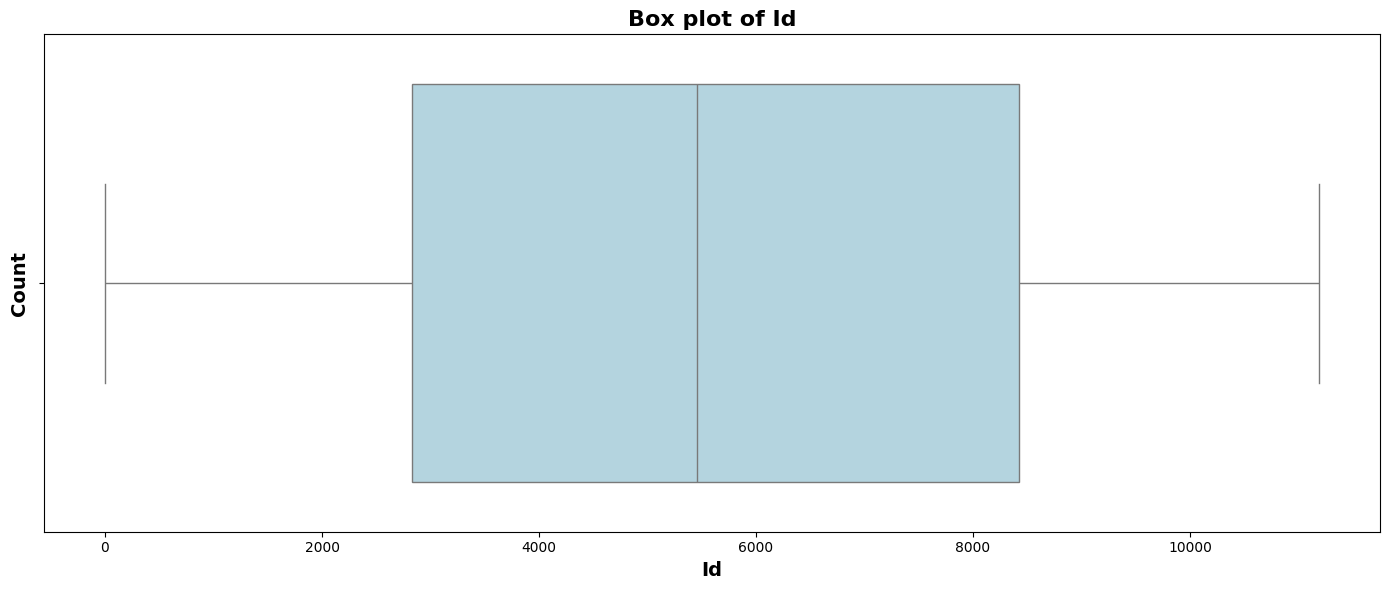

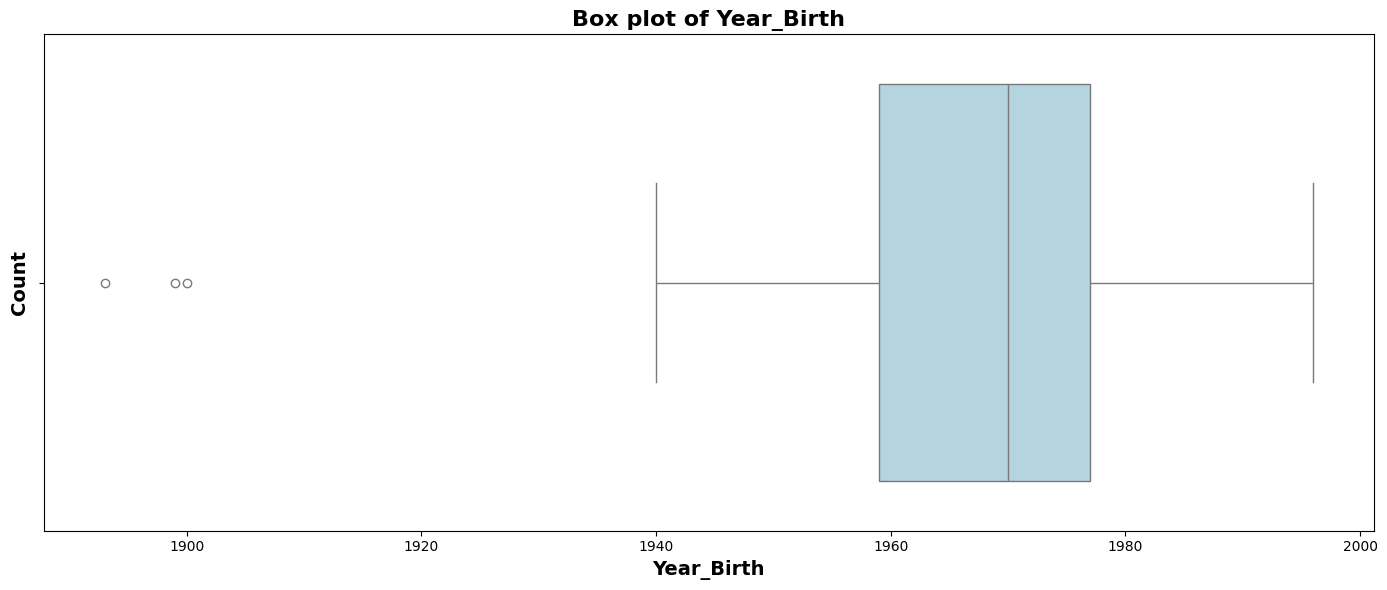

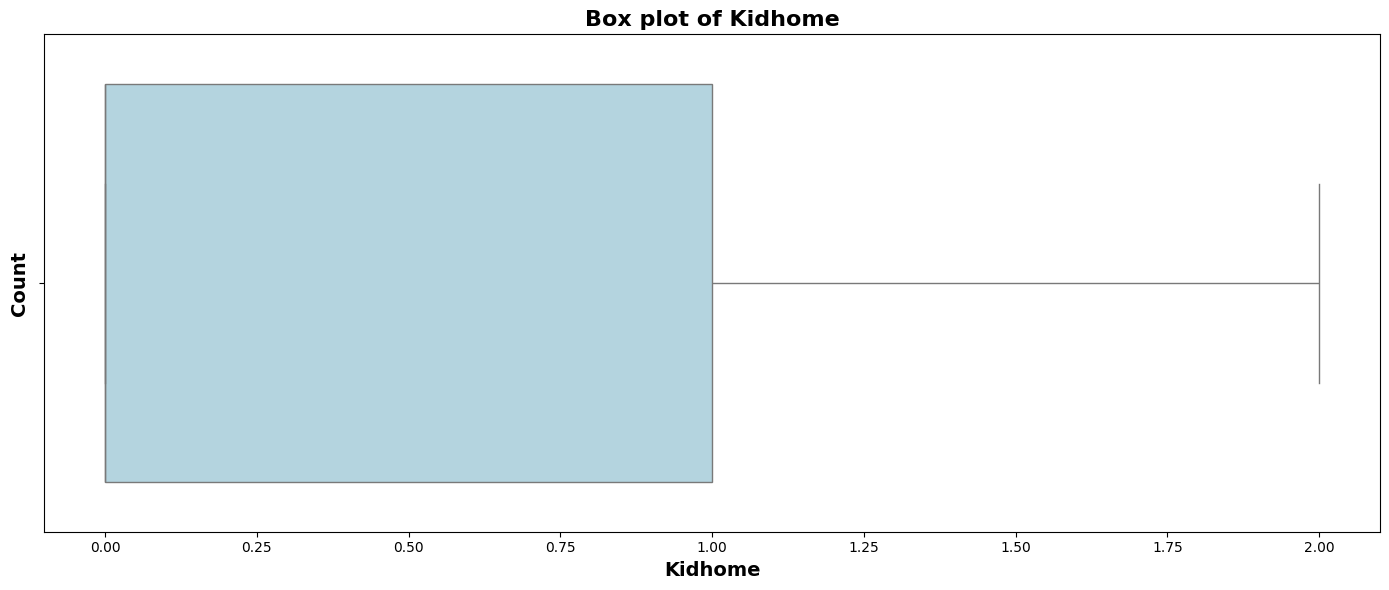

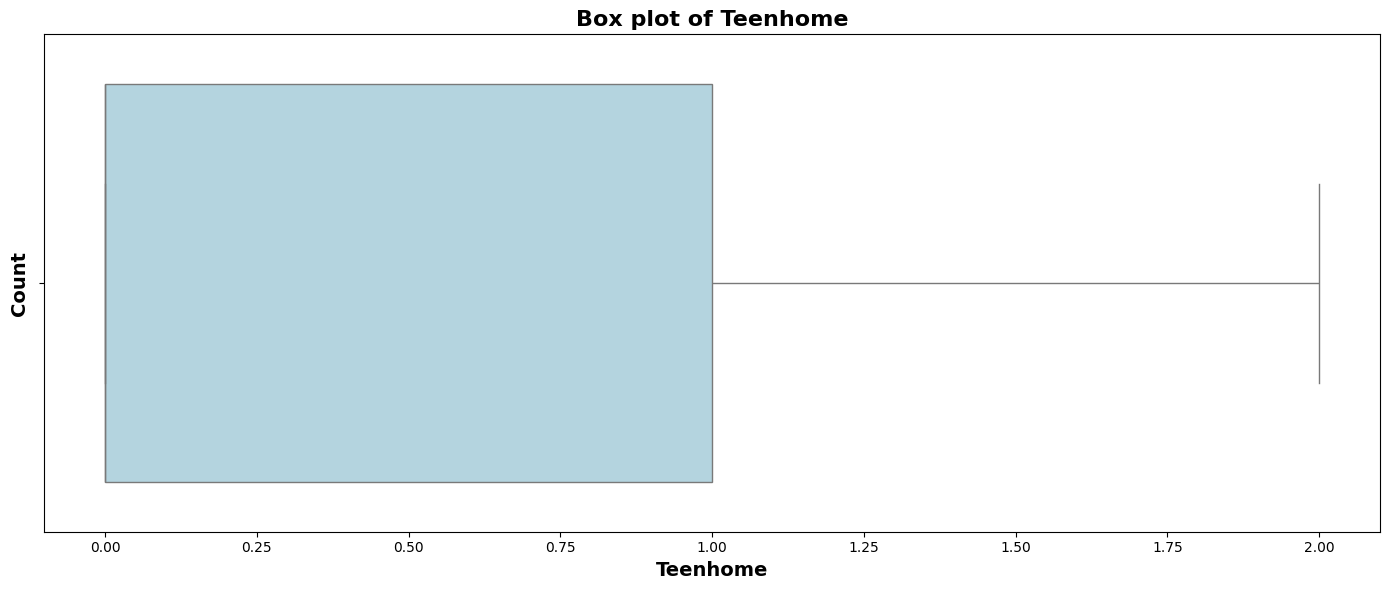

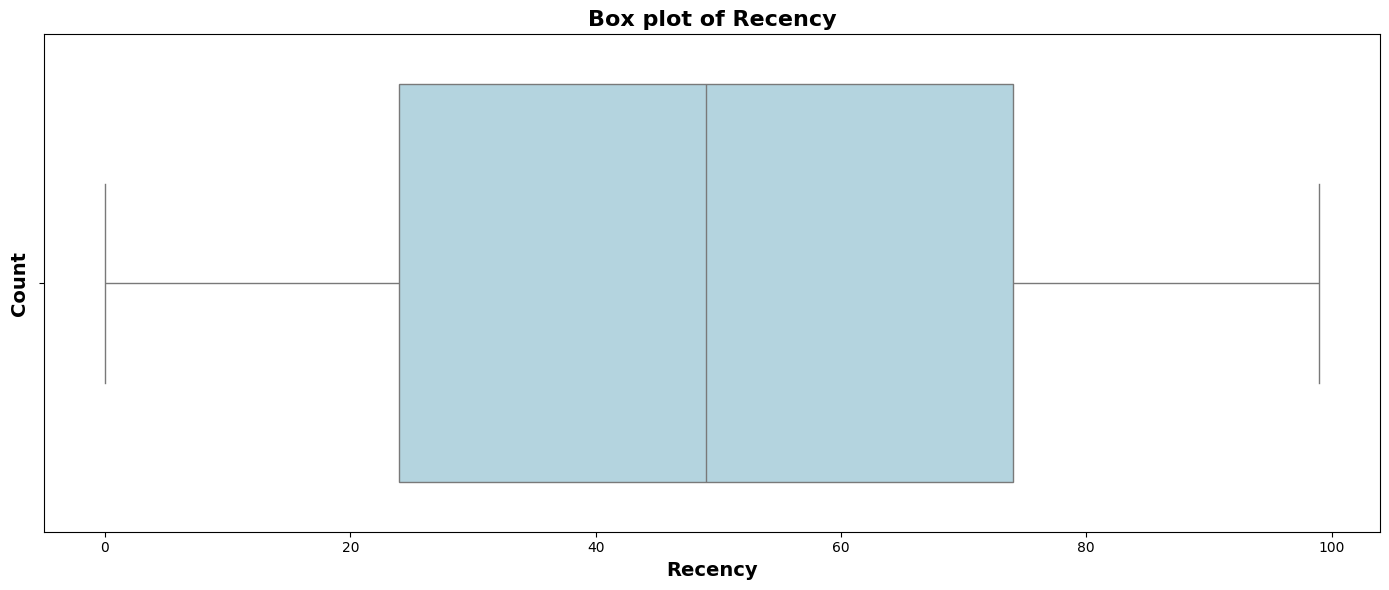

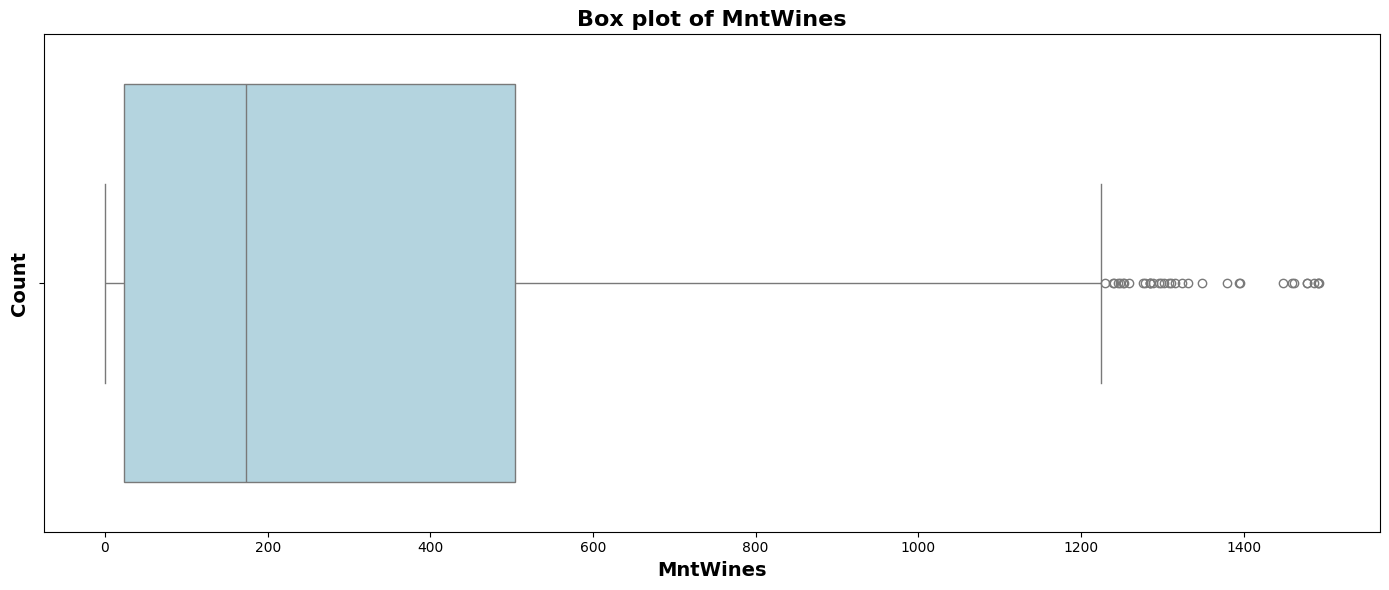

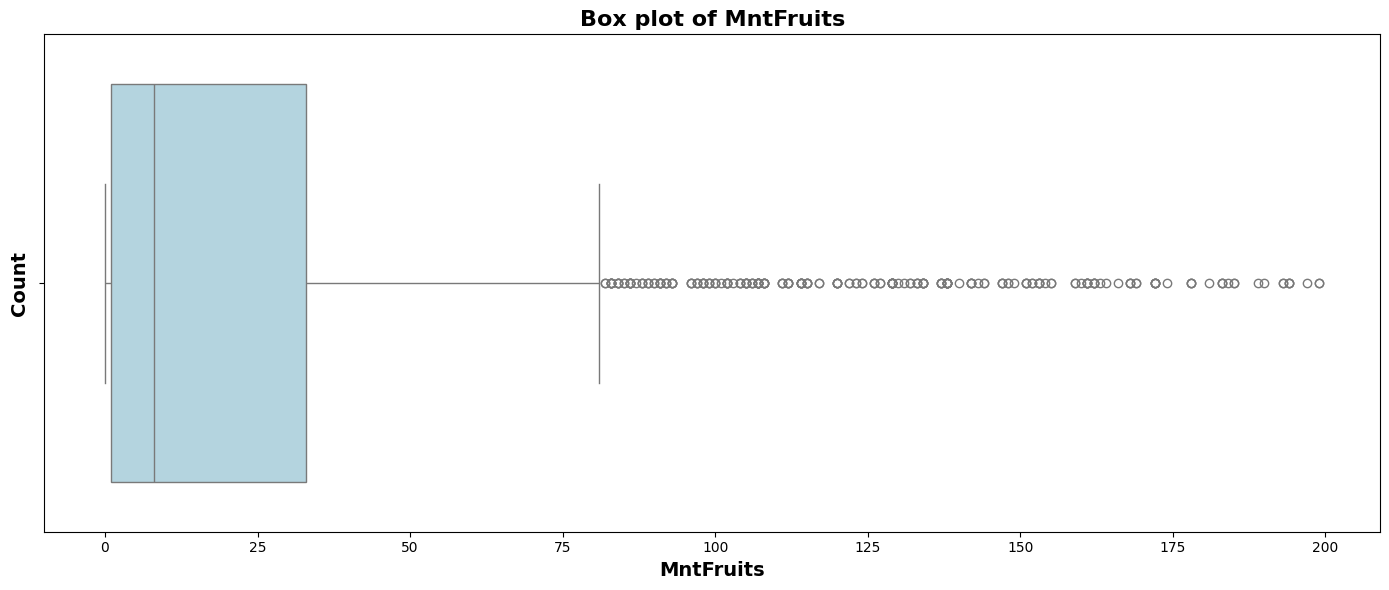

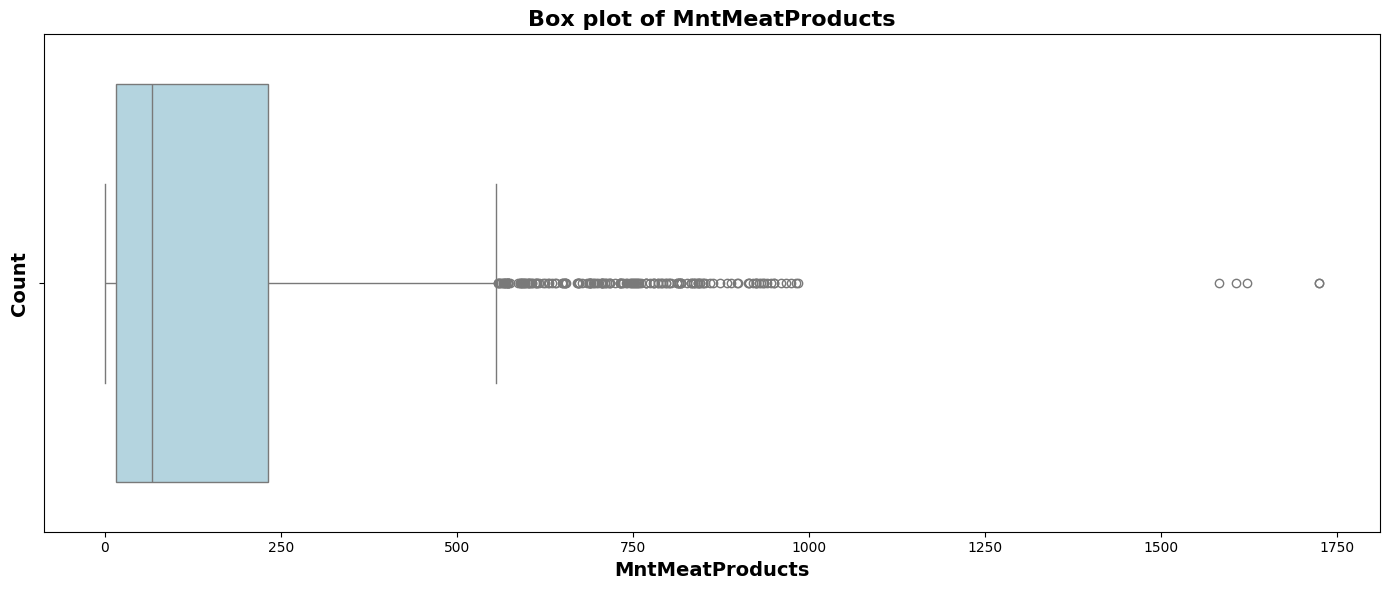

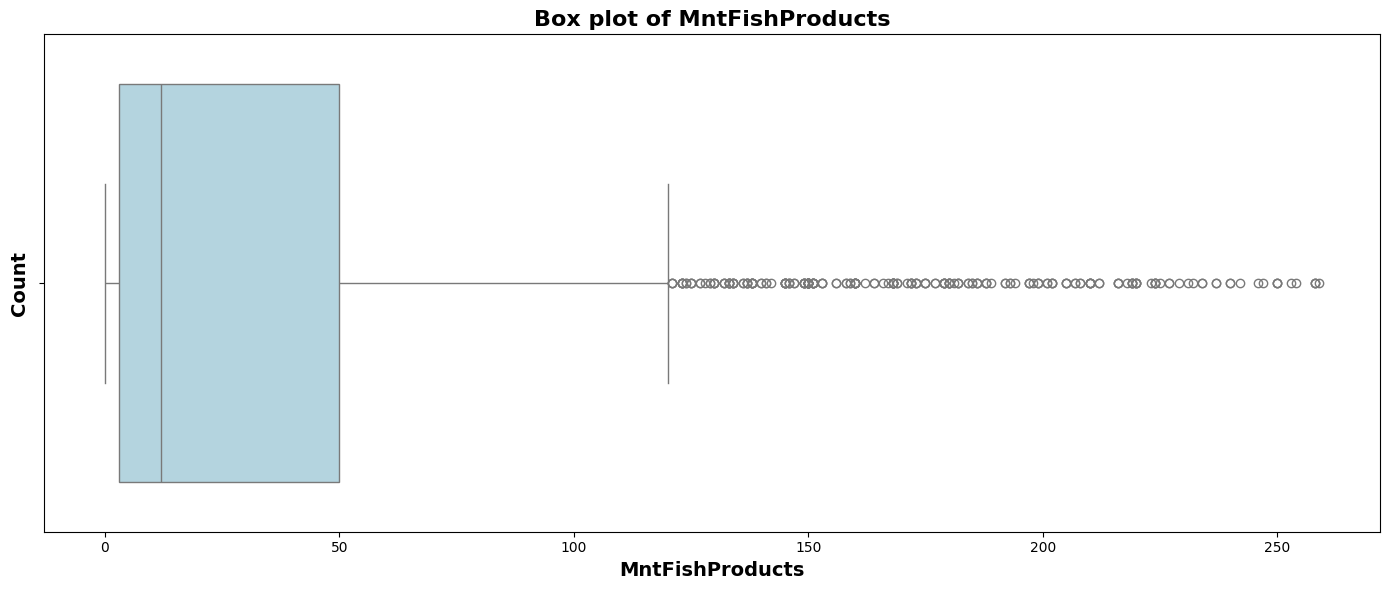

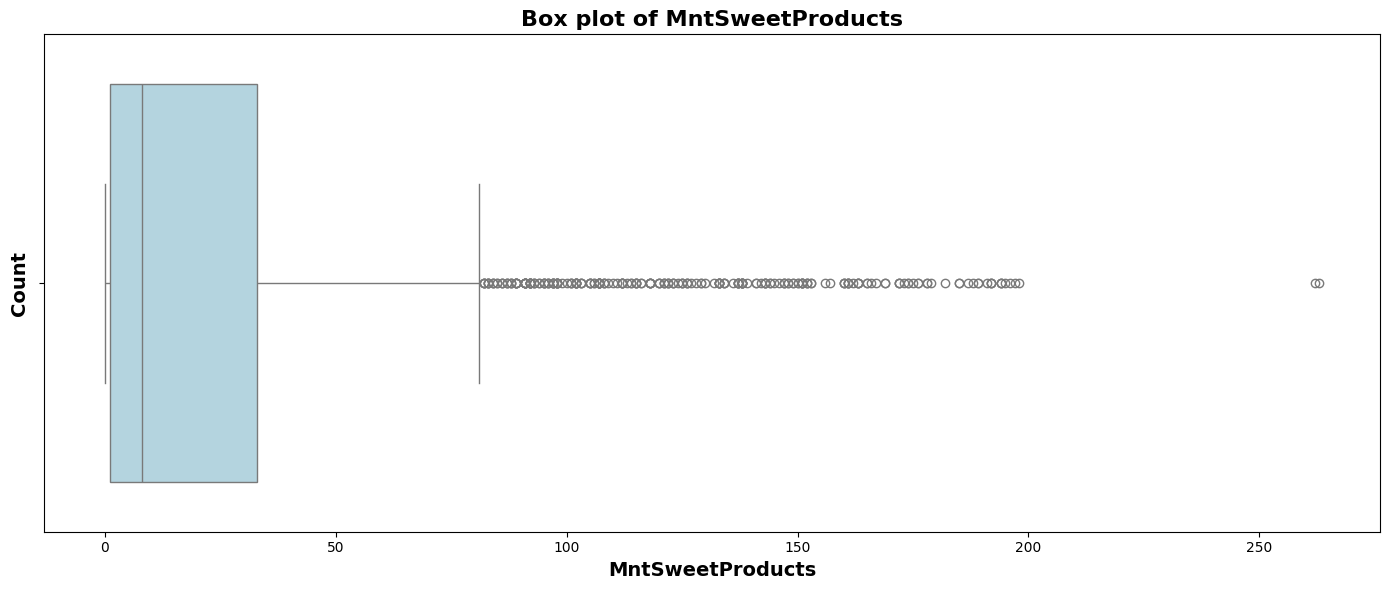

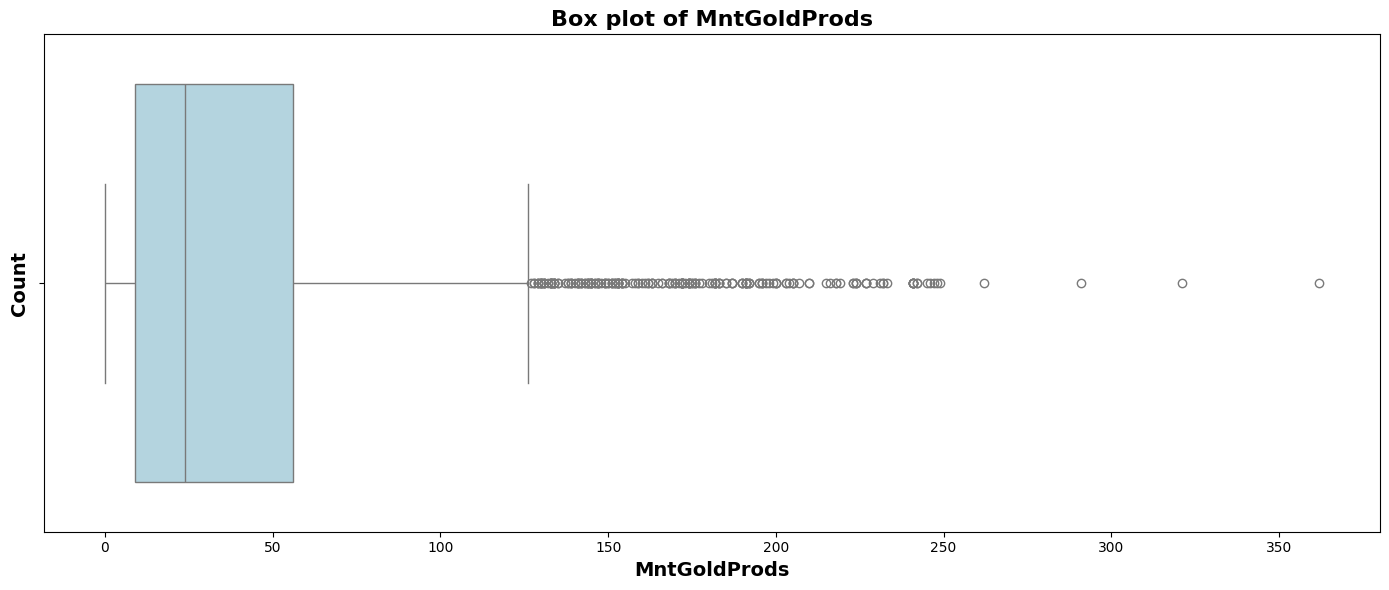

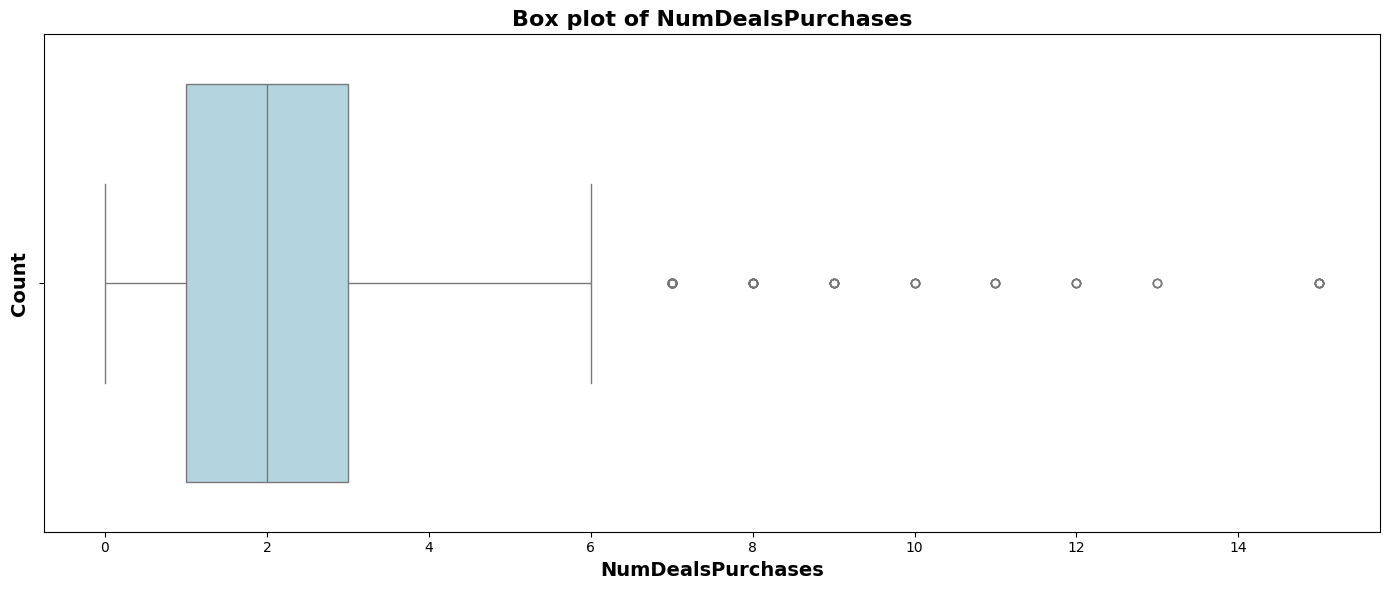

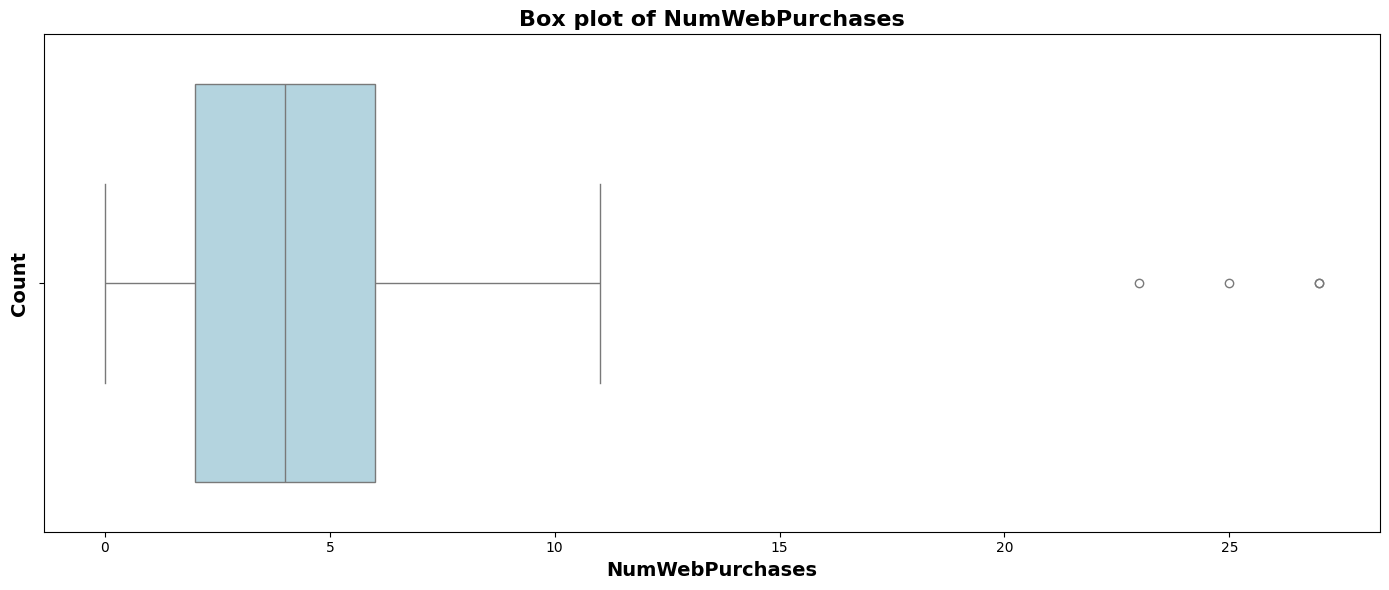

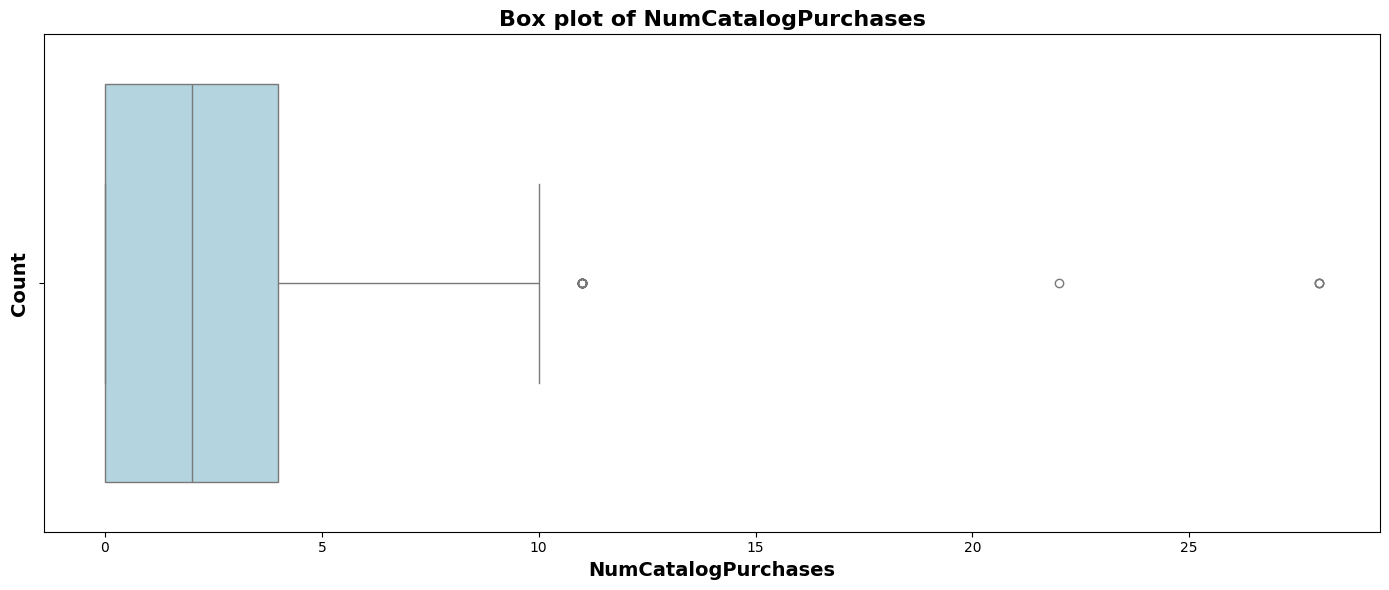

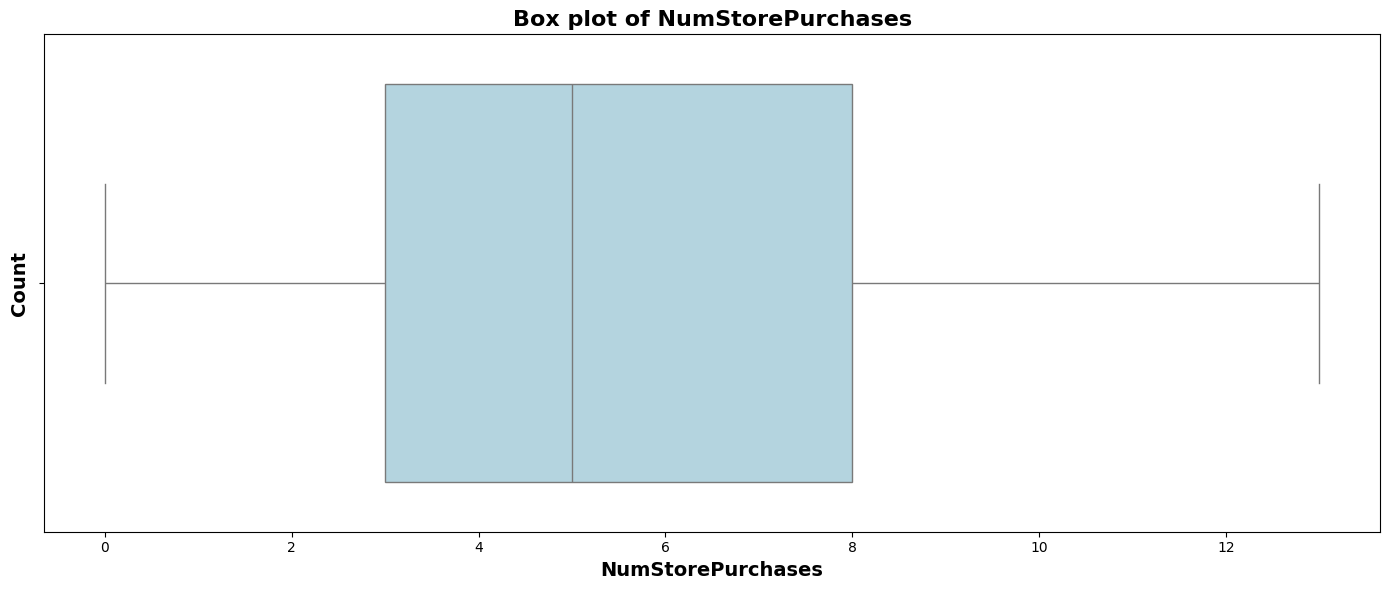

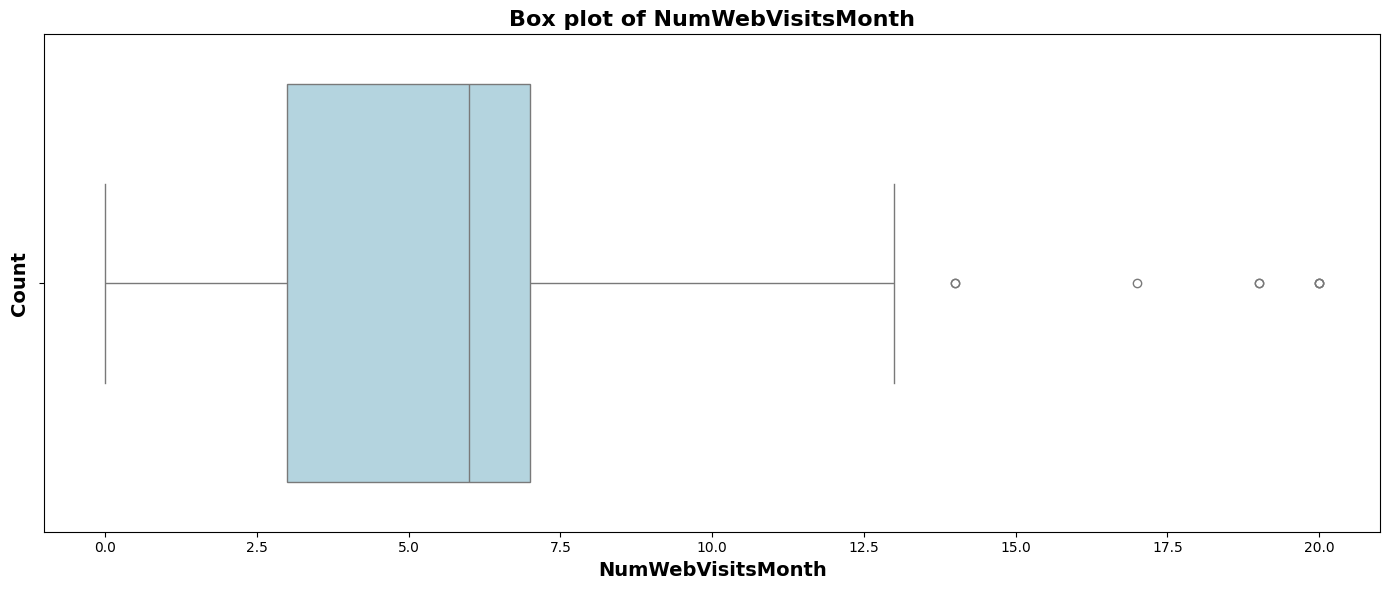

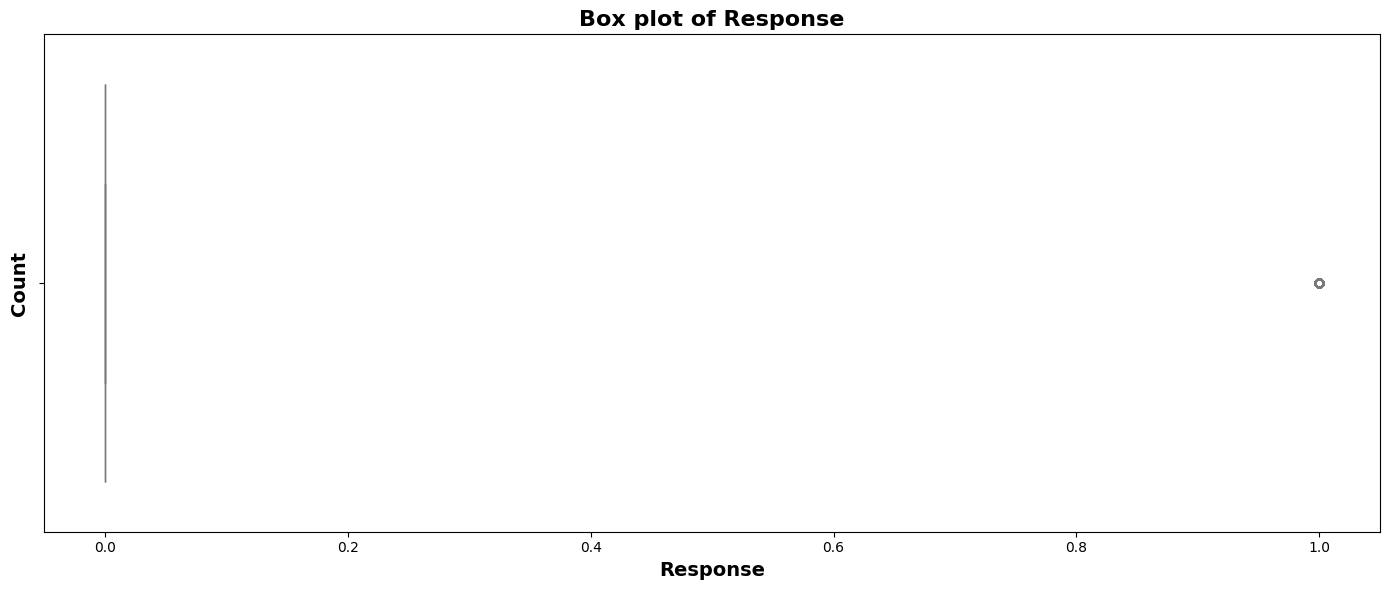

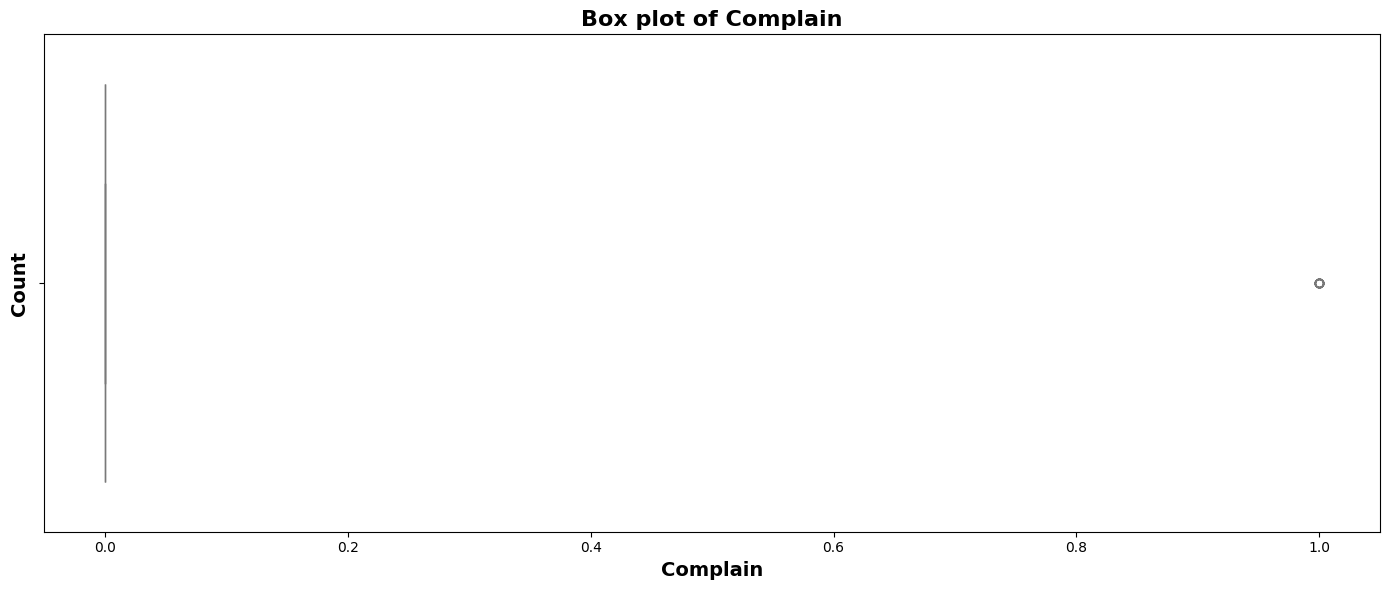

In [54]:
# Loop through each object (categorical) column
for column in df.select_dtypes(include='int64').columns:
    plt.figure(figsize=(14, 6))  # Adjust figure size
    sns.boxplot(data=df, x=column, color='lightblue')  # Using Seaborn's countplot
    plt.title(f'Box plot of {column}', fontsize=16, color='black', weight='bold')  # Title
    plt.xlabel(column, fontsize=14, color='black', weight='bold')  # X-axis label
    plt.ylabel('Count', fontsize=14, color='black', weight='bold')  # Y-axis label
    plt.grid(False)  # No grid lines
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot




In [ ]:
# we can easily sea here  that are many outliers in NumWebVisitsMonth','MntGoldProds','NumDealsPurchases','NumWebPurchases'
#,'NumCatalogPurchases','NumWebVisitsMonth' which we will be appling a iqr method to remove the outlier

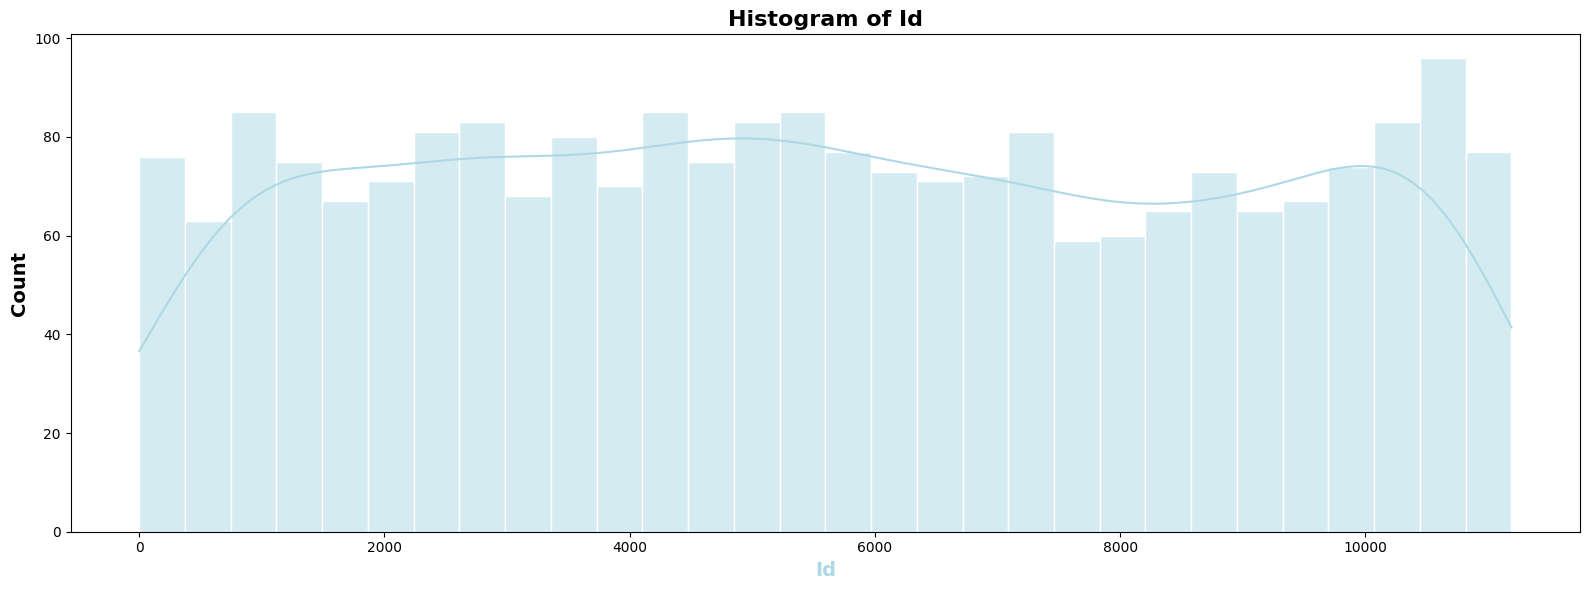

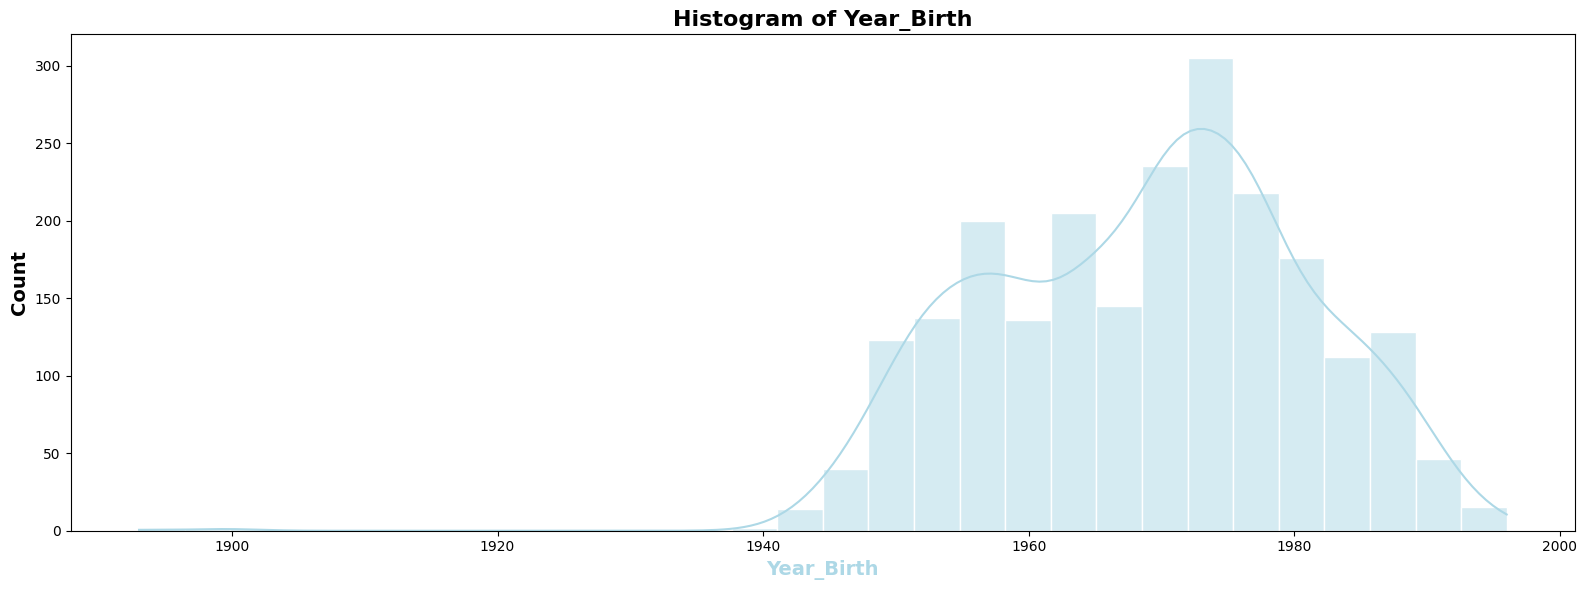

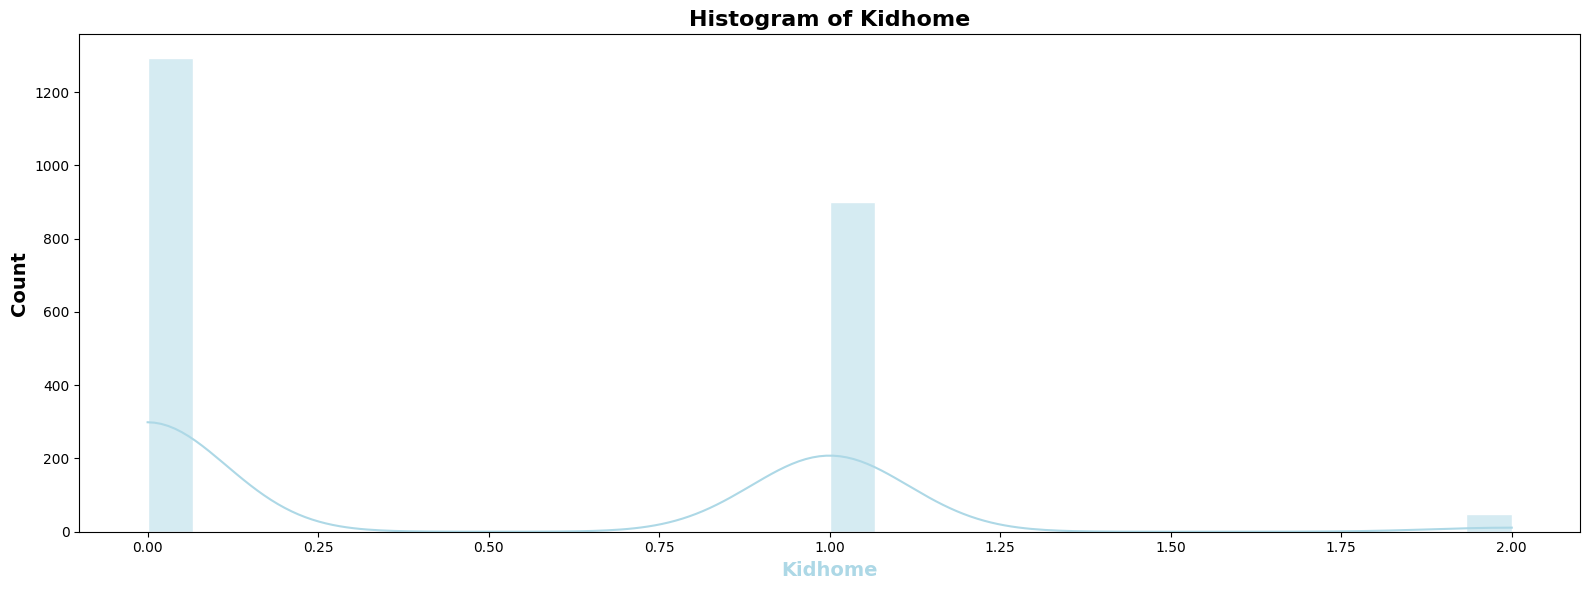

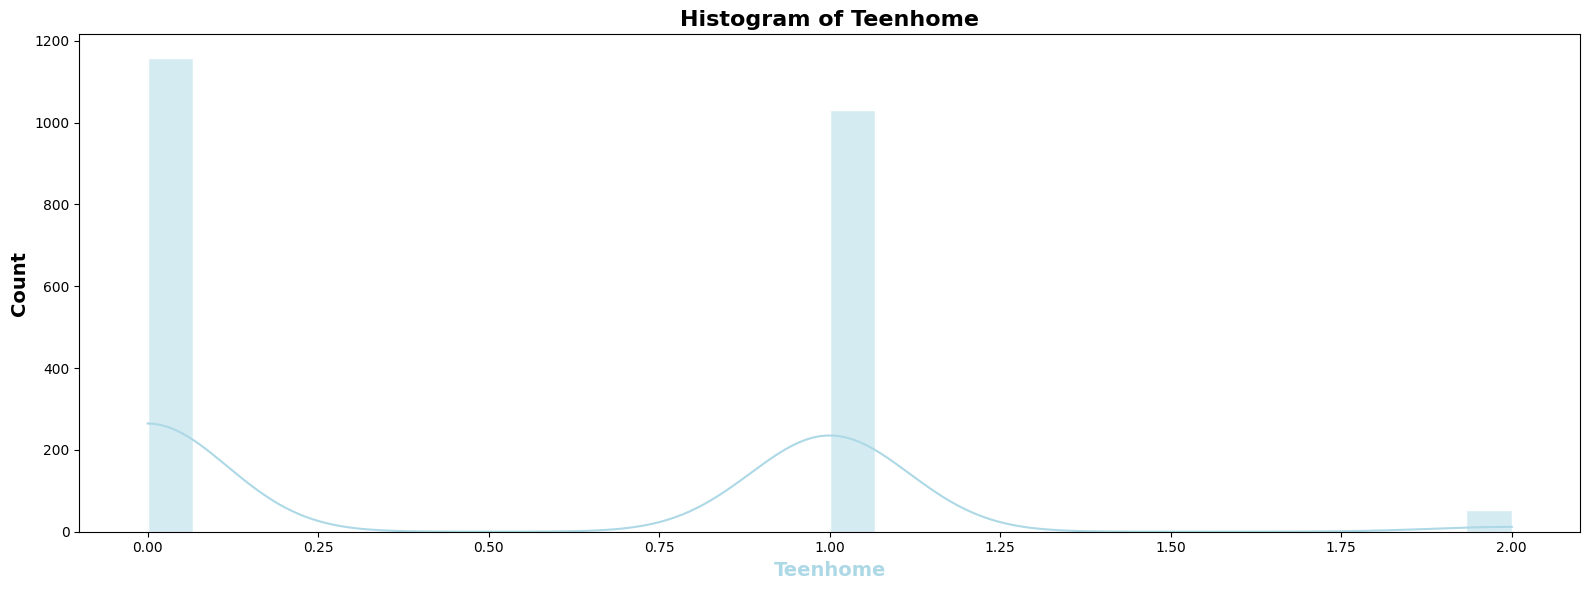

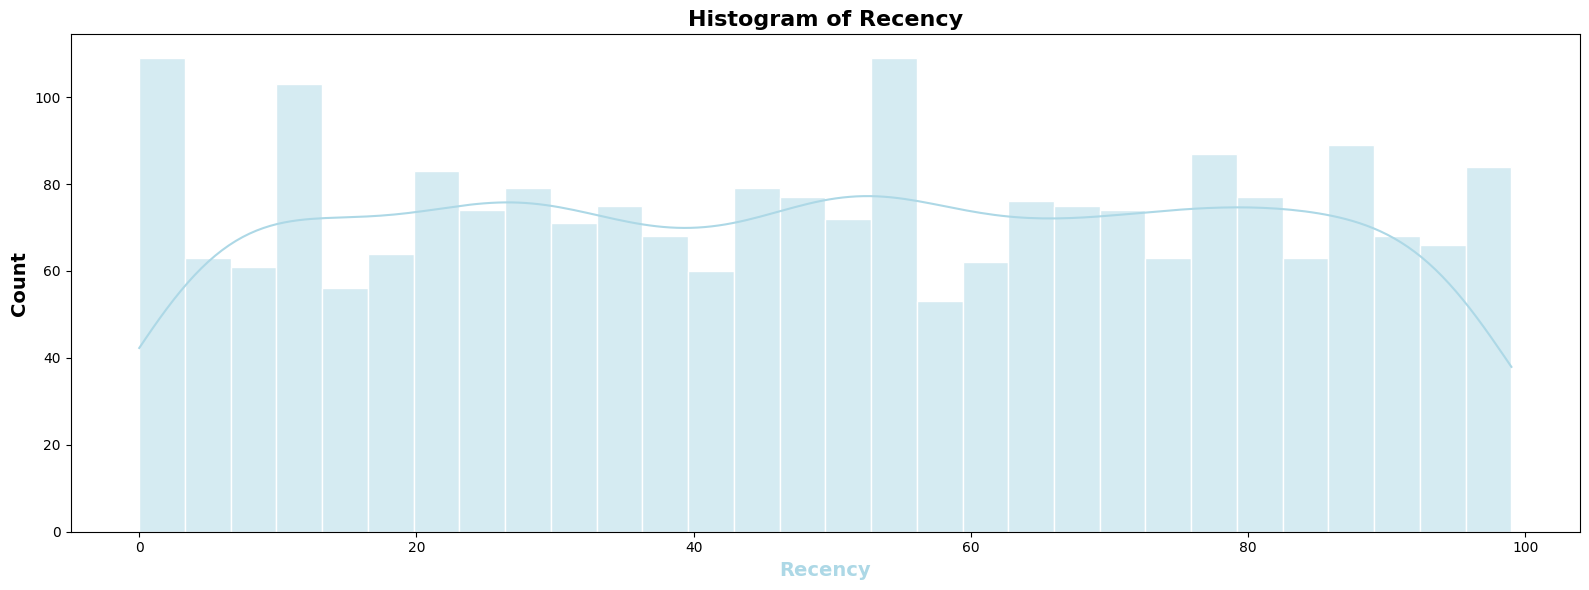

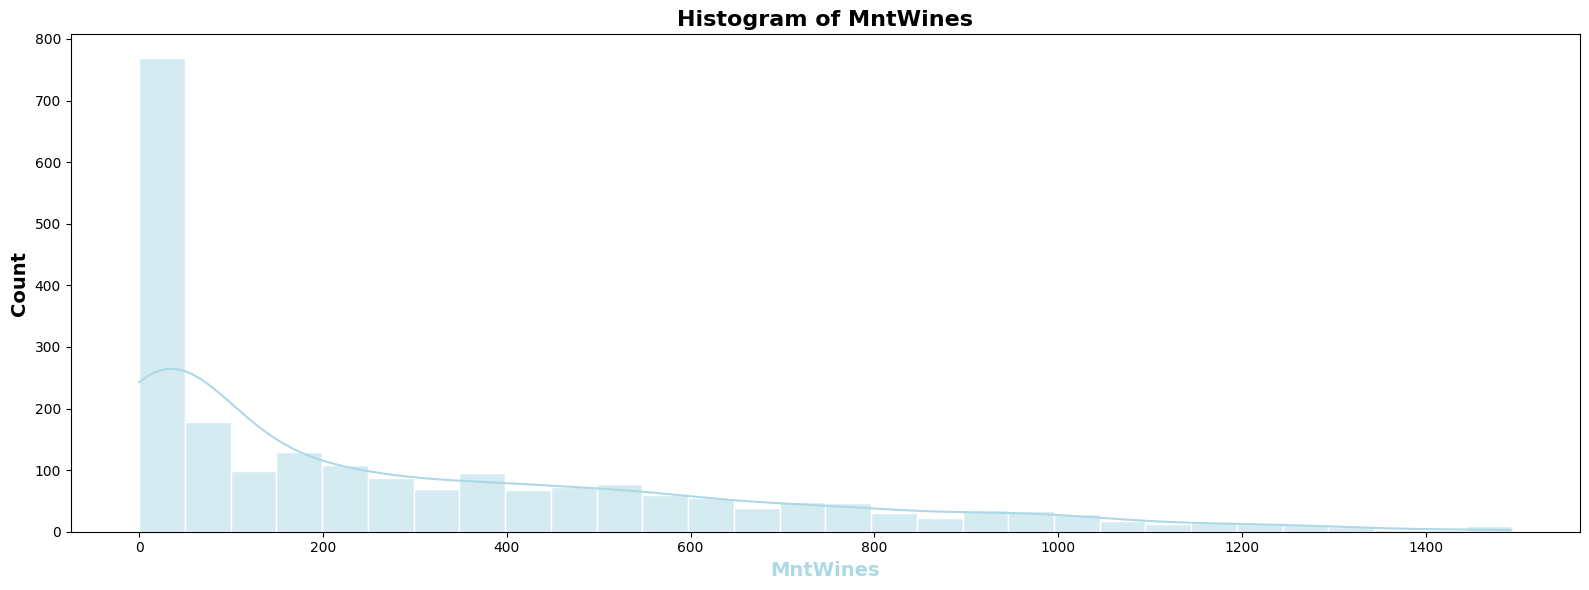

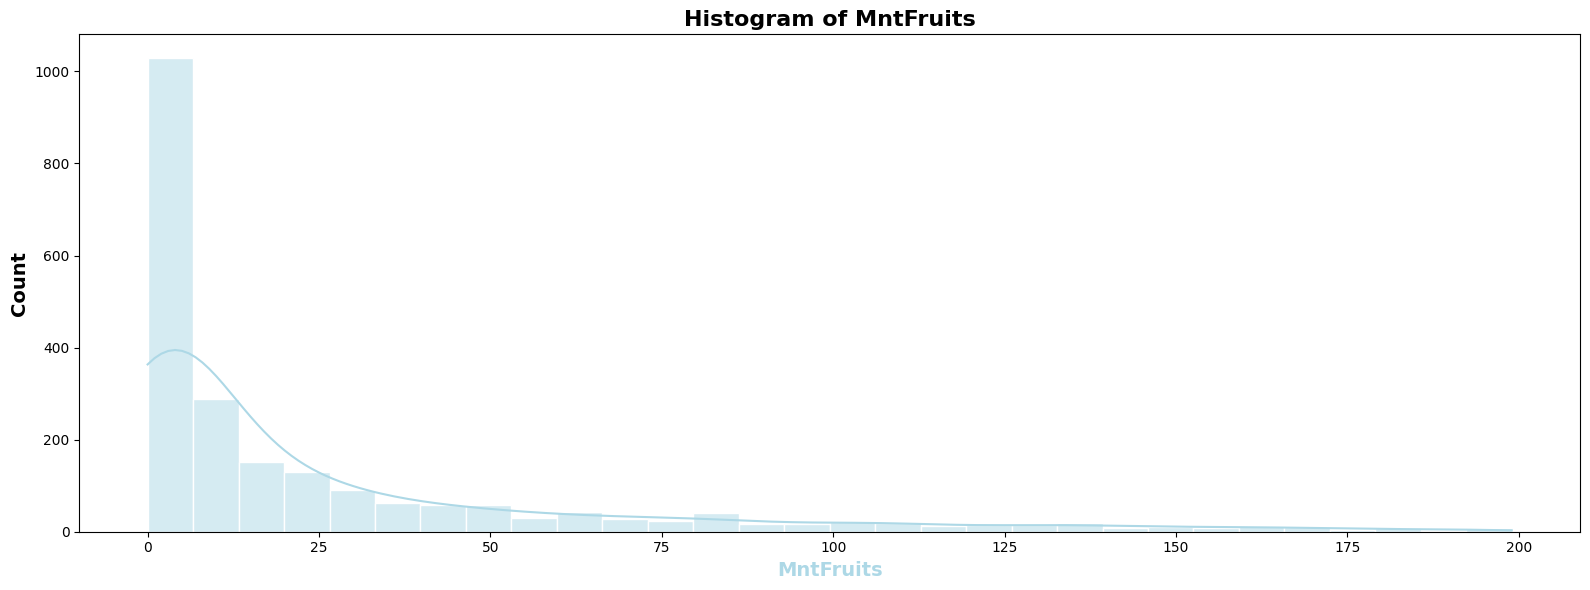

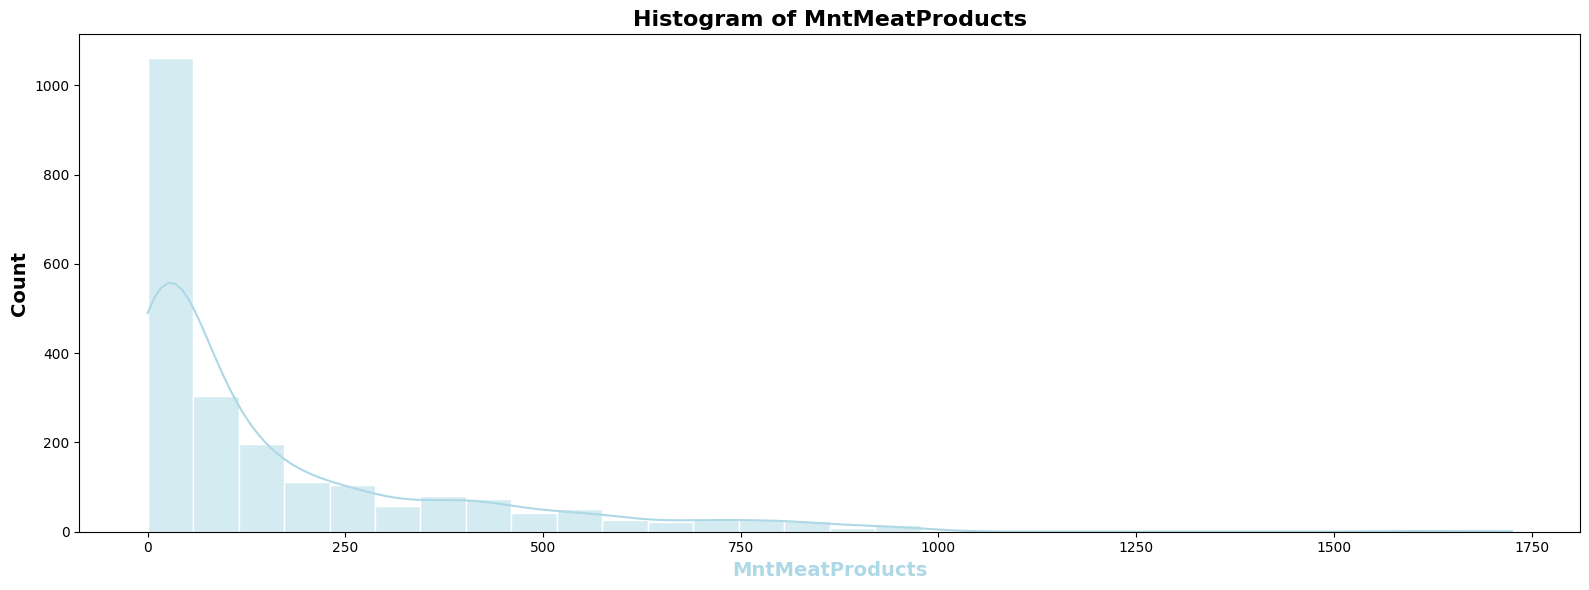

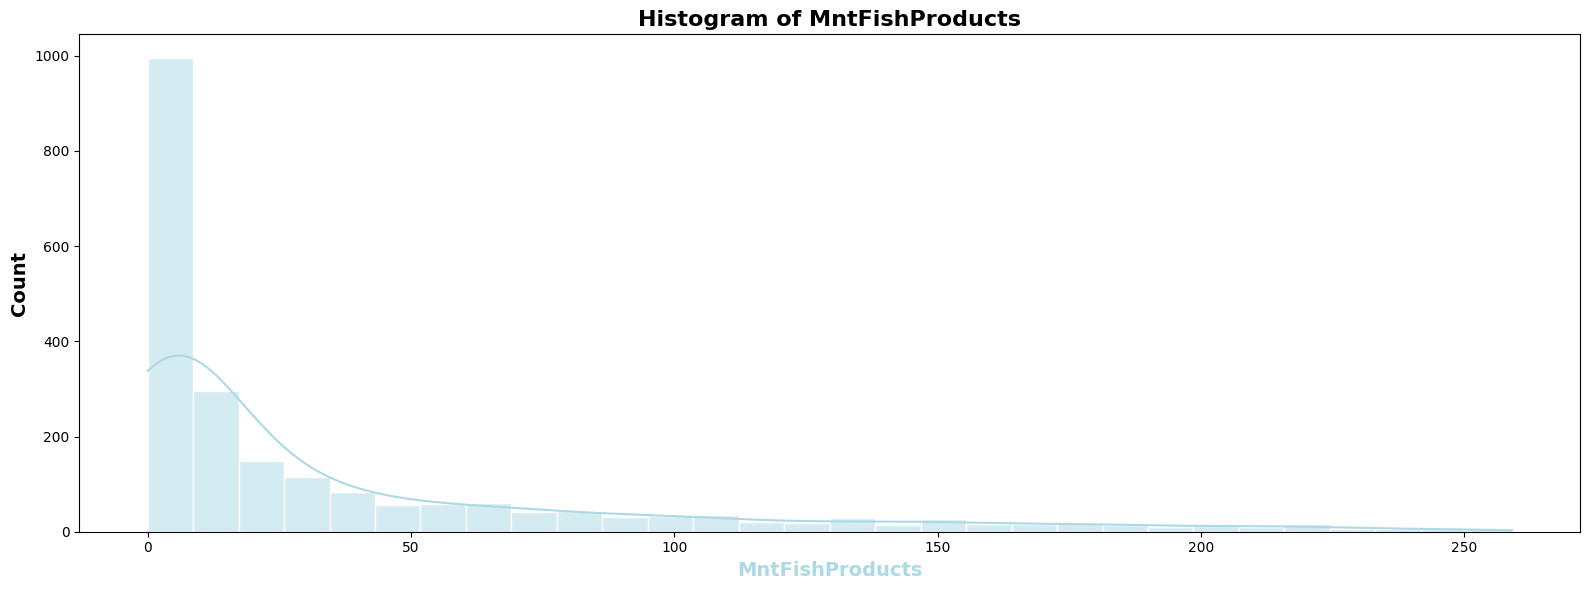

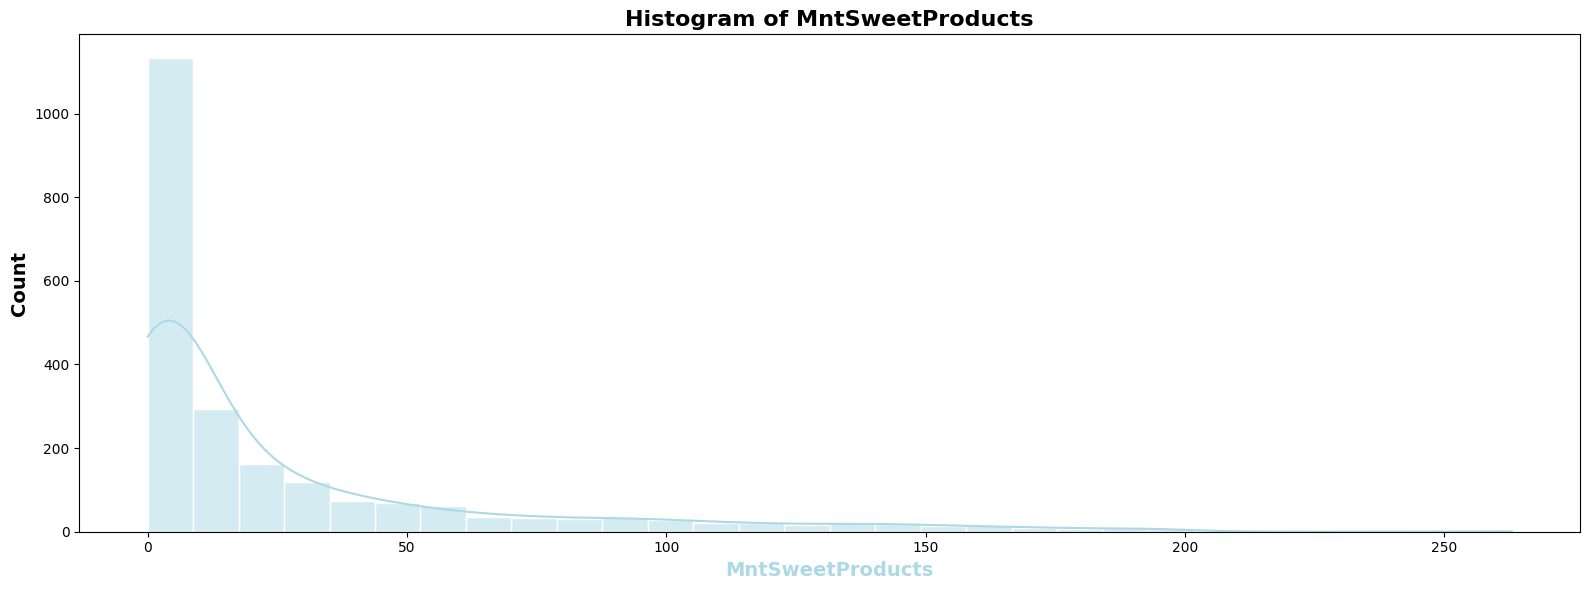

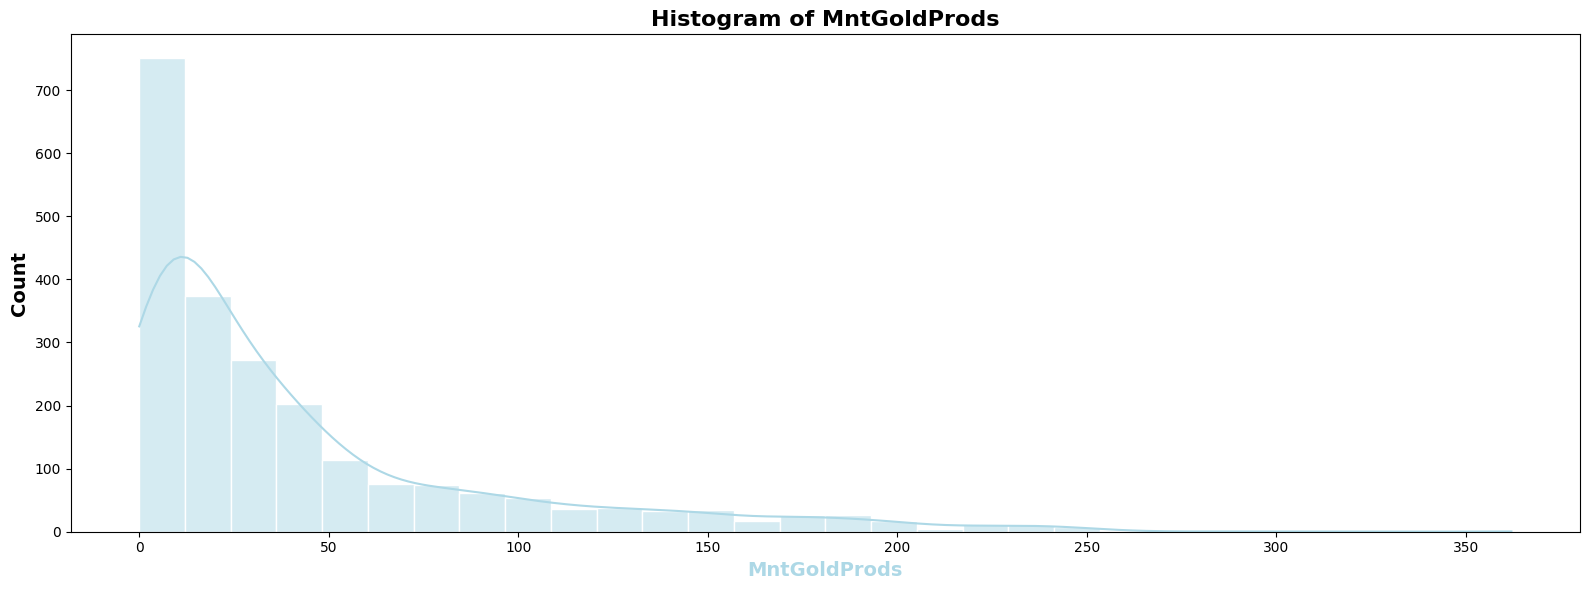

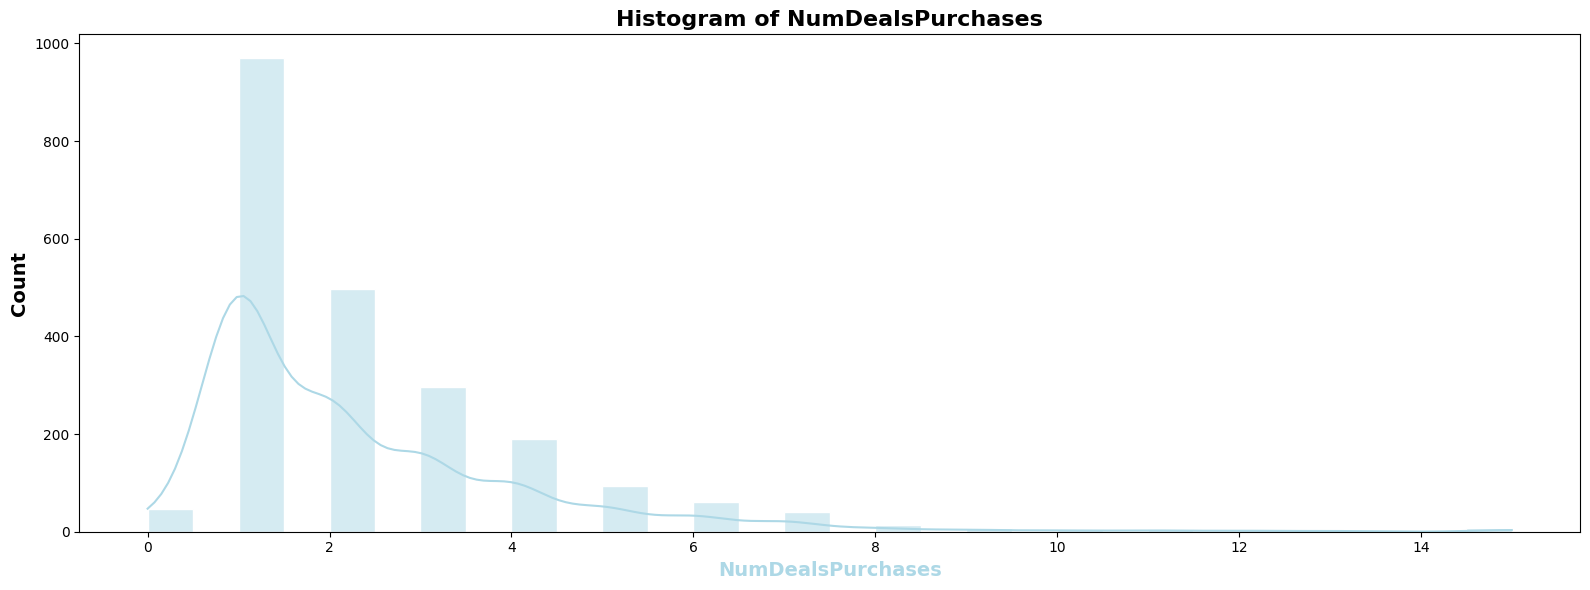

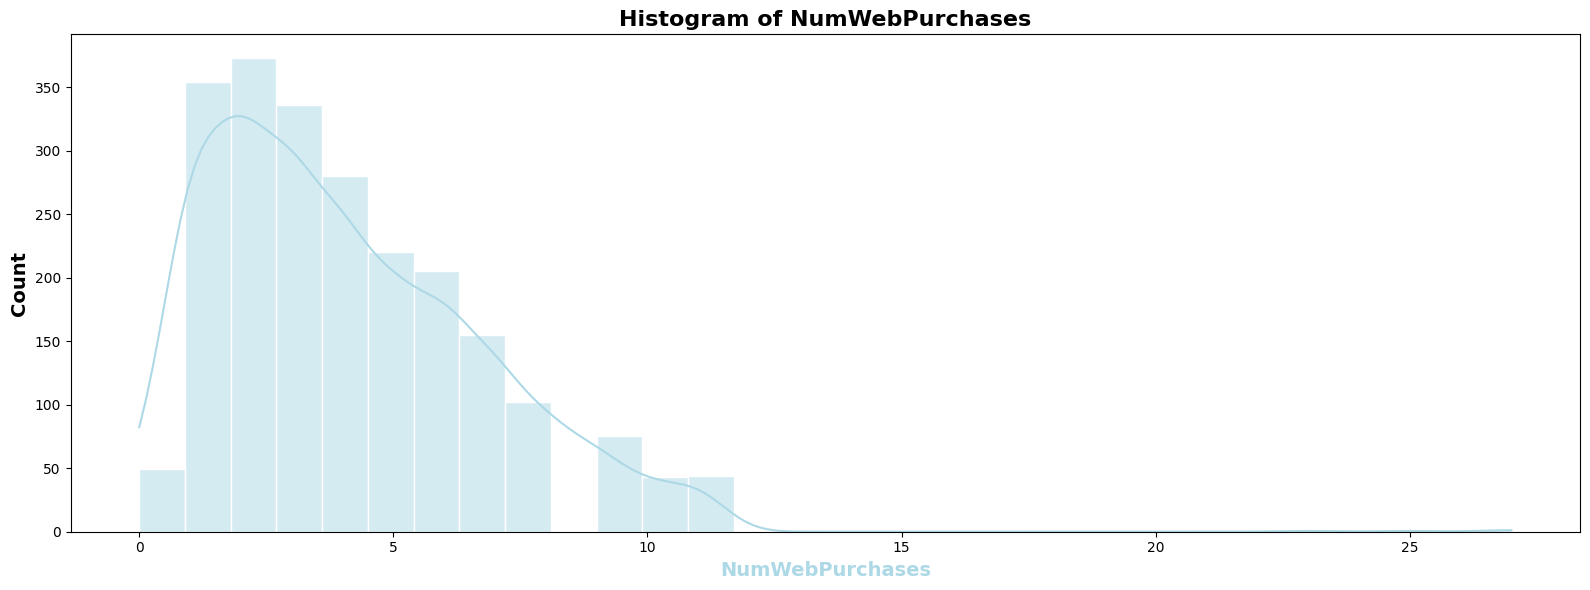

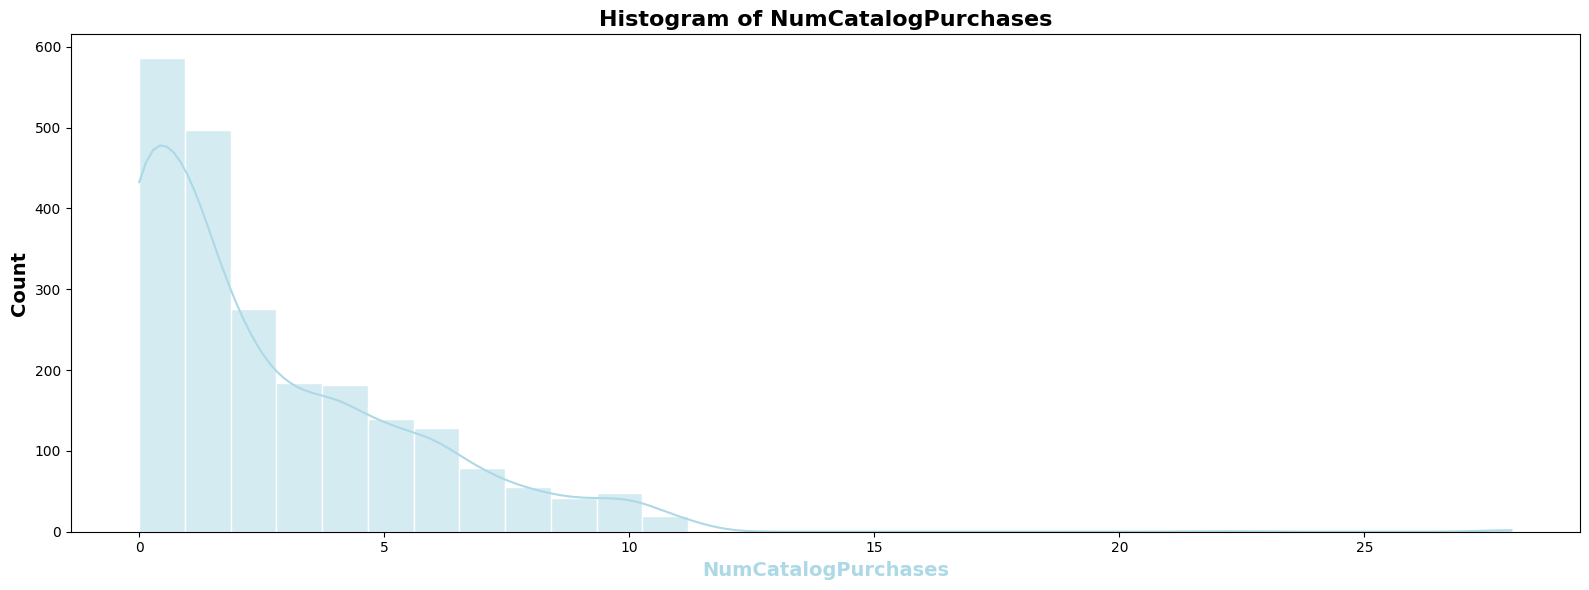

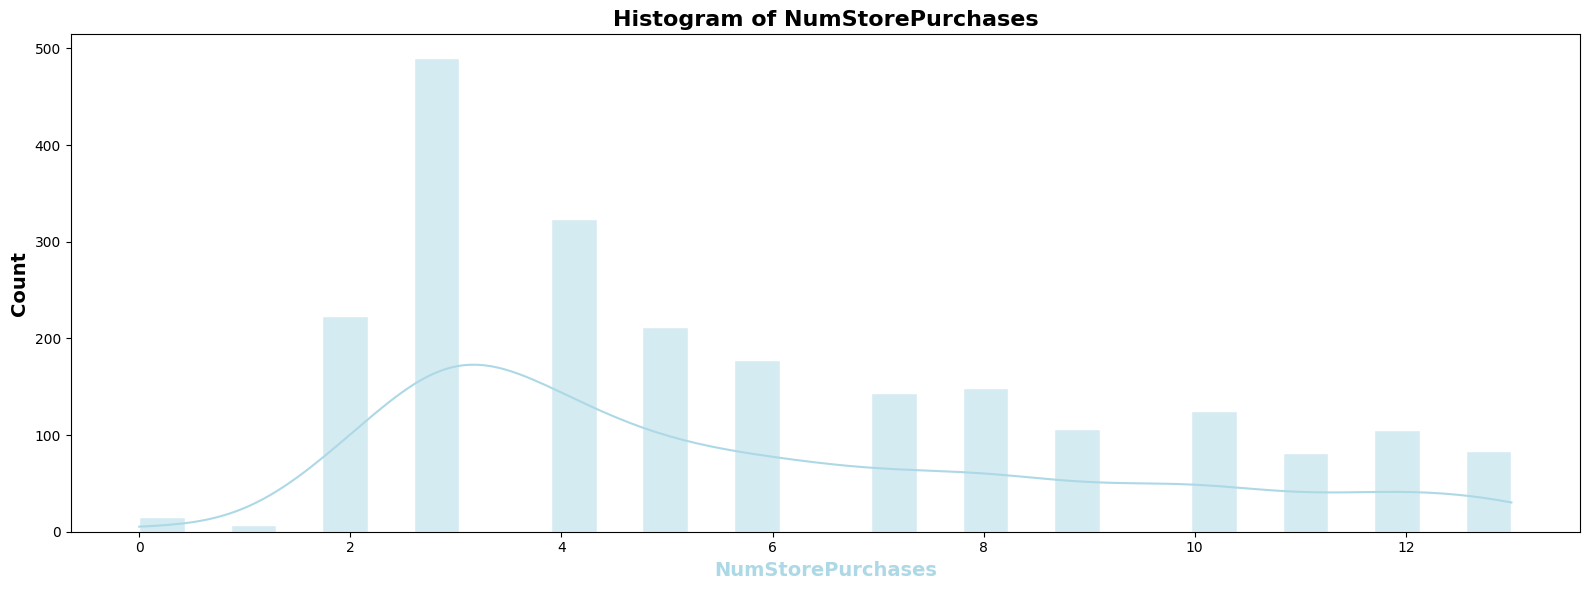

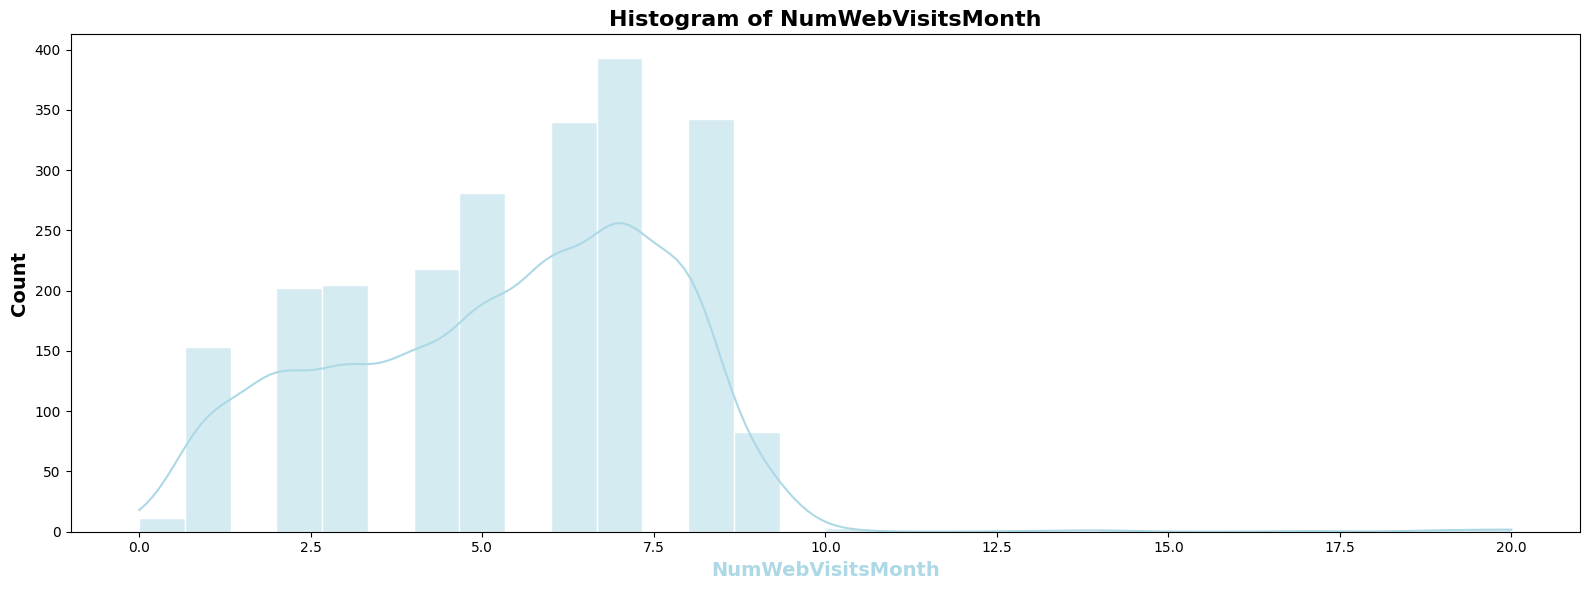

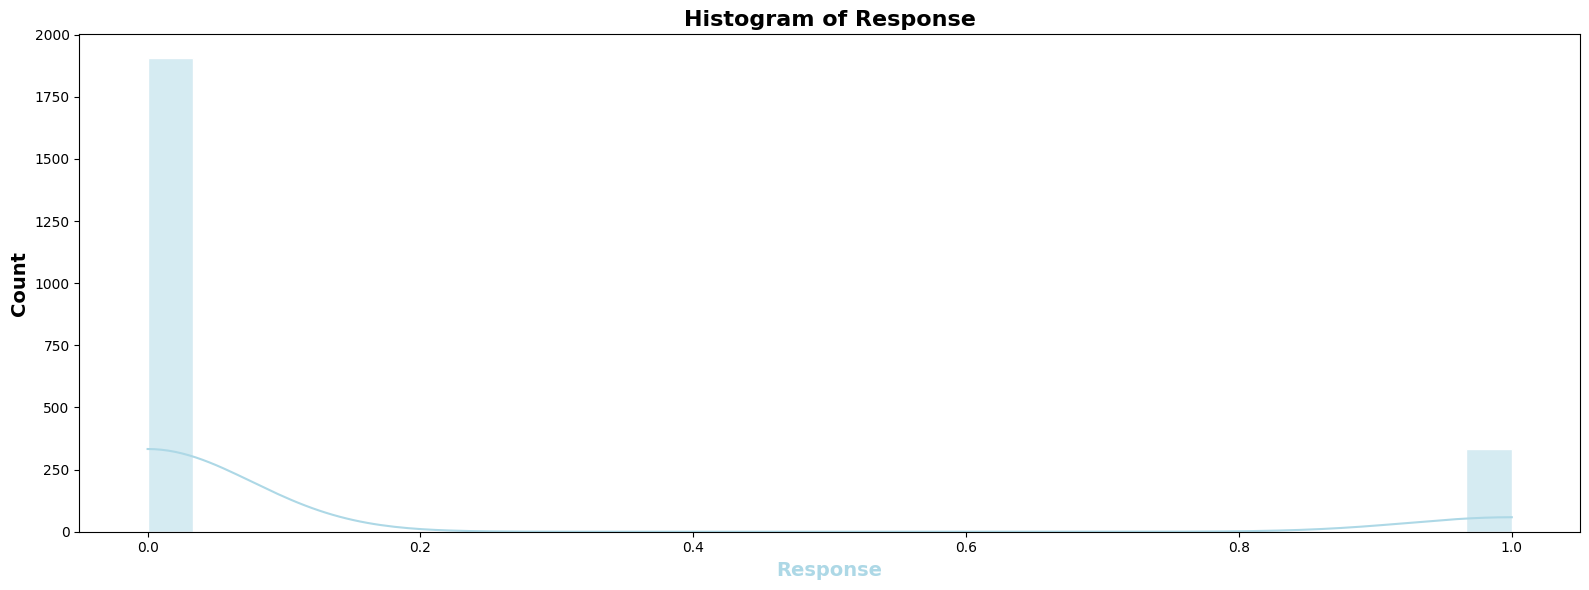

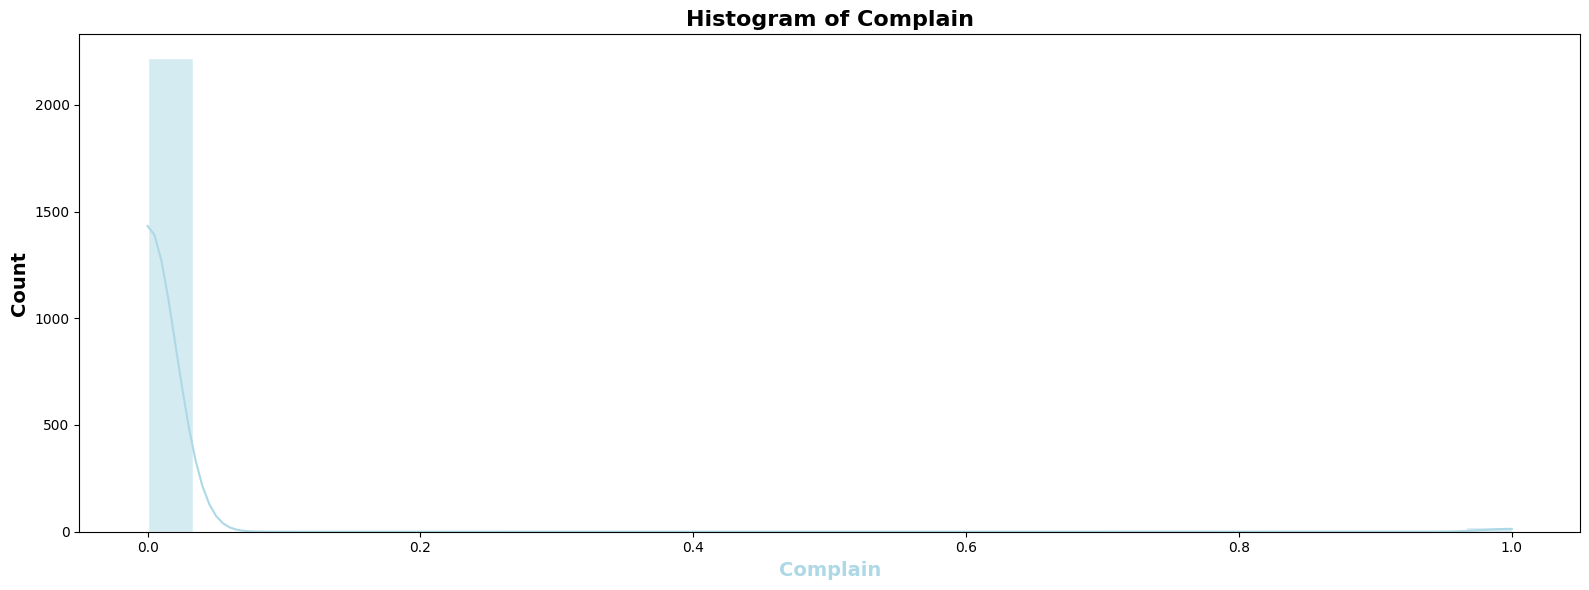

In [55]:
for i in df.select_dtypes(include='int64').columns:
    plt.figure(figsize=(16, 6))  # figure size
    sns.histplot(data=df, x=i, bins=30,kde=True, color='lightblue', edgecolor='white')
    plt.title(f'Histogram of {i}', fontsize=16, color='black', weight='bold')
    plt.xlabel(i, fontsize=14, color='lightblue', weight='bold')
    plt.ylabel('Count', fontsize=14, color='black', weight='bold')
    plt.grid(False)
    plt.tight_layout()  # for adjusting the layout

    plt.show()

    # by running a loop and selecting the relevent column we want to see the distribution of the numeric column and probable type of sitribution it could follow



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [29]:
df.describe()
#statistical analysis

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

In [30]:
df.shape

(2240, 22)

In [31]:
df.sample(5)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
318   7600        1992       Basic         Single  15253.0        1         0   
367   4713        1979         PhD        Married  31605.0        1         0   
2042  1833        1974         PhD         Single  39190.0        1         0   
892   8523        1968  Graduation        Married  19329.0        1         0   
866   9185        1966         PhD         Single  69759.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
318   10/28/2013       13         1          3                3   
367   11/22/2012       15        74          0               42   
2042   4/26/2014       91        68          8               18   
892   12/14/2013       39        24          1               16   
866   10/28/2013       38       452         20              514   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
318                 8                 1            13                  2   
367                 2                 1             6                  2   
2042               19                 8            12                  2   
892                12                 2             5                  3   
866                13                30             0                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
318                 1                    0                  3   
367                 2                    1                  4   
2042                2                    1                  4   
892                 4                    0                  3   
866                 4                    6                  5   

      NumWebVisitsMonth  Response  Complain  
318                   7         0         0  
367                   7         0         0  
2042                  5         0         0  
892                   8         0         0  
866                   3         1         0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [56]:
df['Dt_Customer']=df['Dt_Customer'].replace("########",np.nan)
df['Dt_Customer']=df['Dt_Customer'].astype("datetime64[ns]",errors="ignore")
#replacing and casting the dt_customer column

In [57]:
#outlier treatment usinng iqr method
dataframe = df.copy()

for column in ['NumWebVisitsMonth','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']:

      Q1=dataframe[column].quantile(0.25)
      Q3=dataframe[column].quantile(0.75)
      IQR=Q3-Q1
      lower_bound=Q1-1.5*IQR
      upper_bound=Q3+1.5*IQR
      dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]


print(dataframe)

         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
5      7348        1958         PhD         Single  71691.0        0   
...     ...         ...         ...            ...      ...      ...   
2234   9977        1973  Graduation       Divorced  78901.0        0   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1            0  2014-06-15        0       464          5  

In [58]:
dataframe

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
5      7348        1958         PhD         Single  71691.0        0   
...     ...         ...         ...            ...      ...      ...   
2234   9977        1973  Graduation       Divorced  78901.0        0   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1            0  2014-06-15        0       464          5               64   
2            1  2014-05-13        0       134         11               59   
3            1         NaT        0        10          0                1   
4            0         NaT        0         6         16               24   
5            0  2014-03-17        0       336        130              411   
...        ...         ...      ...       ...        ...              ...   
2234         1  2013-09-17       99       321         11              309   
2235         1         NaT       99       372         18              126   
2236         0  2013-01-22       99         5         10               13   
2237         0         NaT       99       185          2               88   
2238         0  2012-11-29       99       267         38              701   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                   7                 0            37                  1   
2                  15                 2            30                  1   
3                   0                 0             0                  1   
4                  11                 0            34                  2   
5                 240                32            43                  1   
...               ...               ...           ...                ...   
2234               33                26            34                  3   
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
5                   4                    7                  5   
...               ...                  ...                ...   
2234                9                    3                  5   
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   

      NumWebVisitsMonth  Response  Complain  
1                     5         1         0  
2                     2         0         0  
3                     7         0         0  
4                     7         1         0  
5                     2         1         0  
...                 ...       ...       ...  
2234                  4         0         0  
2235                  4         0         0  
2236                  8         0         0  
2237                  8         0         0  
2238               

In [59]:
dataframe['Dt_Customer'] = pd.to_datetime(dataframe['Dt_Customer'], errors='coerce')


In [67]:
dataframe

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
5      7348        1958         PhD         Single  71691.0        0   
...     ...         ...         ...            ...      ...      ...   
2234   9977        1973  Graduation       Divorced  78901.0        0   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1            0  2014-06-15        0       464          5               64   
2            1  2014-05-13        0       134         11               59   
3            1         NaT        0        10          0                1   
4            0         NaT        0         6         16               24   
5            0  2014-03-17        0       336        130              411   
...        ...         ...      ...       ...        ...              ...   
2234         1  2013-09-17       99       321         11              309   
2235         1         NaT       99       372         18              126   
2236         0  2013-01-22       99         5         10               13   
2237         0         NaT       99       185          2               88   
2238         0  2012-11-29       99       267         38              701   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                   7                 0            37                  1   
2                  15                 2            30                  1   
3                   0                 0             0                  1   
4                  11                 0            34                  2   
5                 240                32            43                  1   
...               ...               ...           ...                ...   
2234               33                26            34                  3   
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
5                   4                    7                  5   
...               ...                  ...                ...   
2234                9                    3                  5   
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   

      NumWebVisitsMonth  Response  Complain  
1                     5         1         0  
2                     2         0         0  
3                     7         0         0  
4                     7         1         0  
5                     2         1         0  
...                 ...       ...       ...  
2234                  4         0         0  
2235                  4         0         0  
2236                  8         0         0  
2237                  8         0         0  
2238               

In [60]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 1 to 2238
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1877 non-null   int64         
 1   Year_Birth           1877 non-null   int64         
 2   Education            1877 non-null   object        
 3   Marital_Status       1877 non-null   object        
 4   Income               1857 non-null   float64       
 5   Kidhome              1877 non-null   int64         
 6   Teenhome             1877 non-null   int64         
 7   Dt_Customer          1104 non-null   datetime64[ns]
 8   Recency              1877 non-null   int64         
 9   MntWines             1877 non-null   int64         
 10  MntFruits            1877 non-null   int64         
 11  MntMeatProducts      1877 non-null   int64         
 12  MntFishProducts      1877 non-null   int64         
 13  MntSweetProducts     1877 non-null   i

In [23]:
dataframe.shape

(1877, 22)

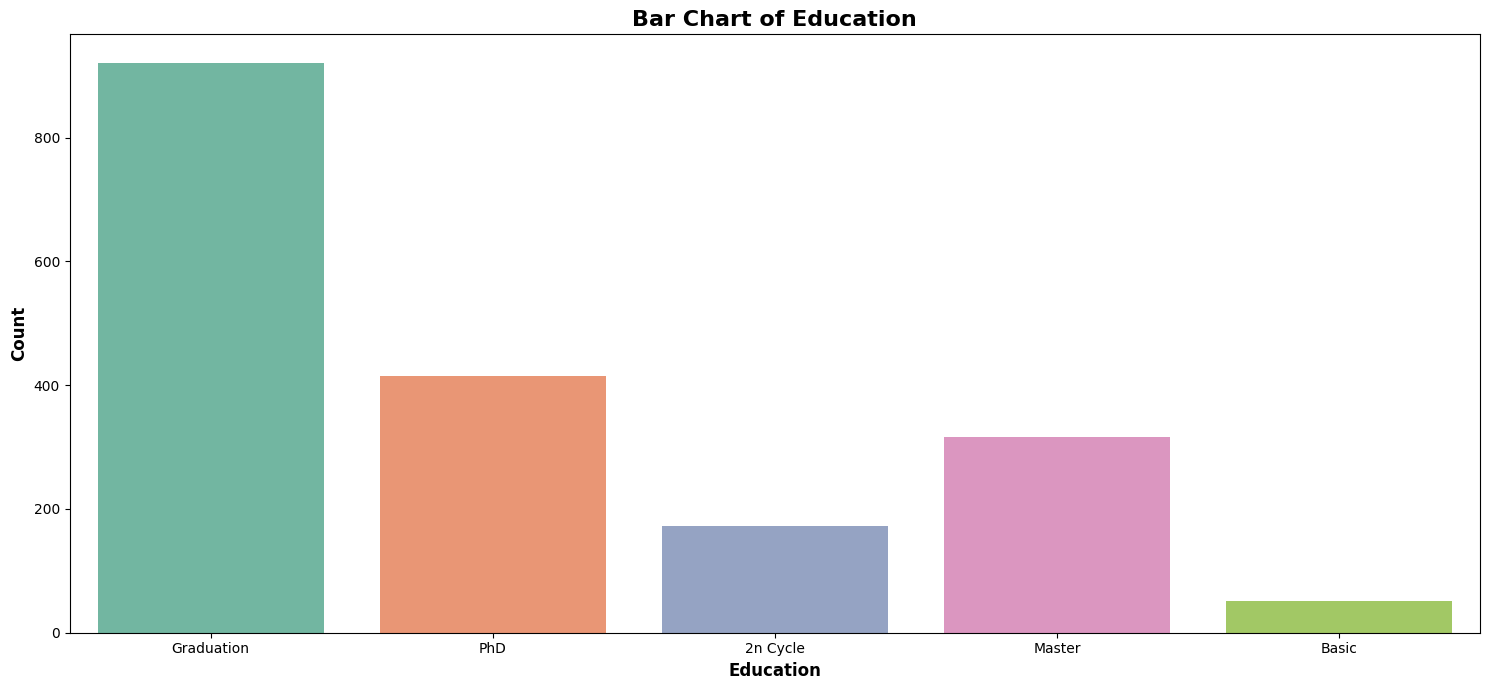

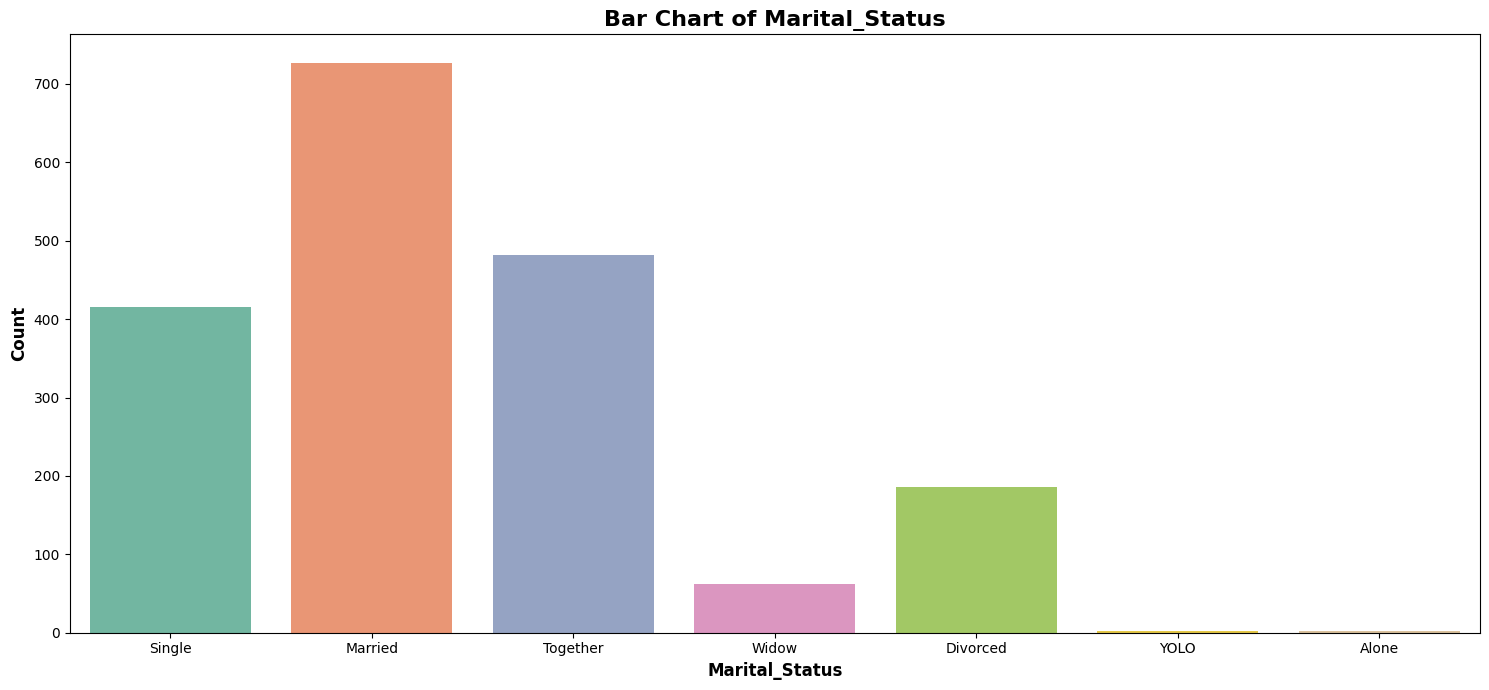

In [61]:


# Loop through each object (categorical) column
for column in dataframe.select_dtypes(include='object').columns:
    plt.figure(figsize=(15, 7))  # Adjust figure size
    sns.countplot(data=dataframe, x=column, palette='Set2')  # Using Seaborn's countplot
    plt.title(f'Bar Chart of {column}', fontsize=16, color='black', weight='bold')  # Title
    plt.xlabel(column, fontsize=12, color='black', weight='bold')  # X-axis label
    plt.ylabel('Count', fontsize=12, color='black', weight='bold')  # Y-axis label
    plt.grid(False)  # No grid lines
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot


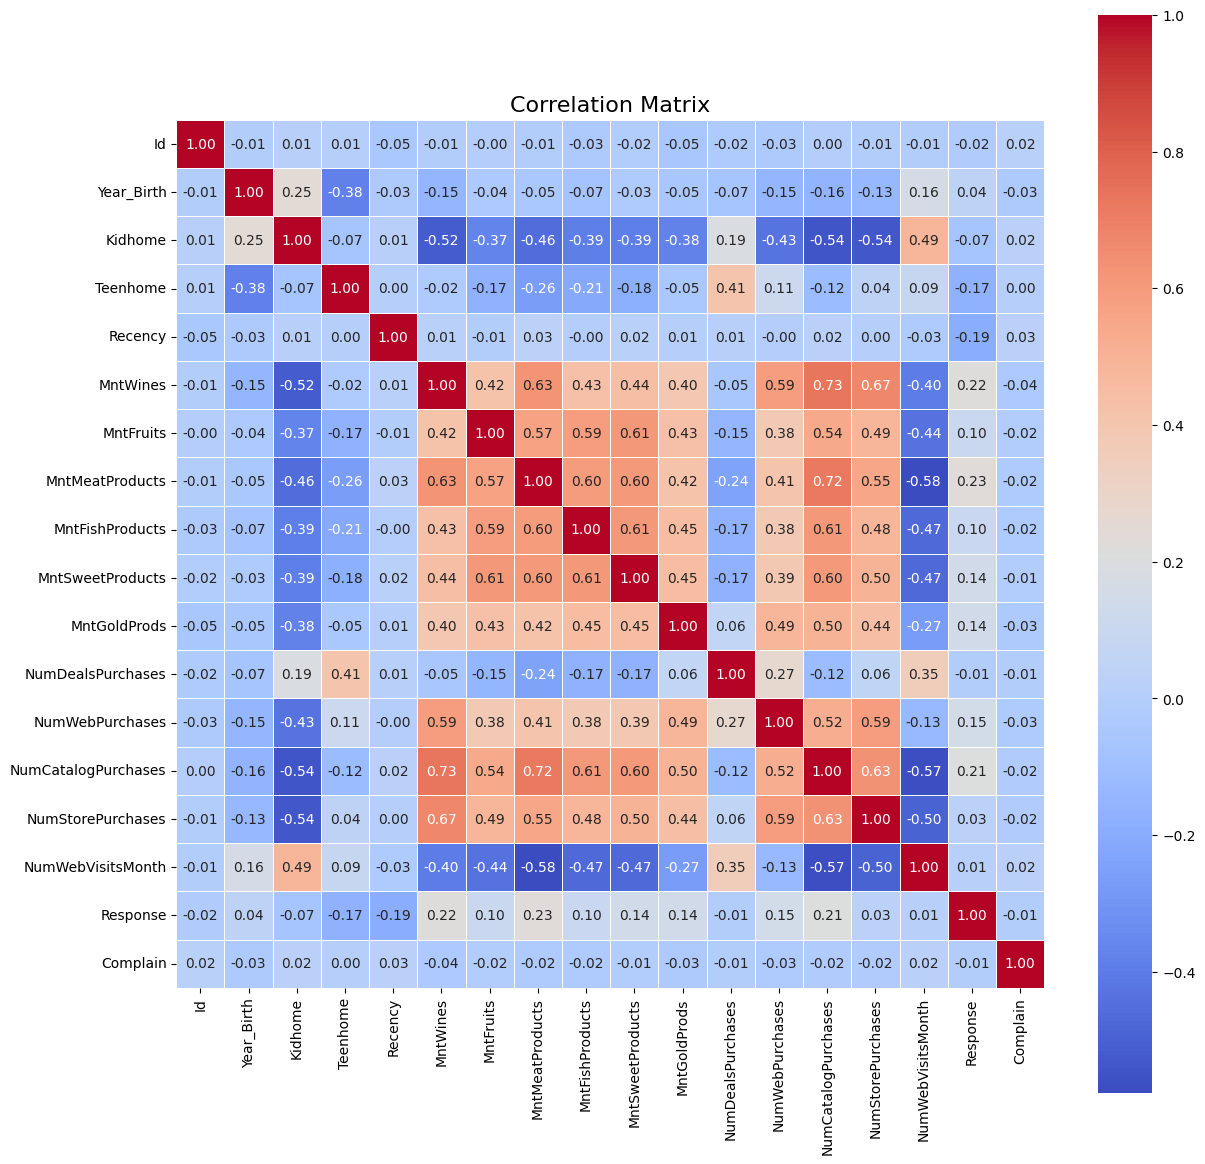

In [62]:
correlation_matrix = dataframe.select_dtypes(include='int64').corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [25]:
dataframe.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

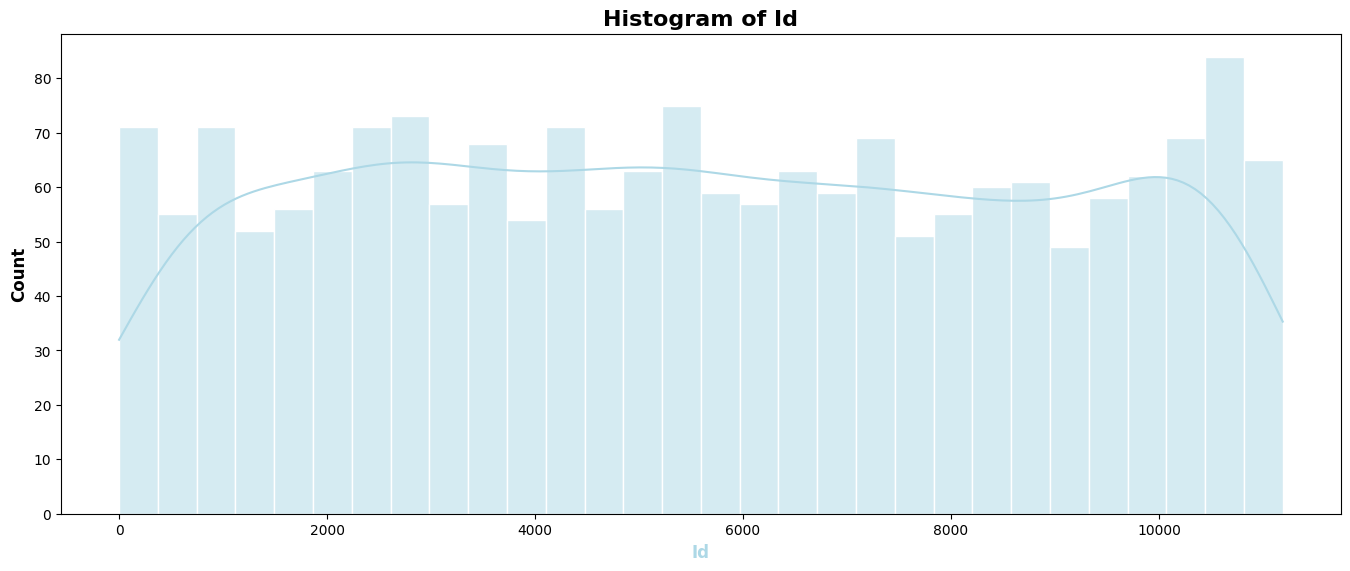

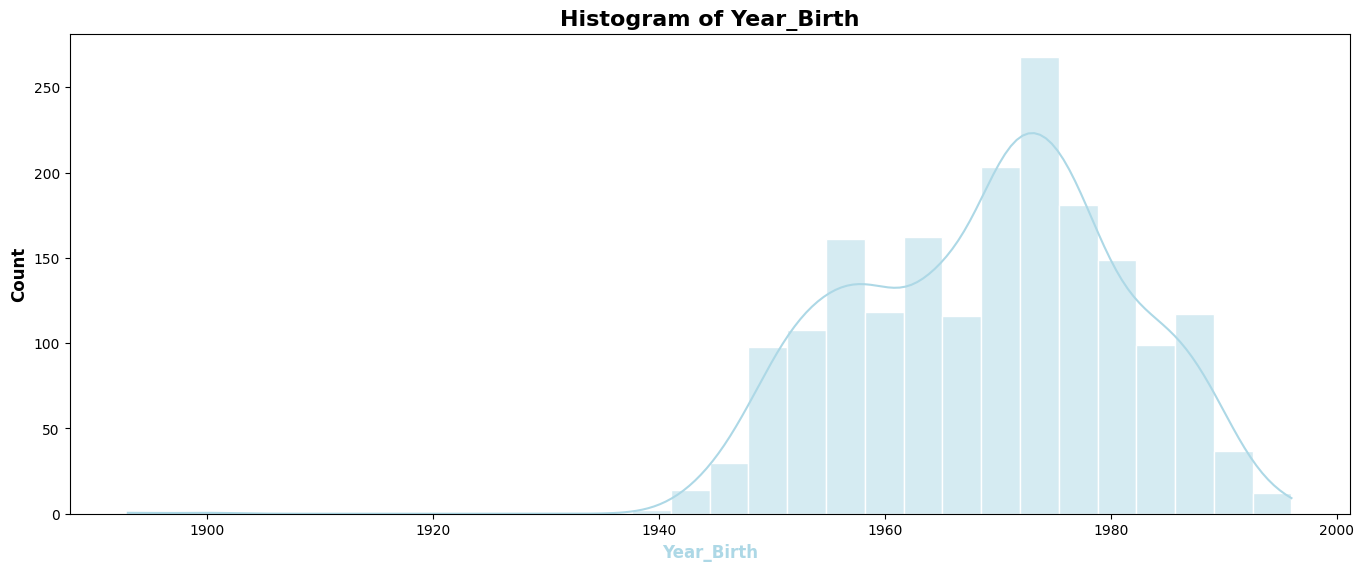

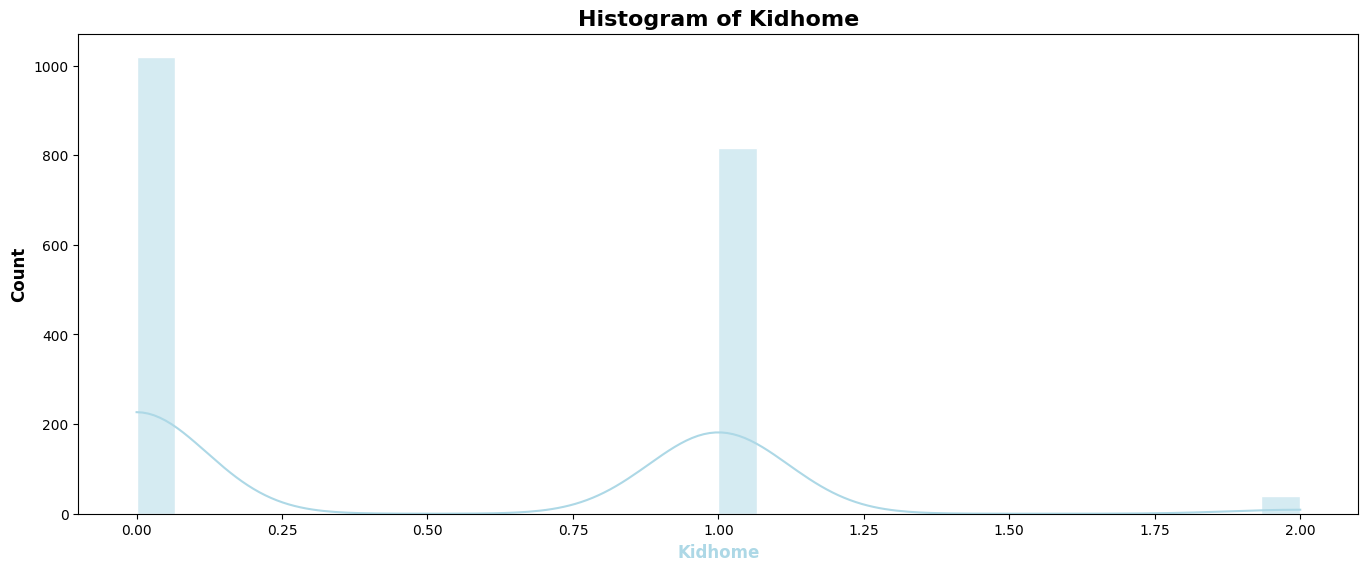

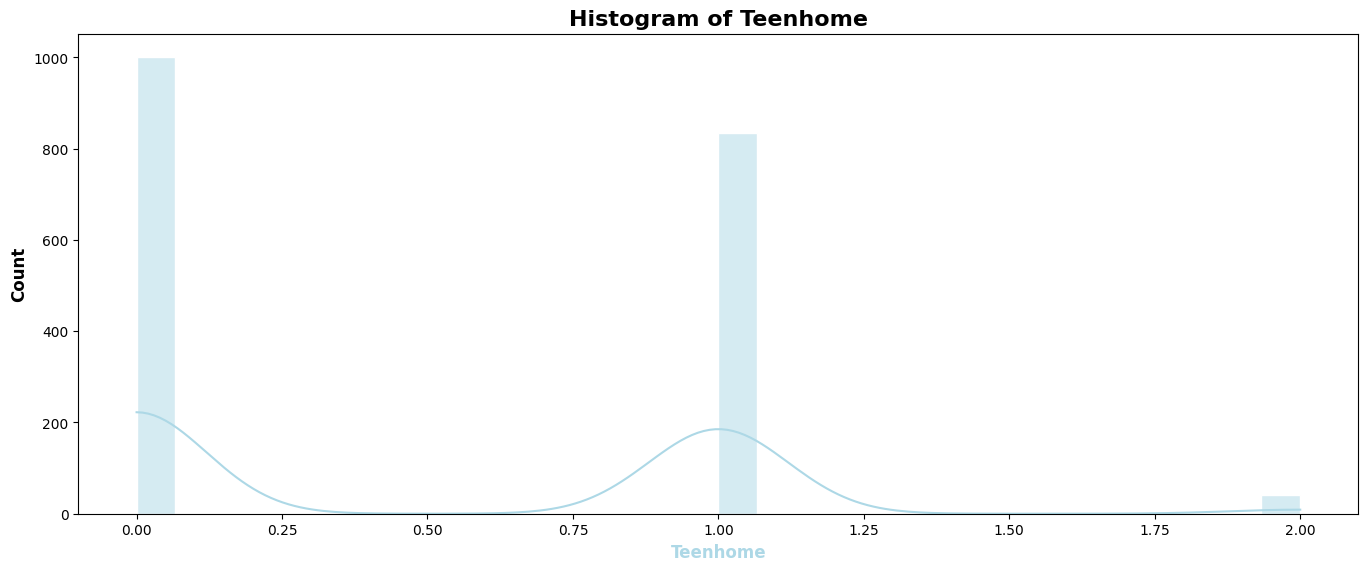

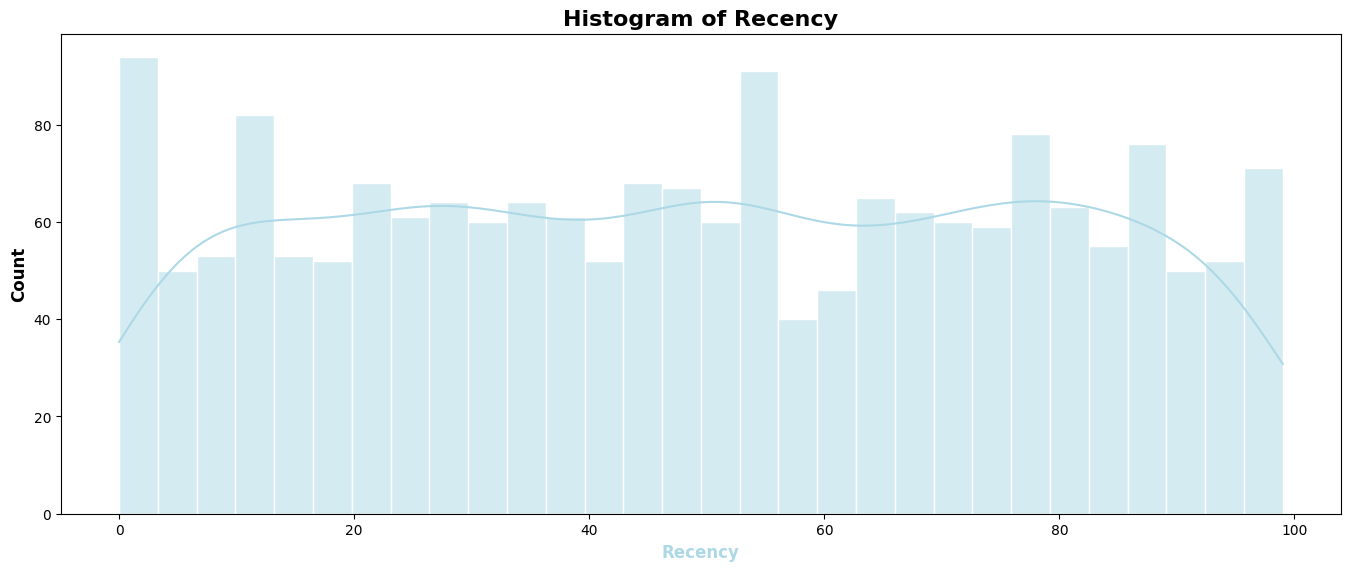

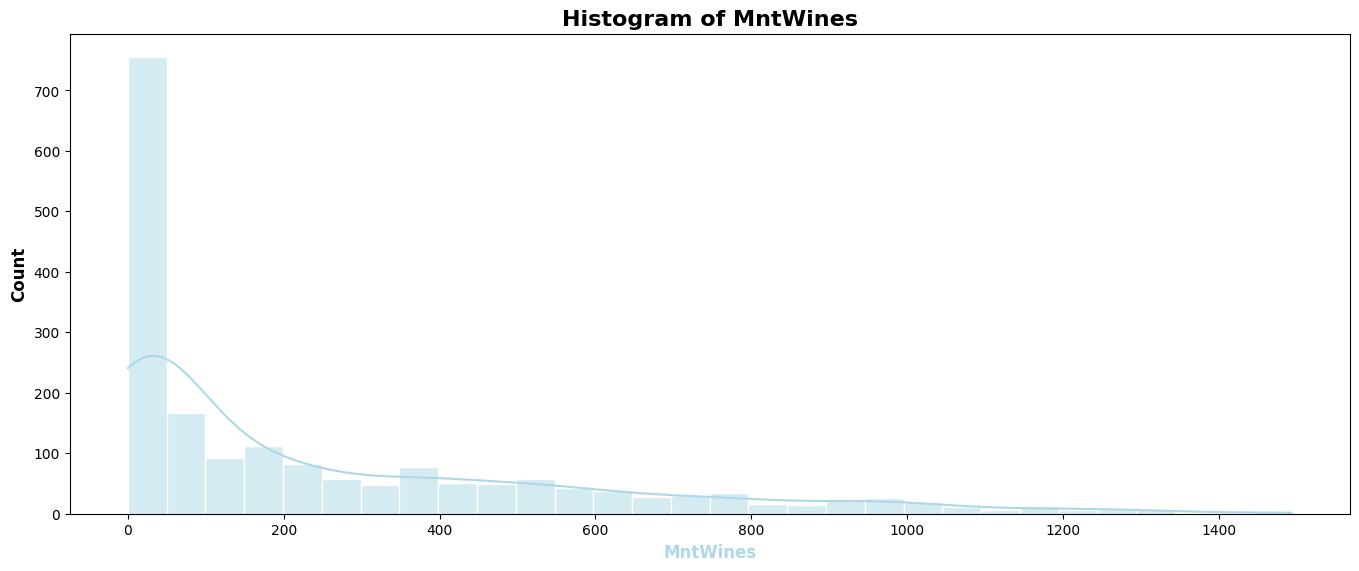

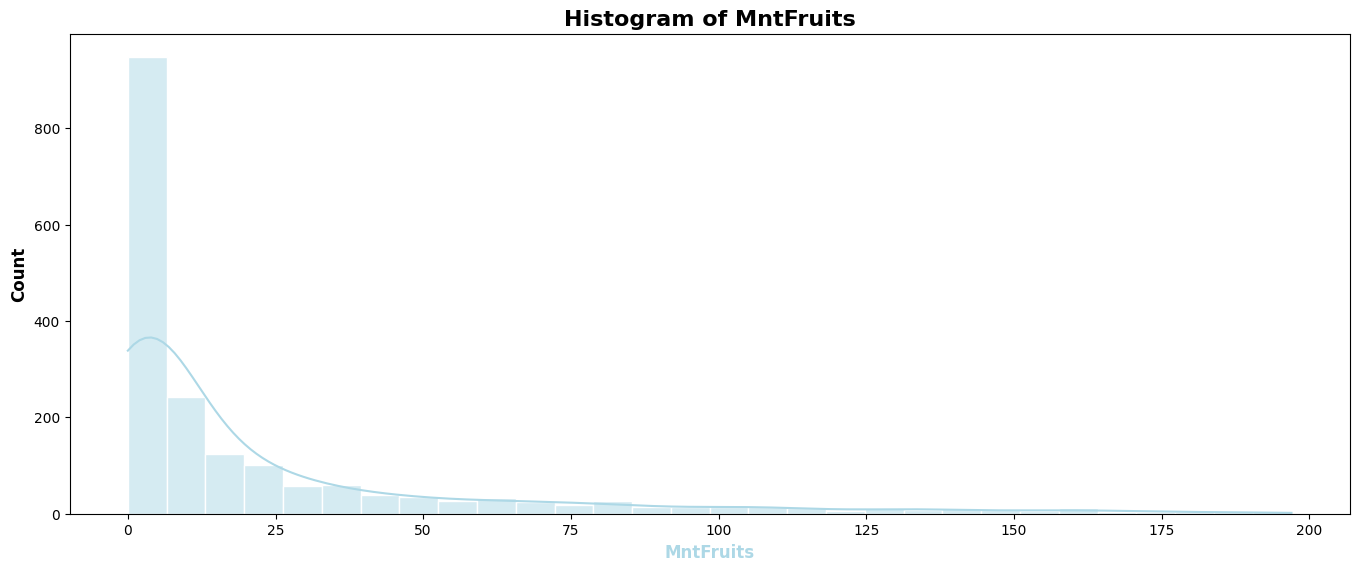

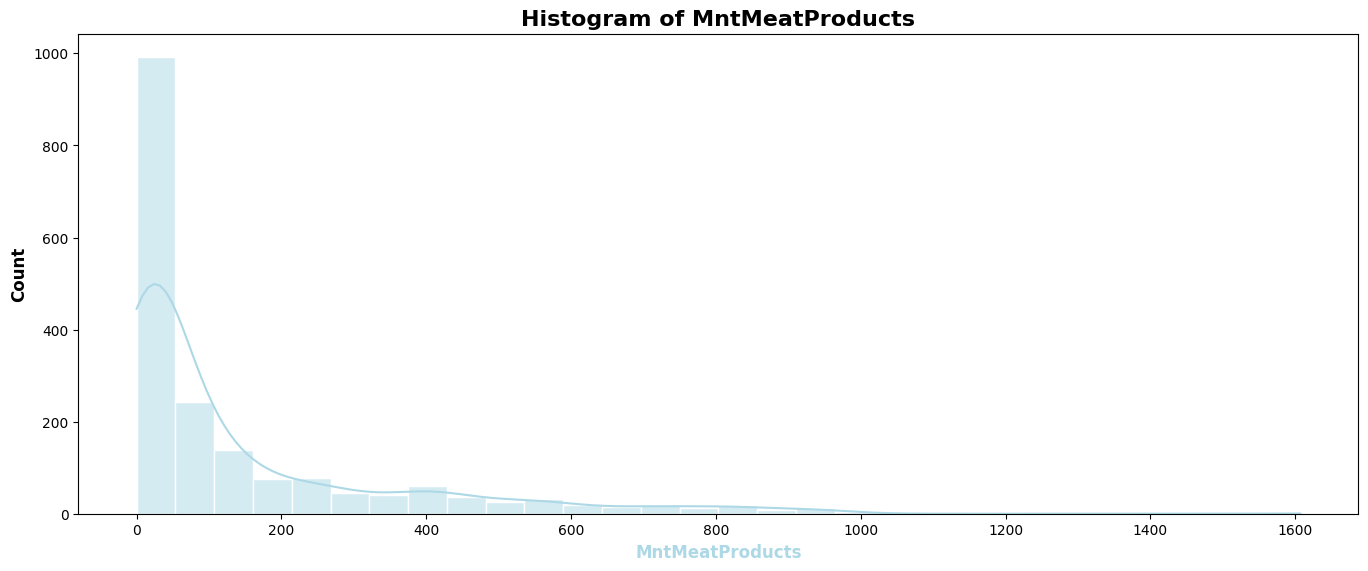

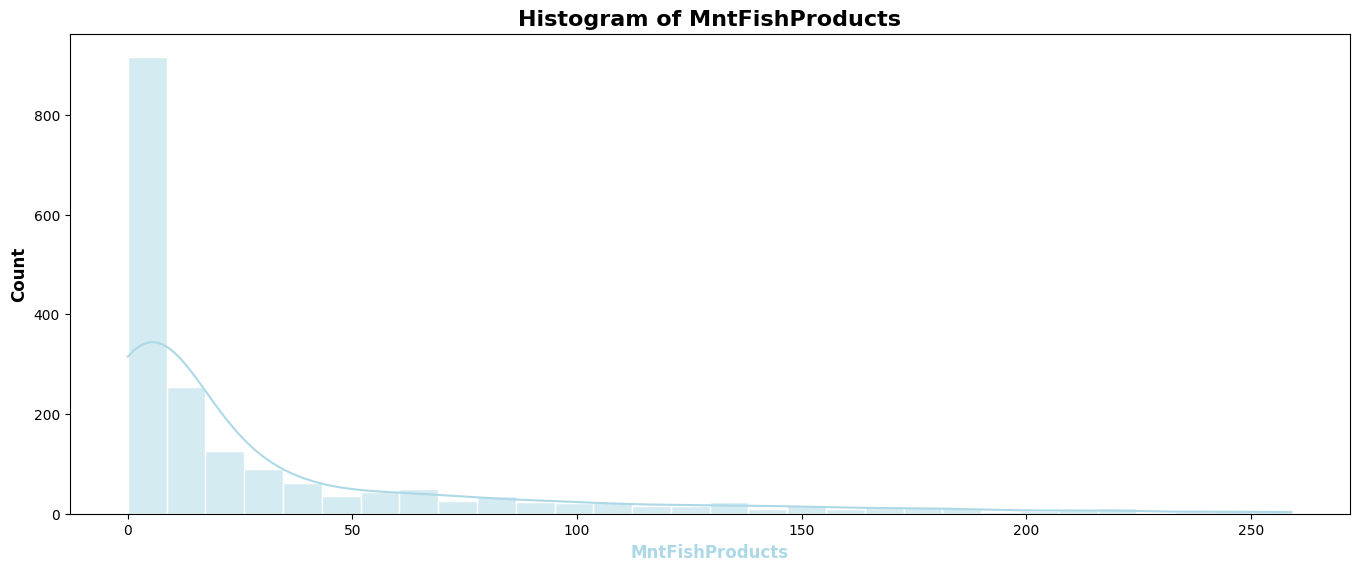

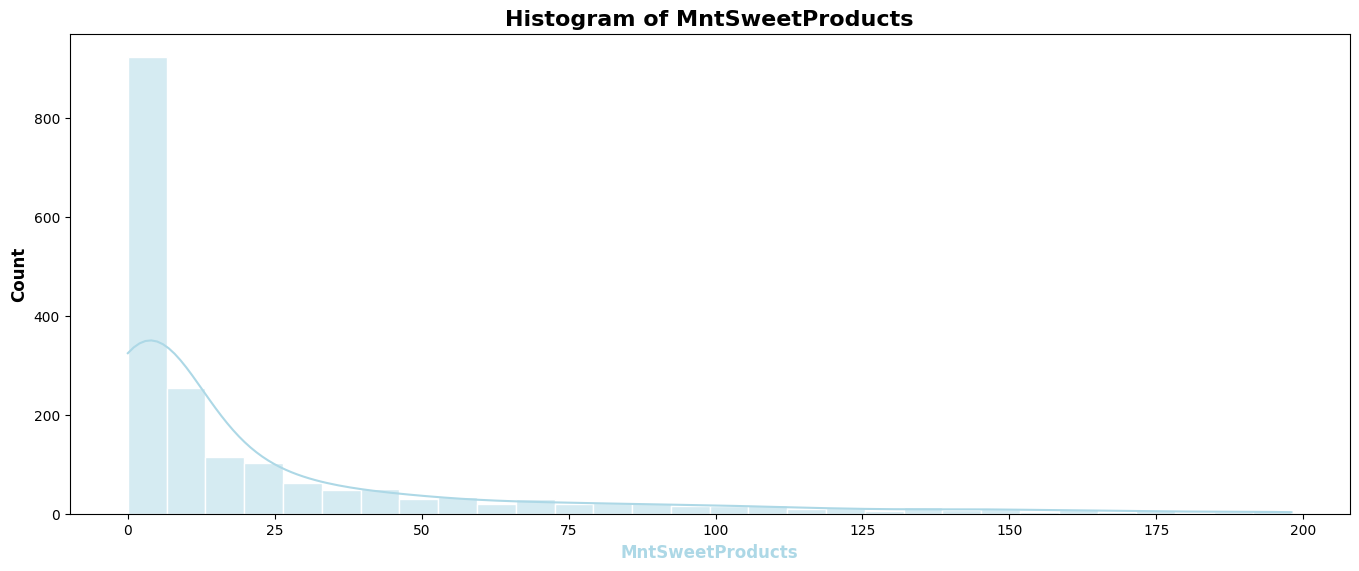

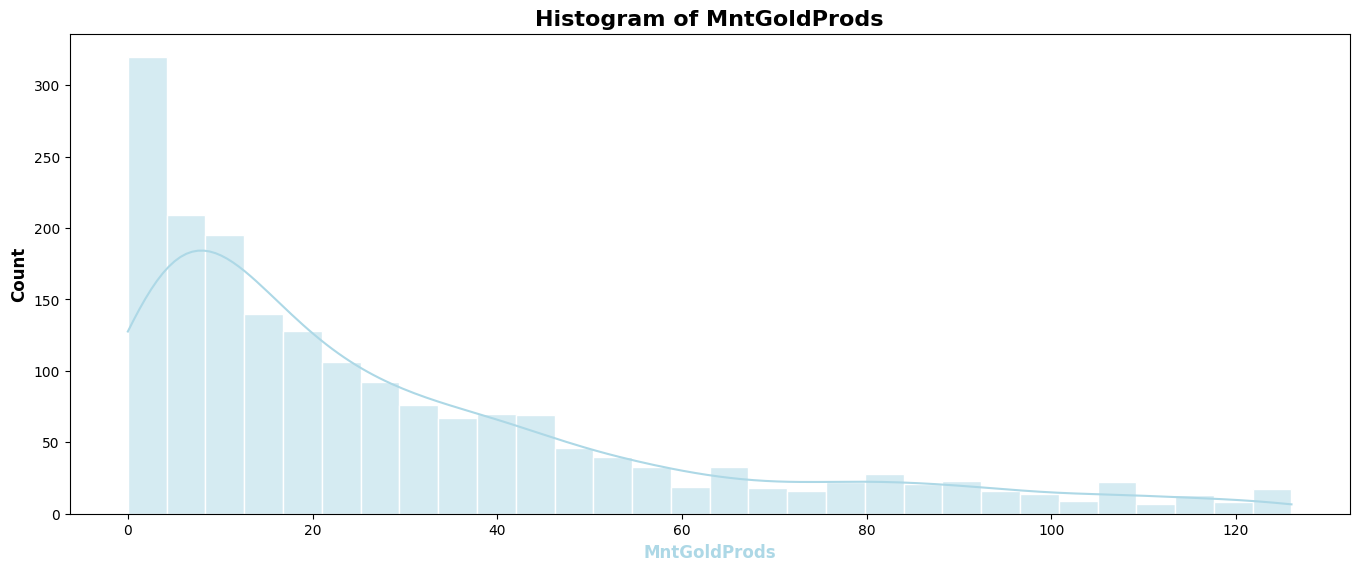

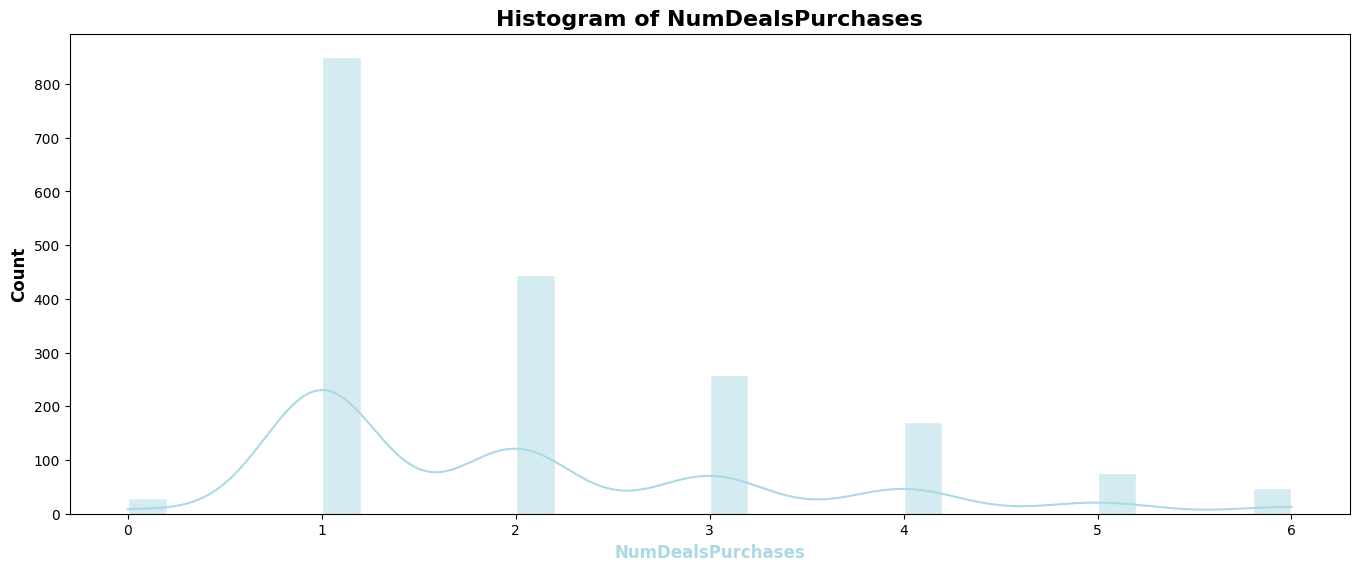

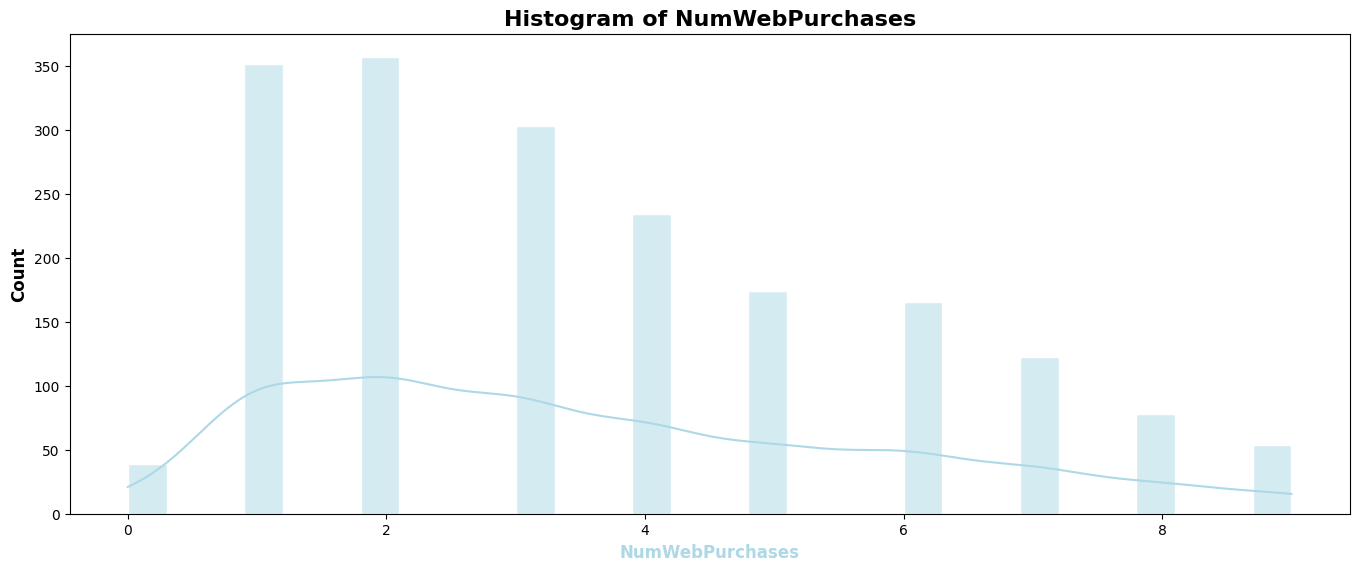

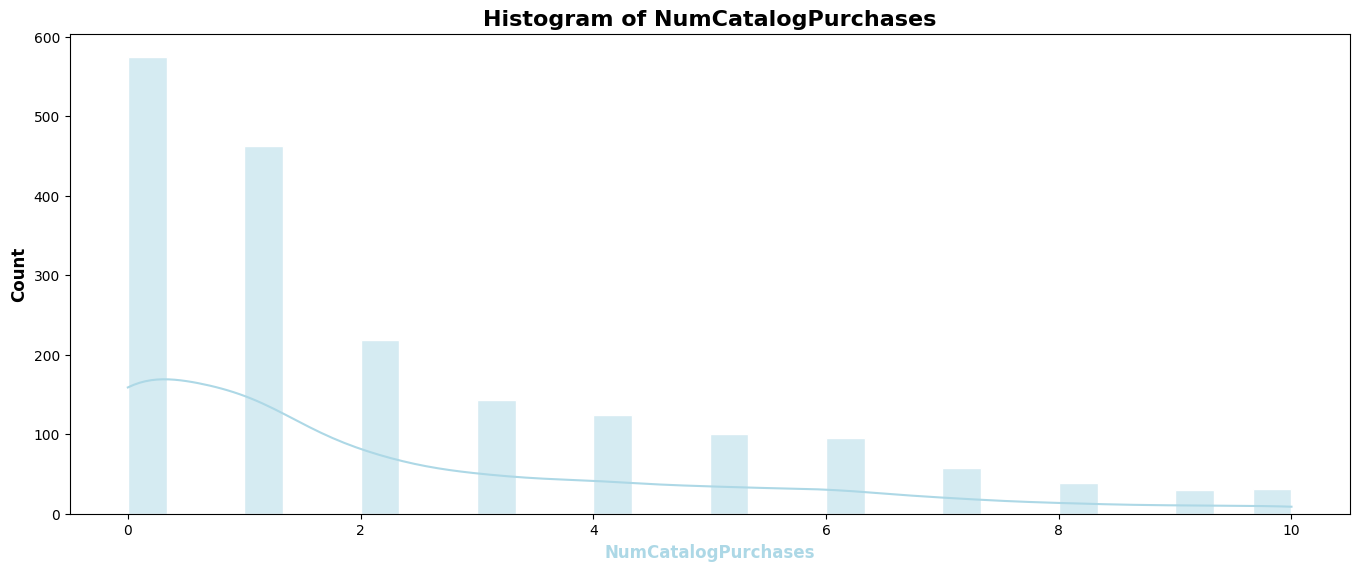

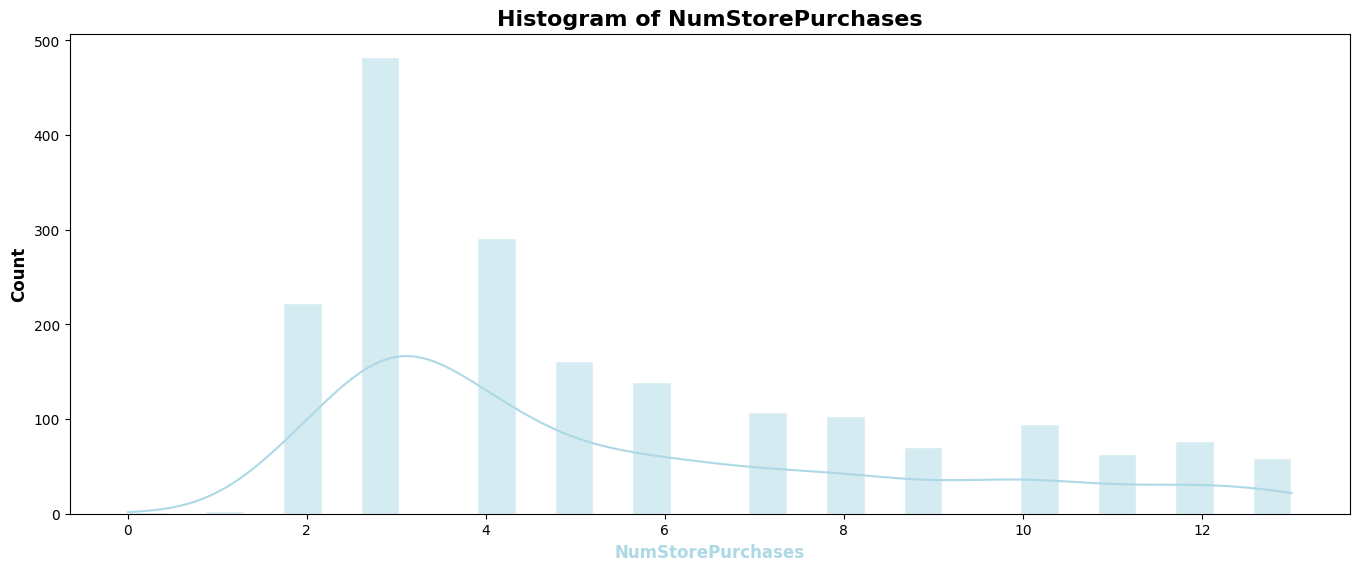

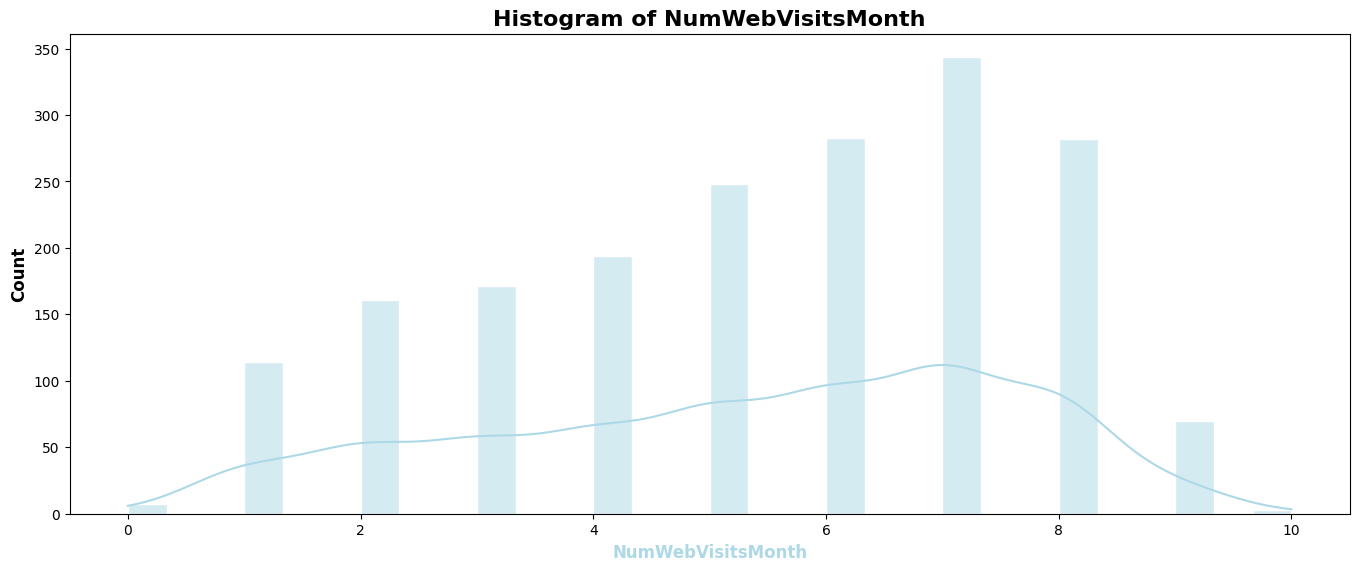

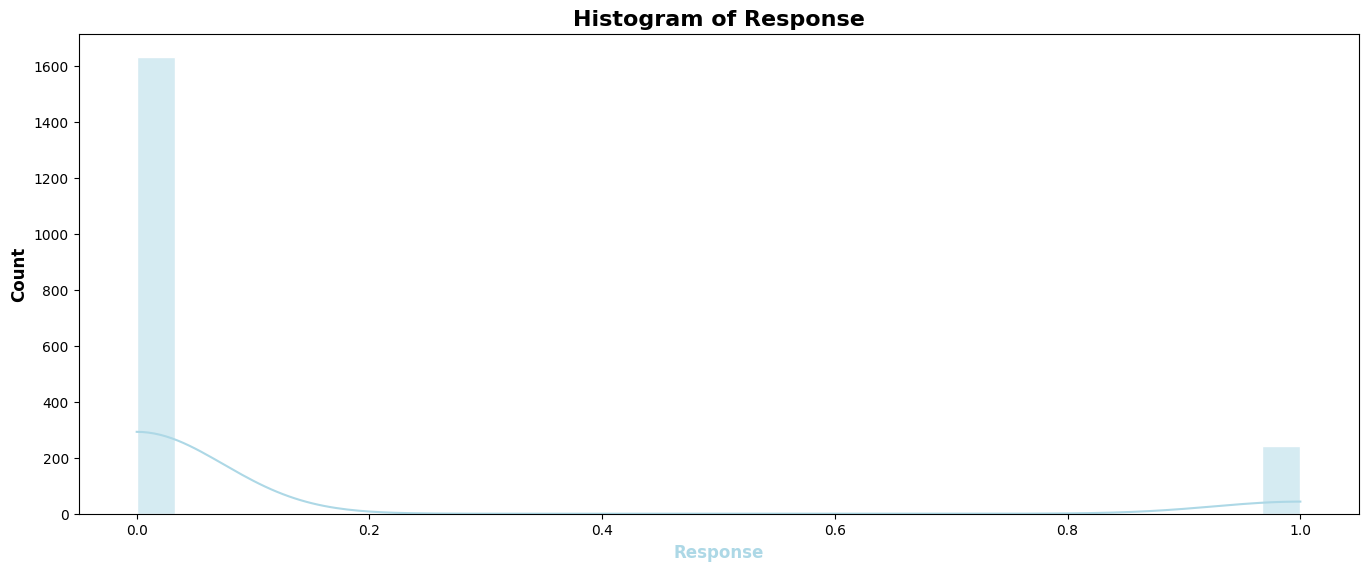

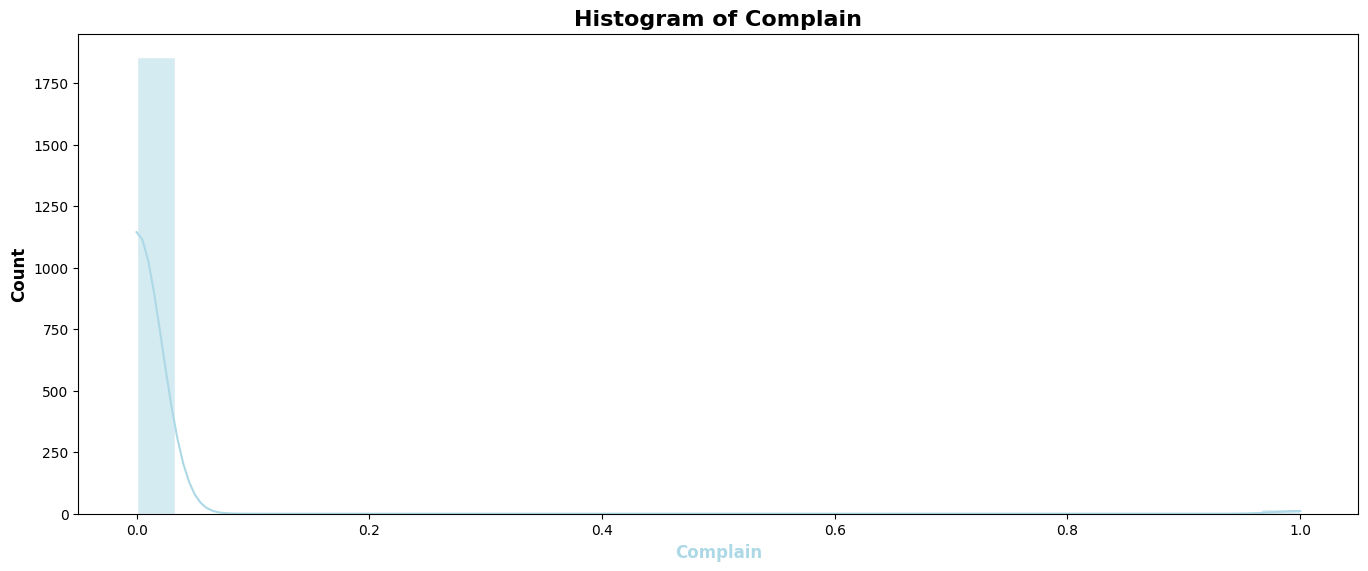

In [63]:
for i in dataframe.select_dtypes(include='int64').columns:
    plt.figure(figsize=(16, 6))
    sns.histplot(data=dataframe, x=i, bins=30,kde=True, color='lightblue', edgecolor='white')
    plt.title(f'Histogram of {i}', fontsize=16, color='black', weight='bold')
    plt.xlabel(i, fontsize=12, color='lightblue', weight='bold')
    plt.ylabel('Count', fontsize=12, color='black', weight='bold')
    plt.grid(False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5)
    plt.show()

**RECENCY** **DISTRIBUTION**


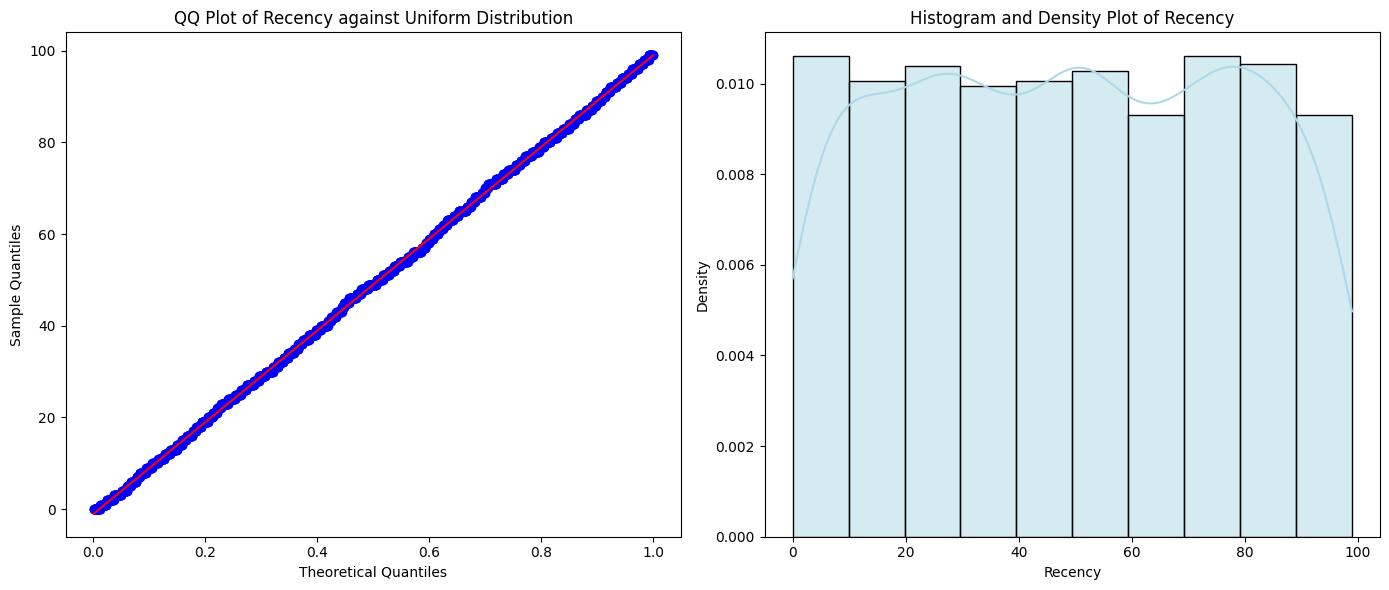

In [64]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# QQ Plot
stats.probplot(dataframe['Recency'], dist="uniform", plot=axs[0])
axs[0].set_title('QQ Plot of Recency against Uniform Distribution')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Sample Quantiles')
axs[0].grid(False)

# Histogram and Density Plot
sns.histplot(dataframe['Recency'], bins=10, kde=True, color='lightblue', stat='density', ax=axs[1])
axs[1].set_title('Histogram and Density Plot of Recency')
axs[1].set_xlabel('Recency')
axs[1].set_ylabel('Density')
axs[1].grid(False)


plt.tight_layout()
plt.show()


In [65]:
#CREATING A DATOF RECENCY DATA
recency_data = dataframe['Recency']

# Calculating the min and max values for the uniform distribution
a = recency_data.min()
b = recency_data.max()

# Calculating Mean and Variance
mean_recency = (a + b) / 2
variance_recency = (b - a) ** 2 / 12

print(f"Mean (Expected Value): {mean_recency}")
print(f"Variance: {variance_recency}")

#calculating probabilities
x_0 = 5  #probabilty of data occuring 5 its basically finding  pdf(probability density function) of that datapoint
if a <= x_0 <= b:
    probability_less_than_x0 = (x_0 - a) / (b - a)
    print(f"P(X <= {x_0}): {probability_less_than_x0:.4f}")
else:
    print(f"{x_0} is out of the bounds of the uniform distribution.")

x_0 = 15
if a <= x_0 <= b:
    probabilityat_x_0 = (1/b-a)
    print(f"P(X = {x_0}): {probabilityat_x_0:.4f}")
else:
    print(f"{x_0} is out of the bounds of the uniform distribution.")

Mean (Expected Value): 49.5
Variance: 816.75
P(X <= 5): 0.0505
P(X = 15): 0.0101




Recency Data Summary
Mean (49.5): On average, customers re-engage after 49.5 units of time, suggesting a typical waiting period between interactions.

Variance (816.75): The high variance shows a wide spread in customer behaviors, indicating some engage frequently, while others take much longer. This suggests uncertainty in predicting when customers will re-engage.

Probabilities: With only 5.05% of customers re-engaging within 5 units of time .

***DISTRIBUTION OF BIRTH YEAR***

In [75]:
dataframe.head(4)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1  2014-06-15        0       464          5               64                7   
2  2014-05-13        0       134         11               59               15   
3         NaT        0        10          0                1                0   
4         NaT        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  
1         0  
2         0  
3         0  
4         0

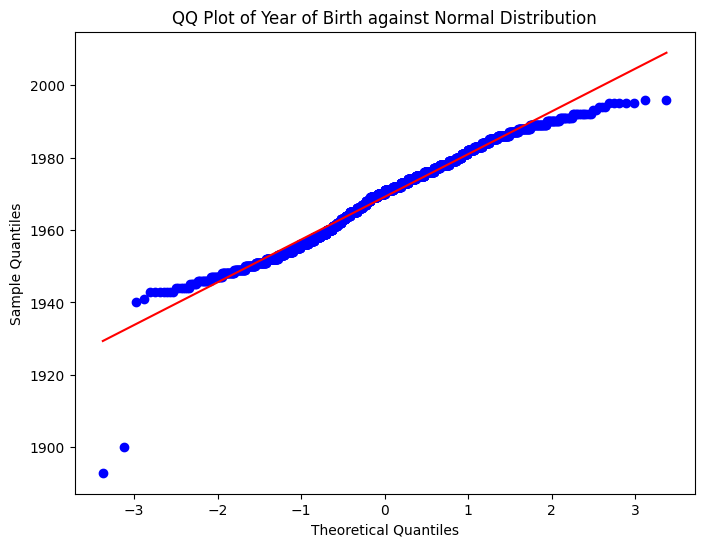

In [66]:
plt.figure(figsize=(8, 6))
stats.probplot(dataframe['Year_Birth'], dist="norm", plot=plt)
plt.title('QQ Plot of Year of Birth against Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(False)
plt.show()

In [67]:
mean_year_birth = dataframe['Year_Birth'].mean()
variance_year_birth = dataframe['Year_Birth'].var()

# Step 2: Print Mean and Variance
print(f"Mean (Expected Value): {mean_year_birth}")
print(f"Variance: {variance_year_birth}")

# Step 3: Calculate Probability (P(X <= x))
# For example, calculate P(X <= 1960)
x_value = 1960
probability = stats.norm.cdf(x_value, loc=mean_year_birth, scale=np.sqrt(variance_year_birth))

# Print Probability
print(f"P(X <= {x_value}): {probability:.4f}")
# by looking at qq plot we could say its not exactly normal_distribution bot close to it

Mean (Expected Value): 1969.1497069792222
Variance: 141.95358866675966
P(X <= 1960): 0.2213


The average year of birth is around 1969, with a moderate level of variability (standard deviation of 12 years).
There is a 23.12% chance of selecting someone born in or before 1960. This indicates a notable presence of individuals born in that time frame, although the majority of the population is likely born in later years, reflecting the mean.

**DISTRIBUTION OF RESPONSE**

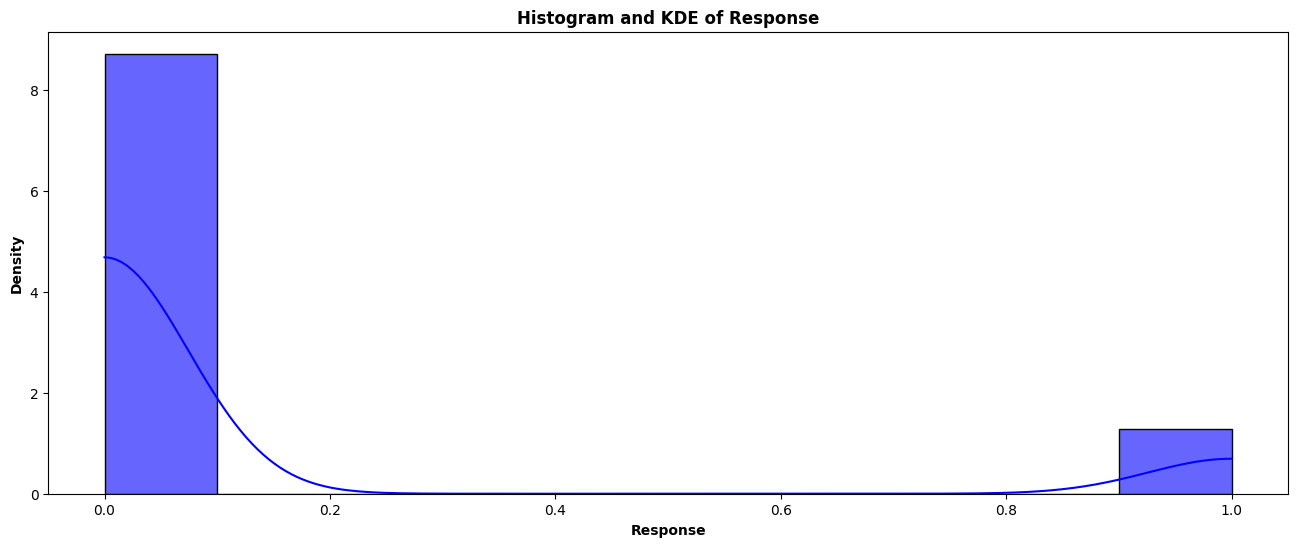

In [68]:
plt.figure(figsize=(16, 6))
sns.histplot(dataframe['Response'], bins=10, kde=True, color='blue', stat='density', alpha=0.6)

# Step 2: Customize the plot
plt.title('Histogram and KDE of Response',weight='bold')
plt.xlabel('Response',weight='bold')
plt.ylabel('Density',weight='bold')
plt.grid(False)

In [69]:
# for us her the success would be having a response
#Calculating probability of success (mean) that is basically mean of the data
p_success = dataframe['Response'].mean()

#  variance
variance = p_success * (1 - p_success)

#  calculating probabilities for P(X=1) and P(X=0)
P_X_equals_1 = p_success  # Probability of success
P_X_equals_0 = 1 - p_success  # Probability of failure

# Print the results
print(f"Mean (Expected Value): {p_success}")
print(f"Variance: {variance}")
print(f"P(X=1): {P_X_equals_1}")
print(f"P(X=0): {P_X_equals_0}")

Mean (Expected Value): 0.1289291422482685
Variance: 0.11230641852739424
P(X=1): 0.1289291422482685
P(X=0): 0.8710708577517314


In [70]:
import pandas as pd
from scipy.stats import binom


# Calculating probability of success (mean)
p_success = dataframe['Response'].mean()

# Calculating the number of trials (n)
n = len(dataframe)

# mean (expected value)
mean = n * p_success

# Calculating variance
variance = n * p_success * (1 - p_success)

# Calculate probabilities for P(X=1) and P(X=0)
P_X_equals_1 = binom.pmf(1, n, p_success)  # Probability of  getting 1 success in 1877 trials
P_X_equals_0 = binom.pmf(0, n, p_success)  # Probability of 0 successes in 1877 trials


print(f"Probability of Success (p): {p_success}")
print(f"Number of Trials (n): {n}")
print(f"Mean (Expected Value): {mean}")
print(f"Variance: {variance}")
print(f"P(X=1): {P_X_equals_1}")
print(f"P(X=0): {P_X_equals_0}")


Probability of Success (p): 0.1289291422482685
Number of Trials (n): 1877
Mean (Expected Value): 242.0
Variance: 210.799147575919
P(X=1): 8.397539462636959e-111
P(X=0): 3.0226660755055074e-113


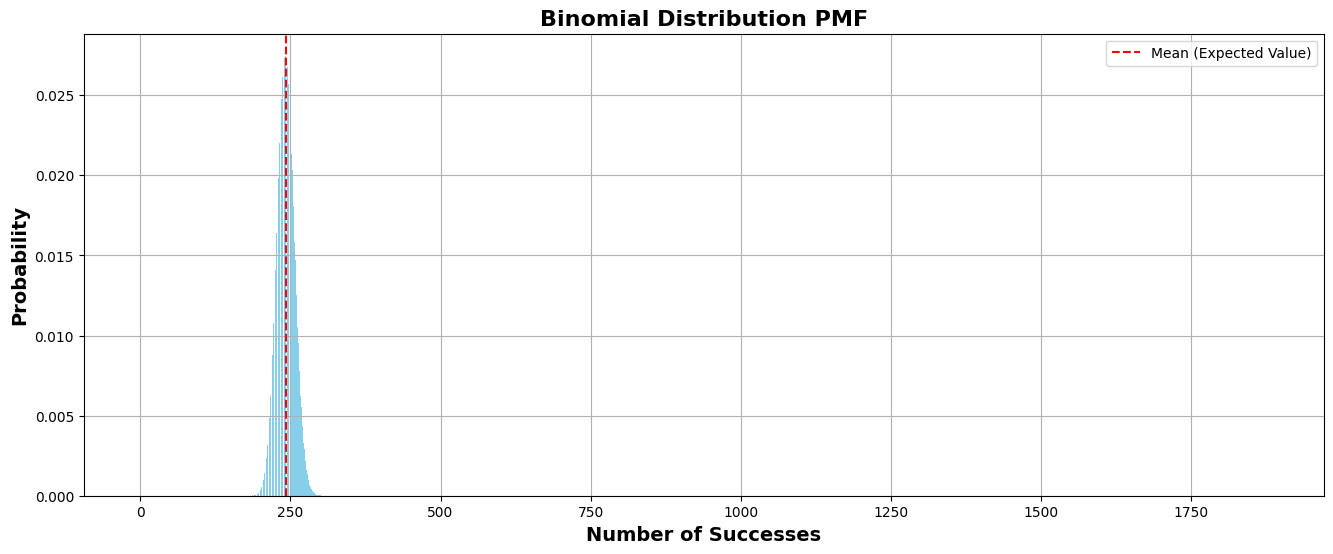

In [83]:

from scipy.stats import binom

# Setting up the parameters
p_success = dataframe['Response'].mean()
n = len(dataframe)

# Creating an array of possible outcomes (0 to n)
x = np.arange(0, n + 1)

# Calculating the PMF for each outcome
pmf_values = binom.pmf(x, n, p_success)


plt.figure(figsize=(16, 6))
plt.bar(x, pmf_values, color='skyblue')
plt.title('Binomial Distribution PMF', fontsize=16,weight='bold')
plt.xlabel('Number of Successes', fontsize=14,weight='bold')
plt.ylabel('Probability', fontsize=14,weight='bold')
plt.axvline(mean, color='red', linestyle='--', label='Mean (Expected Value)')
plt.legend()
plt.grid()
plt.show()


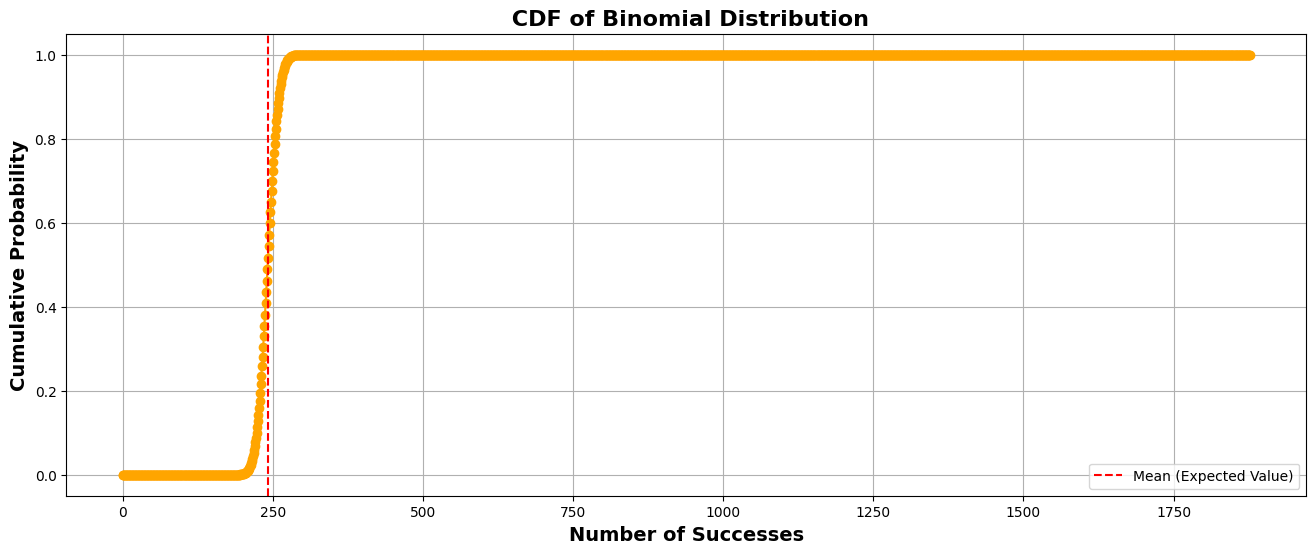

In [84]:
# Calculate the CDF for each outcome
cdf_values = binom.cdf(x, n, p_success)

# Plot the CDF
plt.figure(figsize=(16, 6))
plt.plot(x, cdf_values, marker='o', color='orange')
plt.title(' CDF of Binomial Distribution', fontsize=16,weight='bold')
plt.xlabel('Number of Successes', fontsize=14,weight='bold')
plt.ylabel('Cumulative Probability', fontsize=14,weight='bold')
plt.axvline(mean, color='red', linestyle='--', label='Mean (Expected Value)')
plt.legend()
plt.grid()
plt.show()


In [71]:
#building a confidence interval for number of success for 1877 trails with 95 percent confidence level
#we will be using z method because we know the population standard deviation
import scipy.stats as stats

# Standard deviation
std_dev = np.sqrt(variance)

# Confidence level
confidence_level = 0.95
z_score = stats.norm.ppf(confidence_level + (1-confidence_level)/2)

# Margin of error
margin_of_error = z_score * std_dev

# Confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"95% Confidence Interval for Number of Successes: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Number of Successes: (213.54, 270.46)


**DISTRIBUTION OF COMPLAINT**

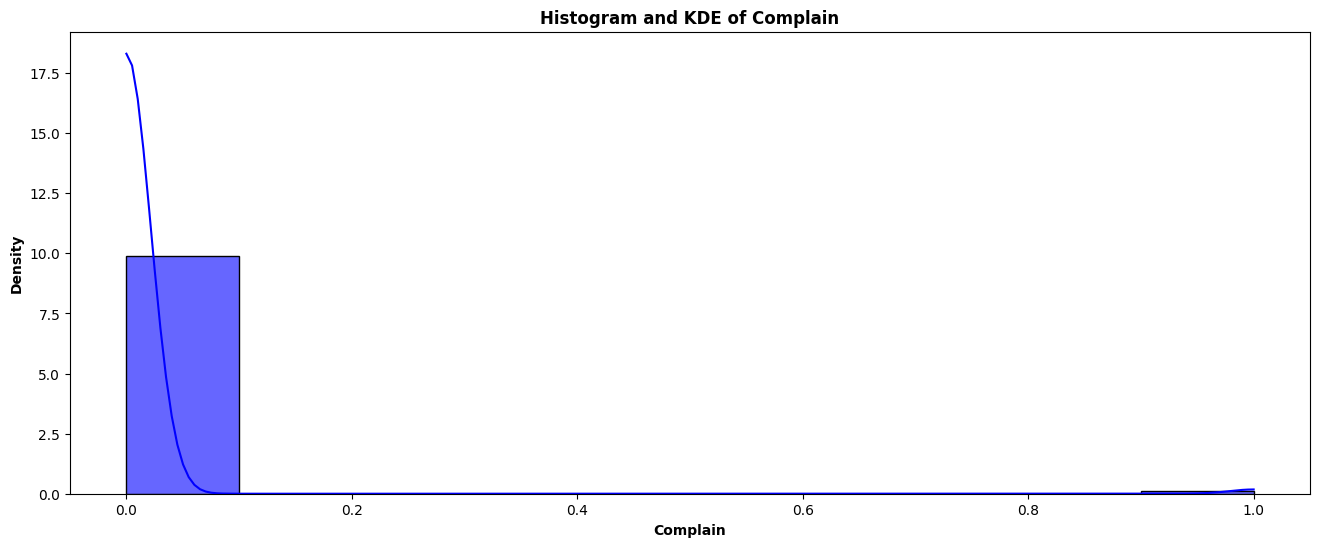

In [37]:
plt.figure(figsize=(16, 6))
sns.histplot(dataframe['Complain'], bins=10, kde=True, color='blue', stat='density', alpha=0.6)

# Step 2: Customize the plot
plt.title('Histogram and KDE of Complain',weight='bold')
plt.xlabel('Complain',weight='bold')
plt.ylabel('Density',weight='bold')
plt.grid(False)

In [38]:
# for us here the success is not getting a complaint so getting a 0 is success
# Calculate probability of success (mean for 0s)
p_success = (1 - dataframe['Complain'].mean())  # Probability of success (P(X=0))

# Calculate variance for Bernoulli distribution
variance = p_success * (1 - p_success)  # Variance

# Calculate probabilities for P(X=1) (failure) and P(X=0) (success)
P_X_equals_1 = dataframe['Complain'].mean()  # Probability of failure (P(X=1))
P_X_equals_0 = p_success  # Probability of success (P(X=0))

print(f"Mean (Expected Value) of Complaints (1): {P_X_equals_1}")
print(f"Variance: {variance}")
print(f"P(X=1) (Probability of Complaint/Failure): {P_X_equals_1}")
print(f"P(X=0) (Probability of No Complaint/Success): {P_X_equals_0}")


Mean (Expected Value) of Complaints (1): 0.009589770911028236
Variance: 0.009497807204902193
P(X=1) (Probability of Complaint/Failure): 0.009589770911028236
P(X=0) (Probability of No Complaint/Success): 0.9904102290889718


Mean (Expected Value) of Complaints (1):

Value:
0.009375
0.009375
Interpretation: This indicates that the average proportion of complaints in your dataset is approximately
0.9375
%
0.9375%. In other words, very few instances result in complaints, suggesting that overall, the system or service being evaluated is functioning well in terms of customer satisfaction.
Variance:

Value:
0.009287
0.009287
Interpretation: The variance is quite low, indicating that the outcomes (complaints) do not vary significantly. This suggests that most of the data points are concentrated around the mean, reinforcing the notion that complaints are infrequent.
Probability of Complaint (P(X=1)):

Value:
0.009375
0.009375
Interpretation: There is a
0.9375
%
0.9375% chance of receiving a complaint. This low probability indicates that complaints are rare occurrences in your data, which is positive from a performance or quality perspective.
Probability of No Complaint (P(X=0)):

Value:
0.990625
0.990625
Interpretation: There is a
99.0625
%
99.0625% chance of not receiving a complaint. This high probability suggests that most interactions or observations in your dataset do not result in complaints, indicating a high level of satisfaction or success in the system being evaluated

In [72]:
dataframe.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [73]:
dataframe.head(15)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1       1        1961  Graduation         Single  57091.0        0         0   
2   10476        1958  Graduation        Married  67267.0        0         1   
3    1386        1967  Graduation       Together  32474.0        1         1   
4    5371        1989  Graduation         Single  21474.0        1         0   
5    7348        1958         PhD         Single  71691.0        0         0   
7    1991        1967  Graduation       Together  44931.0        0         1   
8    4047        1954         PhD        Married  65324.0        0         1   
9    9477        1954         PhD        Married  65324.0        0         1   
10   2079        1947    2n Cycle        Married  81044.0        0         0   
11   5642        1979      Master       Together  62499.0        1         0   
12  10530        1959         PhD          Widow  67786.0        0         0   
13   2964        1981  Graduation        Married  26872.0        0         0   
15    837        1977  Graduation        Married  54809.0        1         1   
16  10521        1977  Graduation        Married  54809.0        1         1   
17  10175        1958         PhD       Divorced  32173.0        0         1   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1   2014-06-15        0       464          5               64   
2   2014-05-13        0       134         11               59   
3          NaT        0        10          0                1   
4          NaT        0         6         16               24   
5   2014-03-17        0       336        130              411   
7   2014-01-18        0        78          0               11   
8          NaT        0       384          0              102   
9          NaT        0       384          0              102   
10  2013-12-27        0       450         26              535   
11         NaT        0       140          4               61   
12         NaT        0       431         82              441   
13  2013-10-16        0         3         10                8   
15         NaT        0        63          6               57   
16         NaT        0        63          6               57   
17         NaT        0        18          0                2   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                 7                 0            37                  1   
2                15                 2            30                  1   
3                 0                 0             0                  1   
4                11                 0            34                  2   
5               240                32            43                  1   
7                 0                 0             7                  1   
8                21                32             5                  3   
9                21                32             5                  3   
10               73                98            26                  1   
11                0                13             4                  2   
12               80                20           102                  1   
13                3                16            32                  1   
15               13                13            22                  4   
16               13                13            22                  4   
17                0                 0             2                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                 7                    3                  7   
2                 3                    2                  5   
3                 1                    0                  2   
4                 3                    1                  2   
5                 4                    7                  5   
7                 2                    1                  3   
8                 6                    2                  9

**EXPLORATORY DATA ANALYSIS**

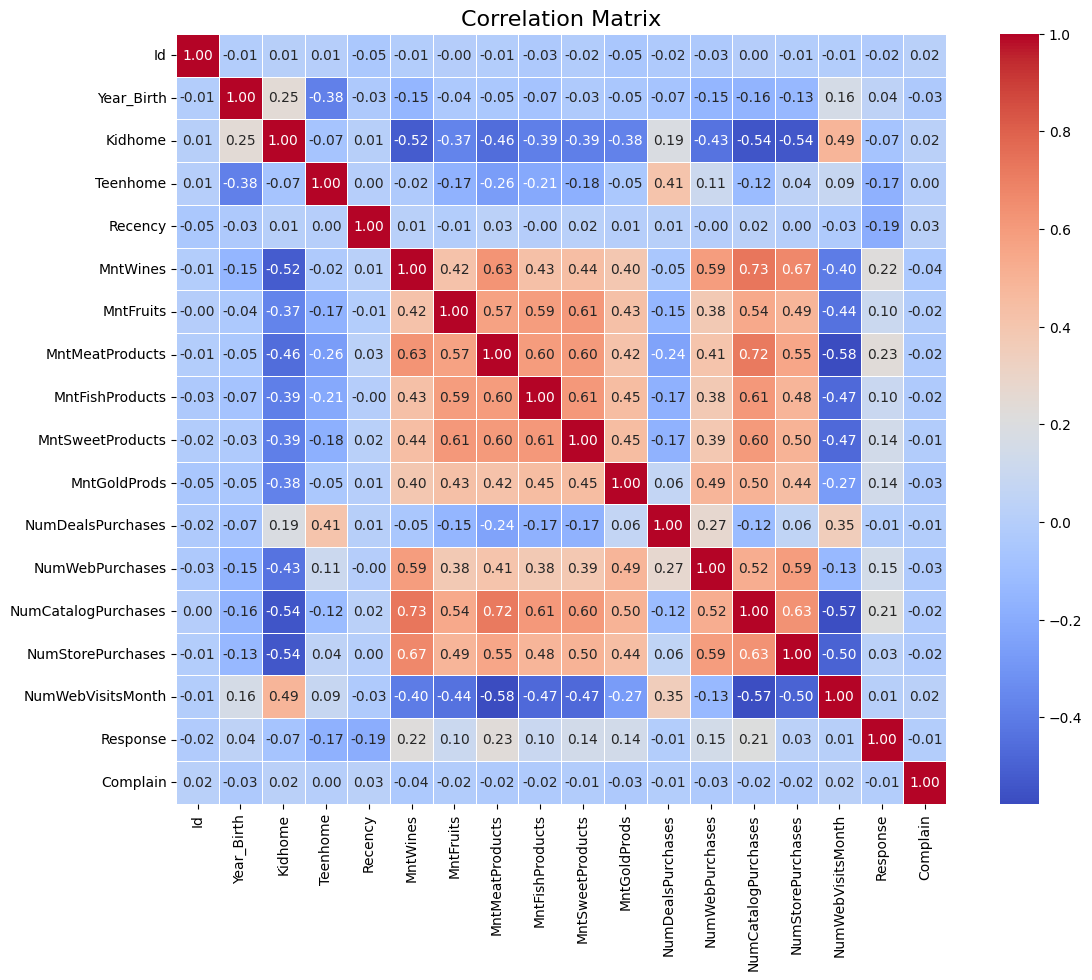

In [90]:
correlation_matrix = dataframe.select_dtypes(include='int64').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [91]:
# as we have many int features  and only two categorical column and for business context those two categorical features are important to analyze the changes with respect to int columns

grouped_by_education=dataframe.groupby('Education')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']].sum()
grouped_by_education

MntWines  MntMeatProducts  MntFishProducts  MntFruits  \
Education                                                           
2n Cycle       26026            21741             7391       4201   
Basic            156              418              580        455   
Graduation    219300           140064            33847      24155   
Master         90888            46518             9232       5961   
PhD           146829            62113             9762       7583   

            MntSweetProducts  MntGoldProds  
Education                                   
2n Cycle                5406          5340  
Basic                    476          1059  
Graduation             24720         30368  
Master                  6246          8846  
PhD                     7898          9609

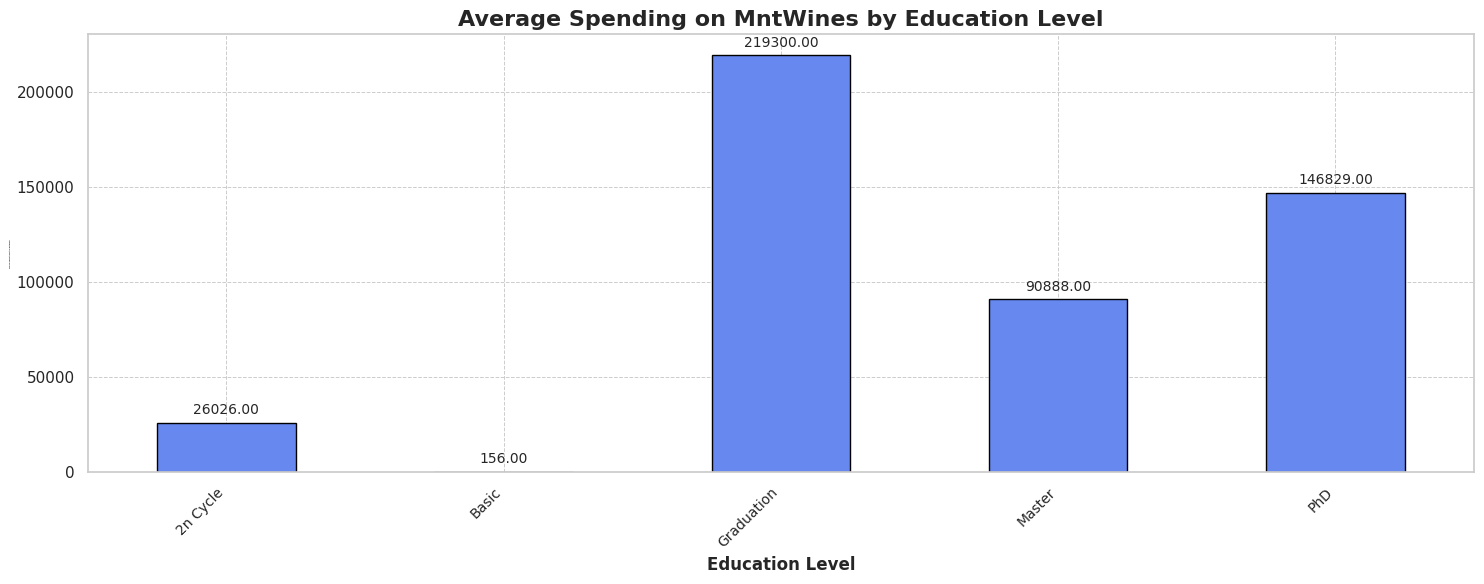

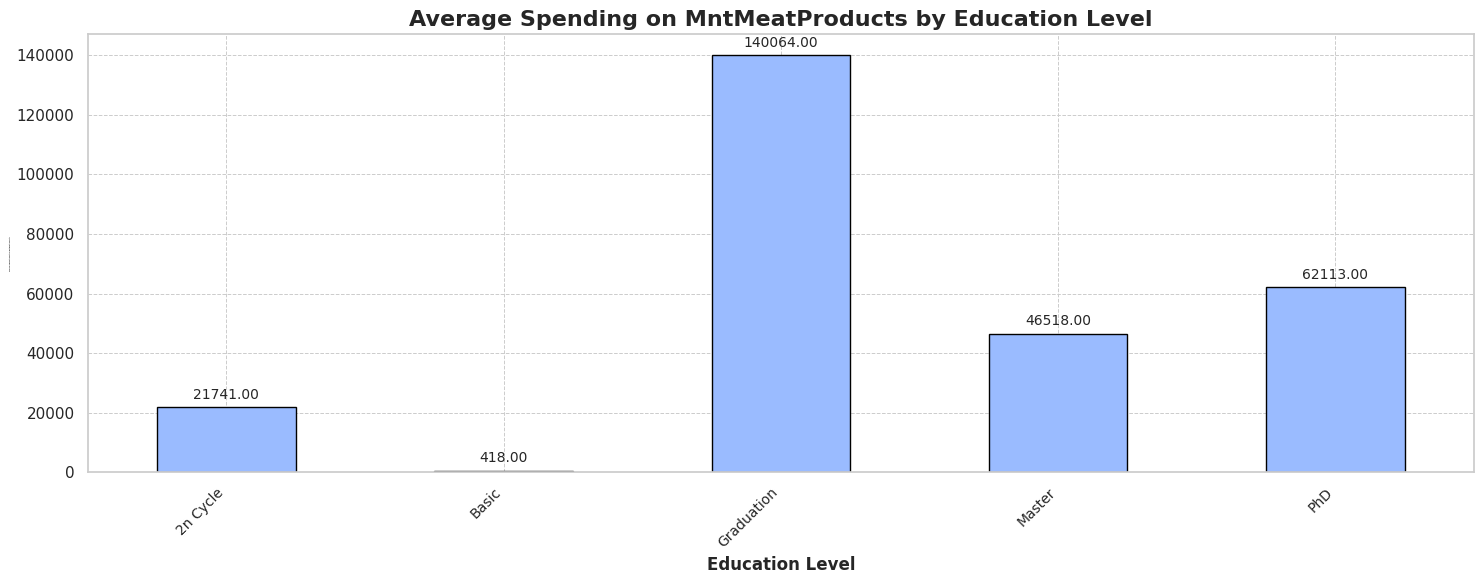

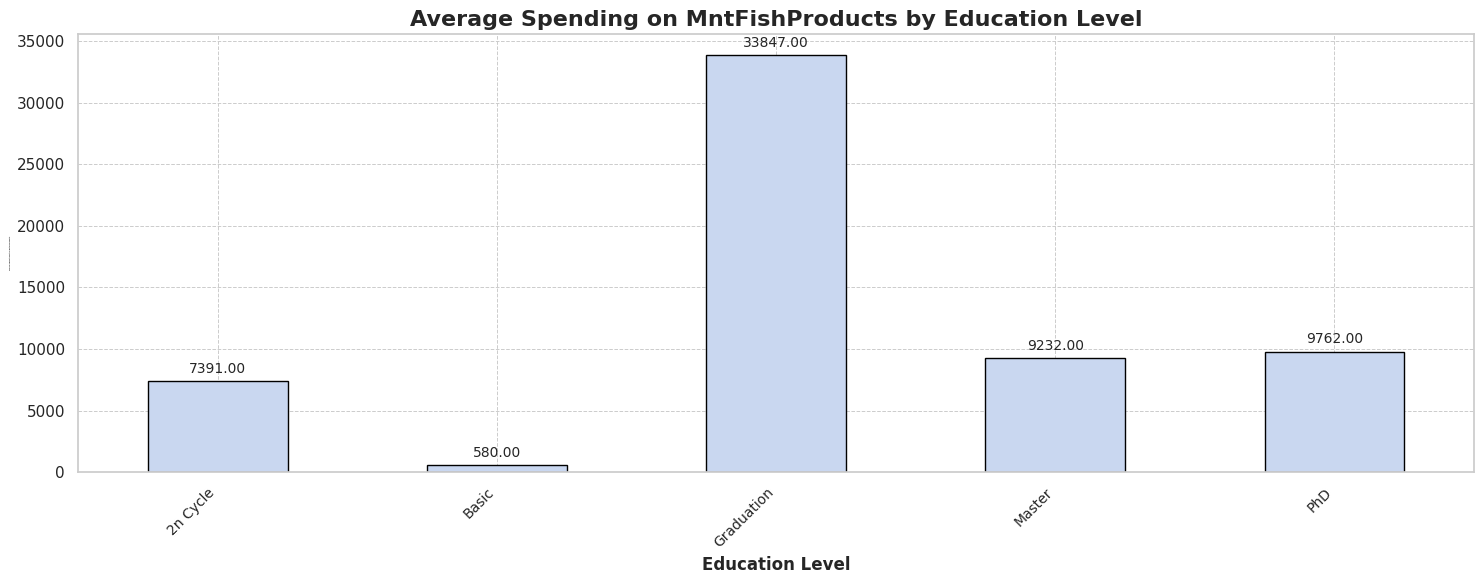

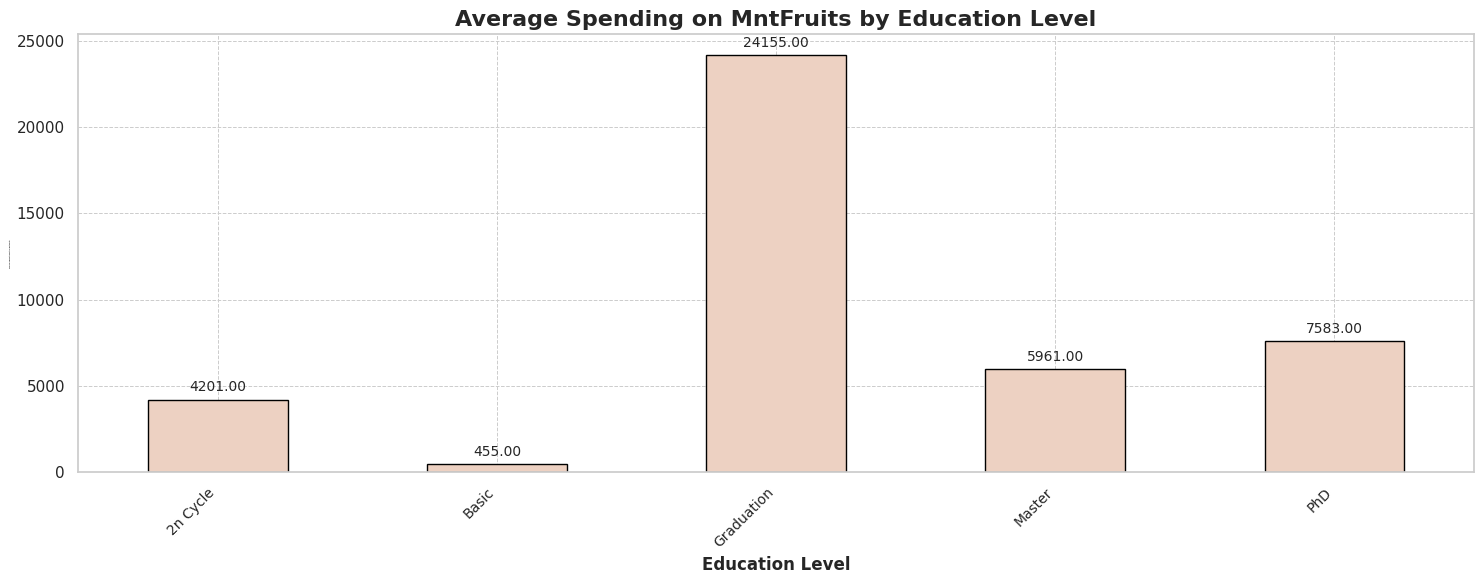

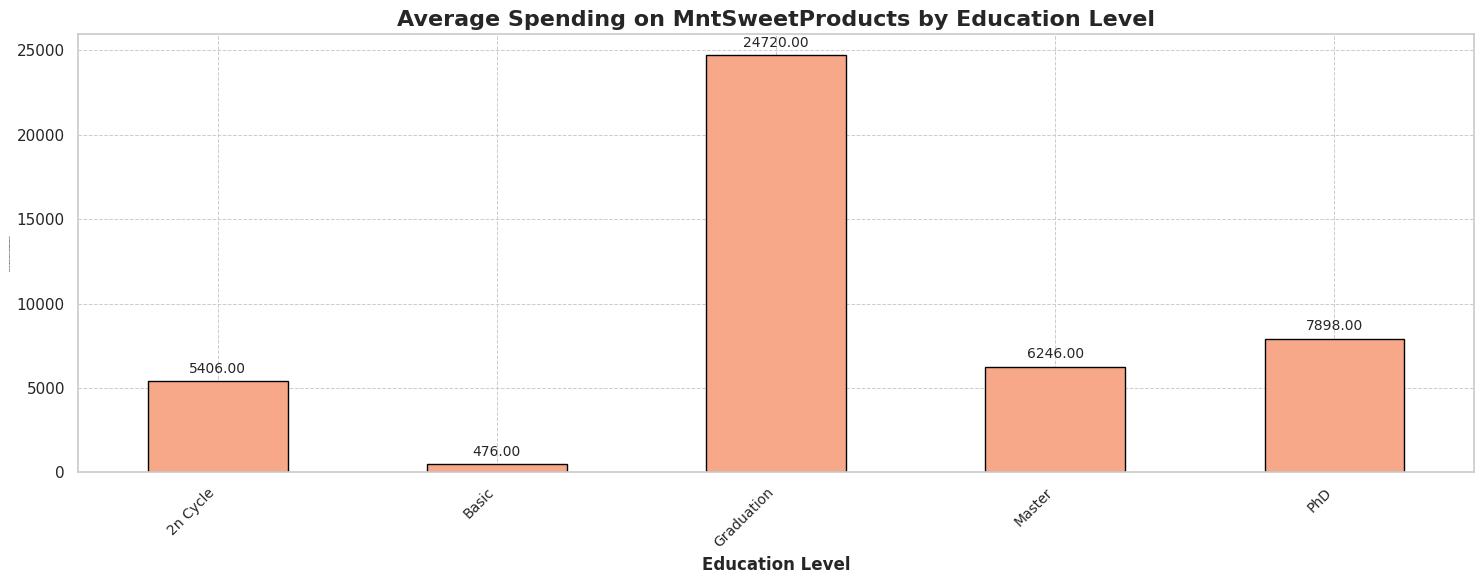

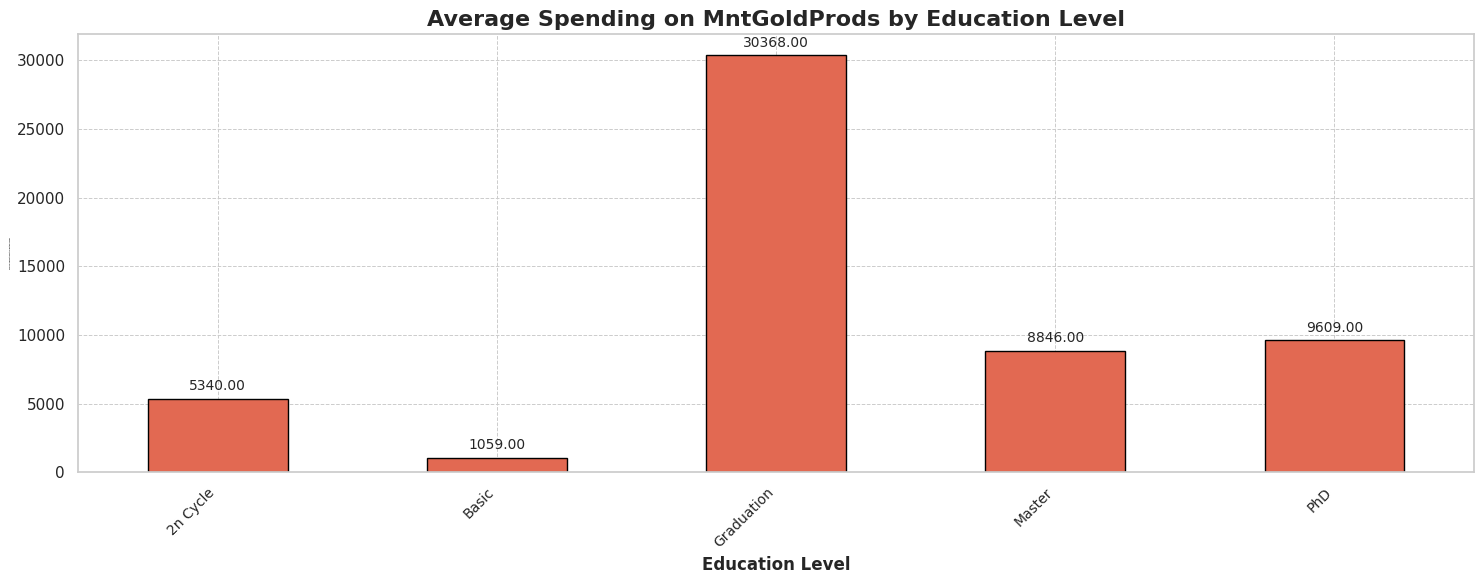

In [105]:


sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", 6)


for idx, column in enumerate(['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']):

    # bar plot for each spending category with color from the palette
    ax = grouped_by_education[column].plot(kind='bar', color=palette[idx], figsize=(15, 6), edgecolor='black')

    plt.title(f'Average Spending on {column} by Education Level', fontsize=16, fontweight='bold')
    plt.ylabel(f'Average Amount Spent on {column}', fontsize=1,weight='bold')
    plt.xlabel('Education Level', fontsize=12,weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)


    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9),
                    textcoords='offset points', fontsize=10)


    plt.tight_layout()
    plt.show()


In [94]:
grouped_by_marital_status=dataframe.groupby('Marital_Status')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']].sum()
grouped_by_marital_status

MntWines  MntMeatProducts  MntFishProducts  MntFruits  \
Marital_Status                                                          
Alone                 20               32               23          7   
Divorced           48934            23825             5611       4040   
Married           184213            98855            22370      16071   
Single            111083            69102            14269       9891   
Together          120166            67992            15439      10583   
Widow              18139            10948             3092       1757   
YOLO                 644              100                8          6   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Alone                         16            40  
Divorced                    3714          5179  
Married                    17272         20667  
Single                     10585         12770  
Together                   10777         14008  
Widow                       2376          2474  
YOLO                           6            84

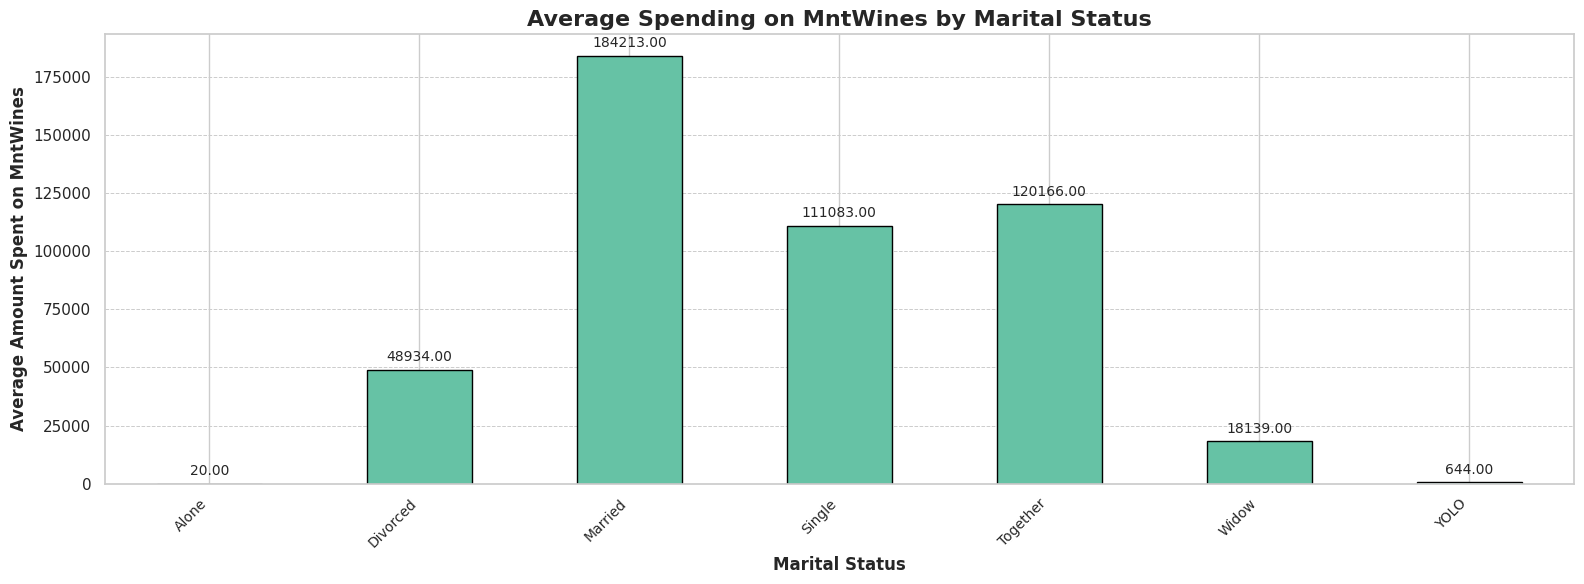

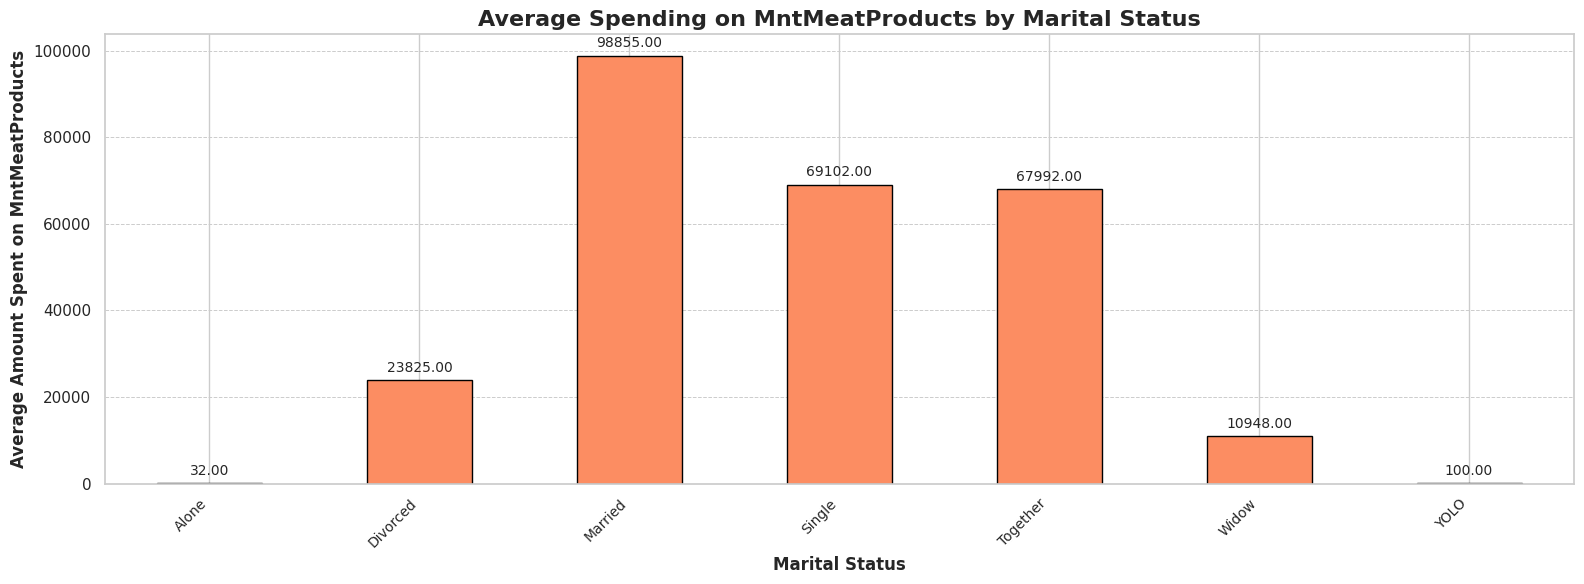

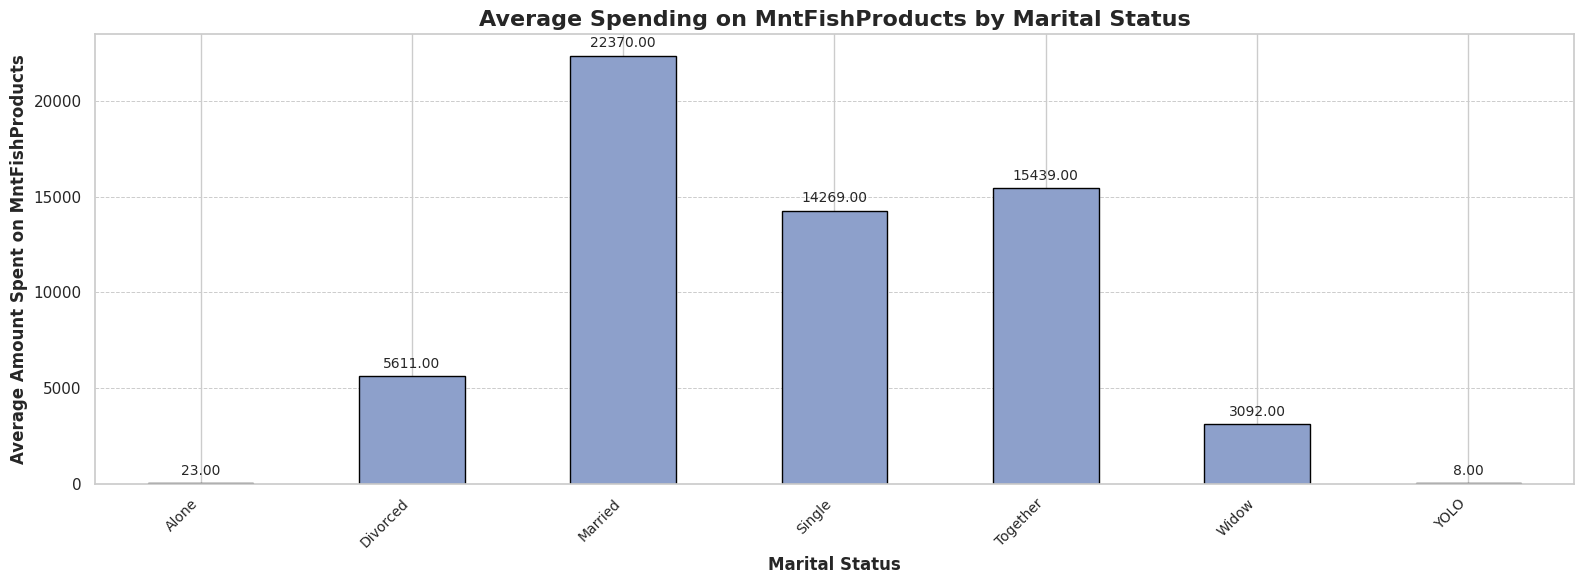

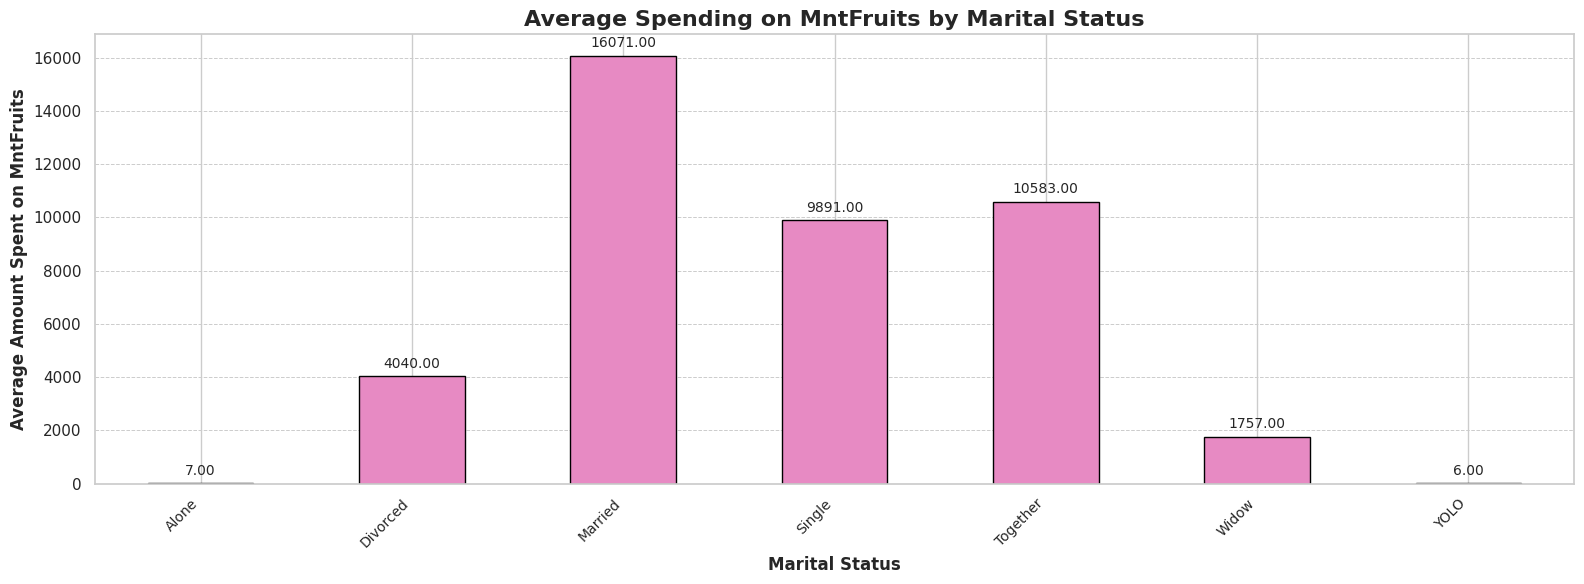

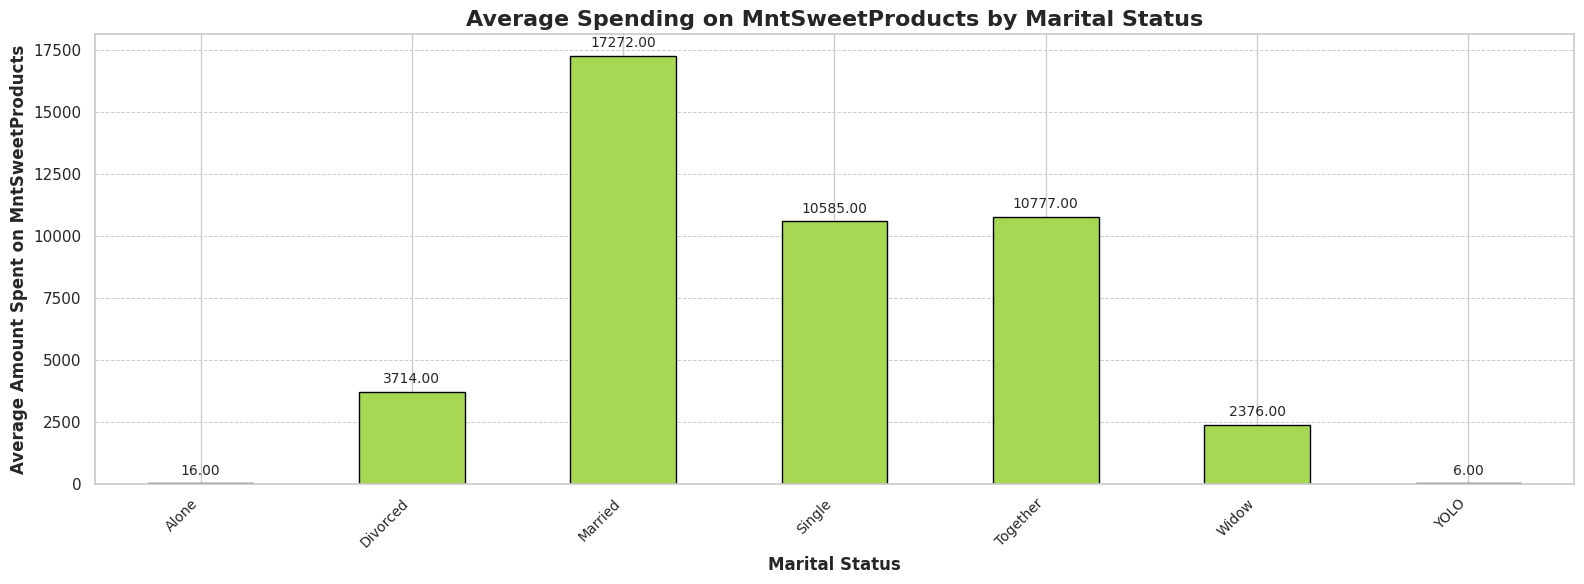

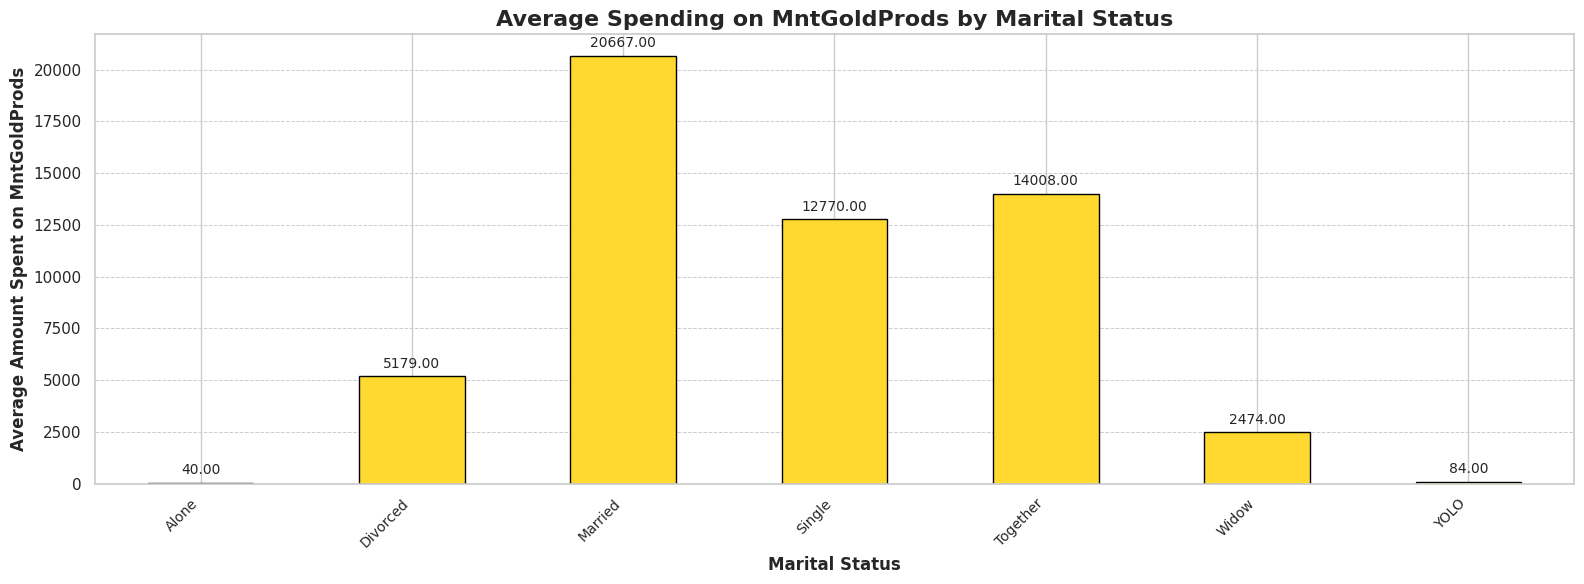

In [104]:


sns.set(style="whitegrid")


palette = sns.color_palette("Set2", 6)

# Loop over each column (spending category) in the grouped_by_marital_status DataFrame
for idx, column in enumerate(['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']):


    ax = grouped_by_marital_status[column].plot(kind='bar', color=palette[idx], figsize=(16, 6), edgecolor='black')


    plt.title(f'Average Spending on {column} by Marital Status', fontsize=16, fontweight='bold')
    plt.ylabel(f'Average Amount Spent on {column}', fontsize=12,weight='bold')
    plt.xlabel('Marital Status', fontsize=12,weight='bold')

    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

    # Add data labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9),
                    textcoords='offset points', fontsize=10)


    plt.tight_layout()

    plt.show()


In [96]:
# Creating income bins and labels
income_bins = [0, 30000, 60000, 90000, 120000, dataframe['Income'].max()]
income_labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# Creating a new column 'Income_Category' with the bin labels
dataframe['Income_Category'] = pd.cut(dataframe['Income'], bins=income_bins, labels=income_labels)




In [97]:
# Grouping by Income Category to see average spending
grouped_by_income = dataframe.groupby('Income_Category')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']].mean()


print(grouped_by_income)


                   MntWines  MntMeatProducts  MntFishProducts  MntFruits  \
Income_Category                                                            
Low               13.002809        16.134831         7.735955   5.775281   
Medium-Low       142.395297        49.902576        14.338186   9.371781   
Medium           557.982394       343.716549        72.644366  51.595070   
Medium-High      870.914286       617.971429        99.542857  62.257143   
High              27.200000         9.200000         2.800000   3.600000   

                 MntSweetProducts  MntGoldProds  
Income_Category                                  
Low                      5.769663     14.508427  
Medium-Low               9.370661     23.777156  
Medium                  54.529930     46.688380  
Medium-High             85.542857     50.200000  
High                     0.800000      4.800000  


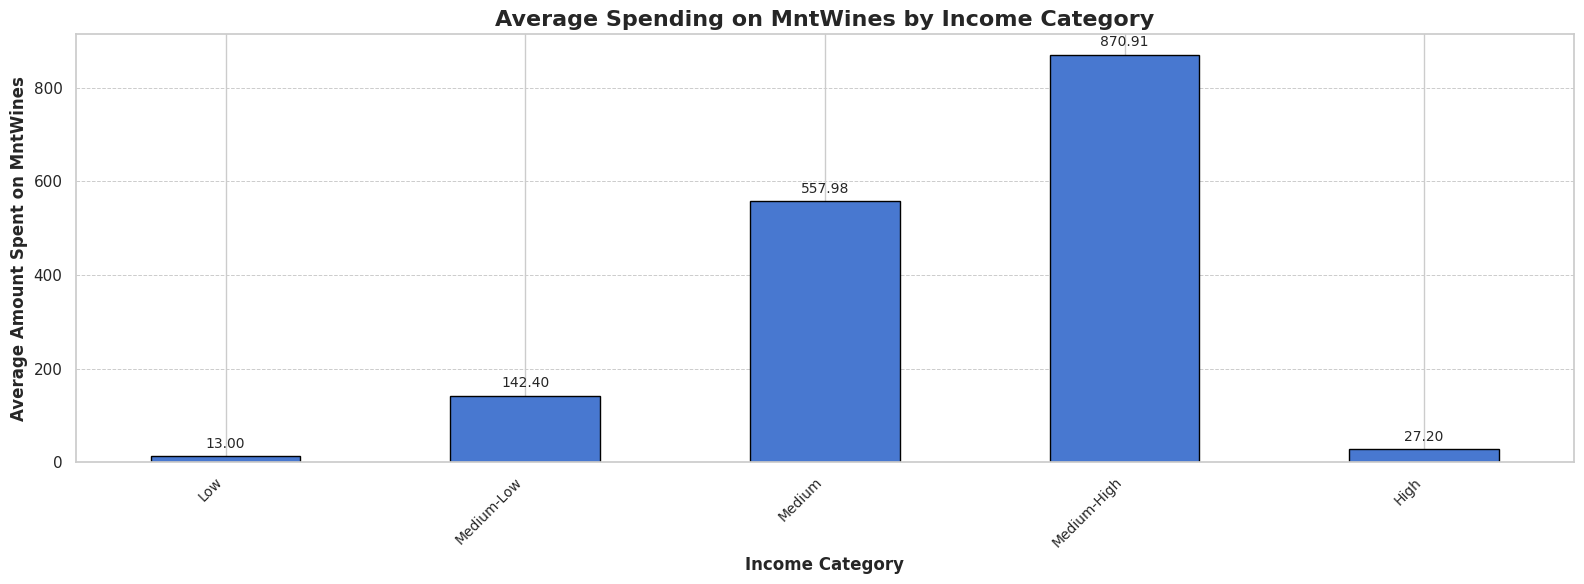

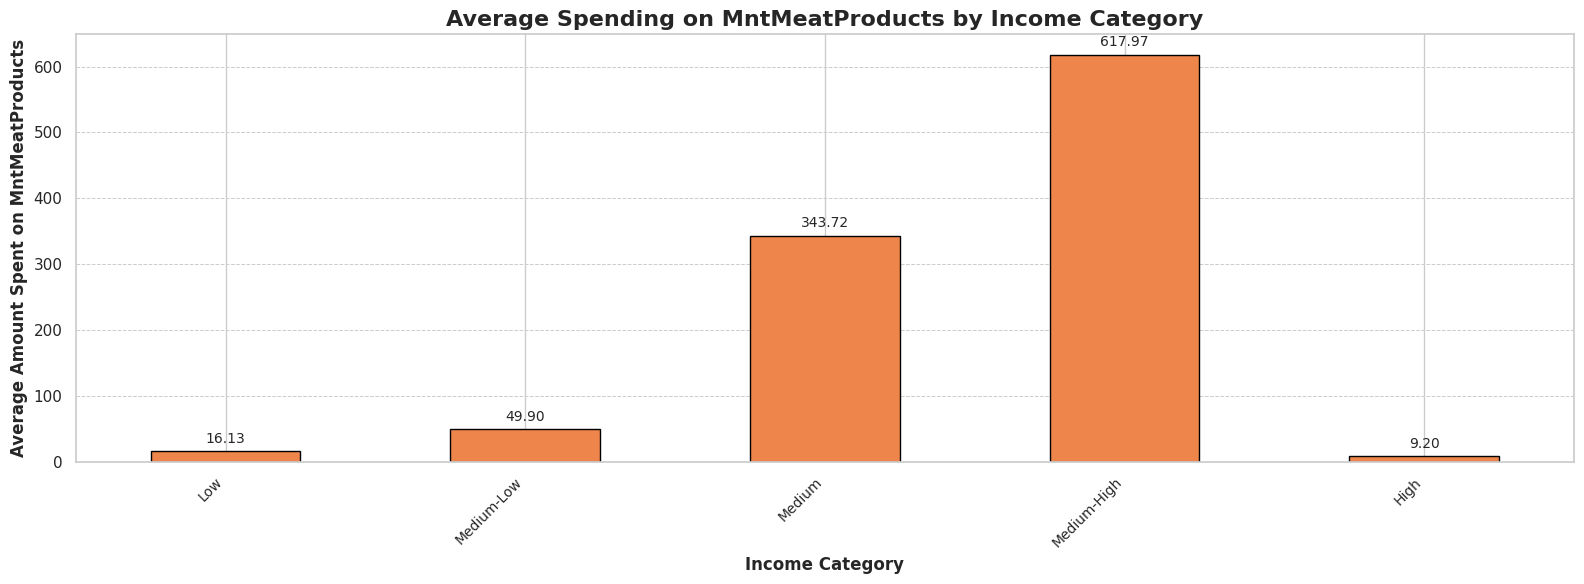

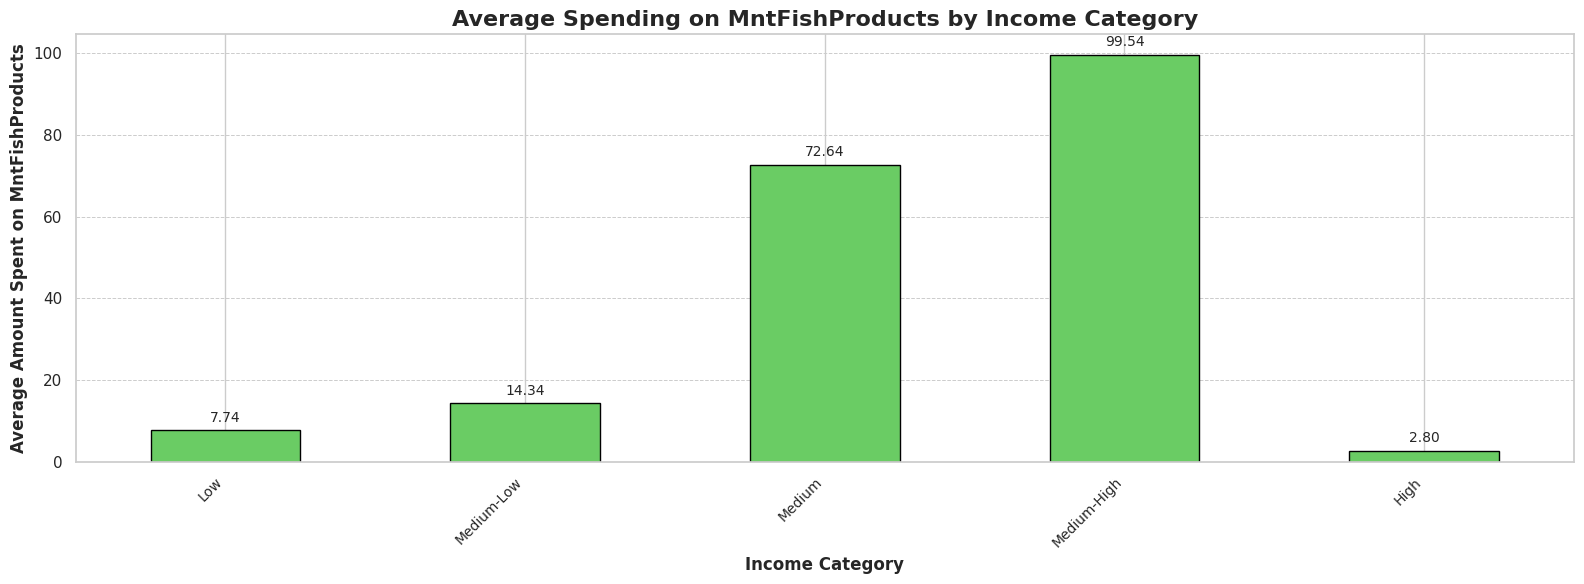

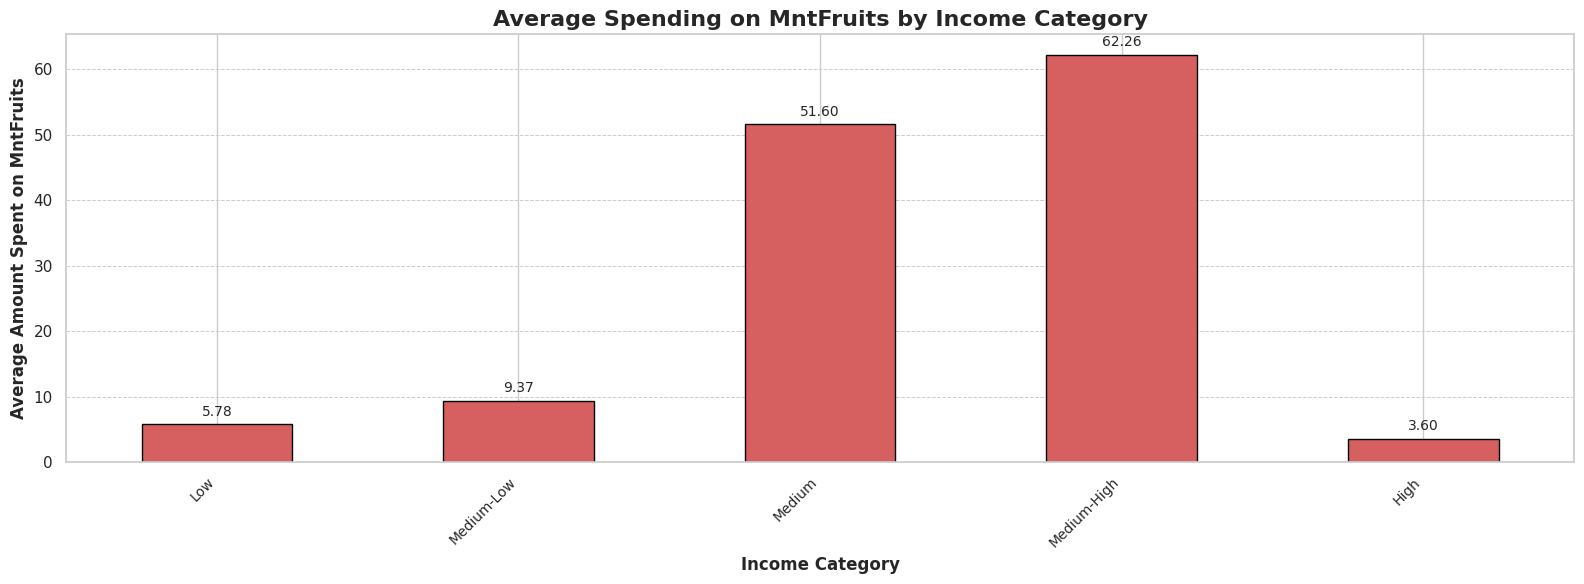

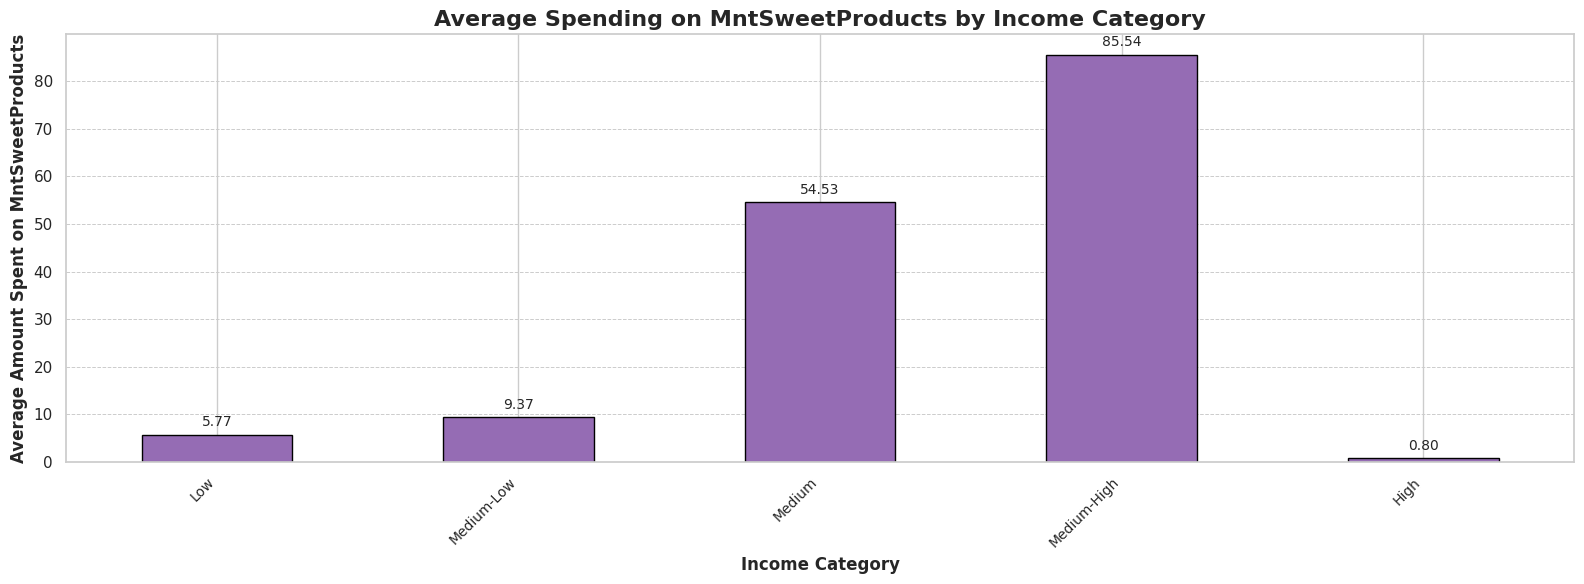

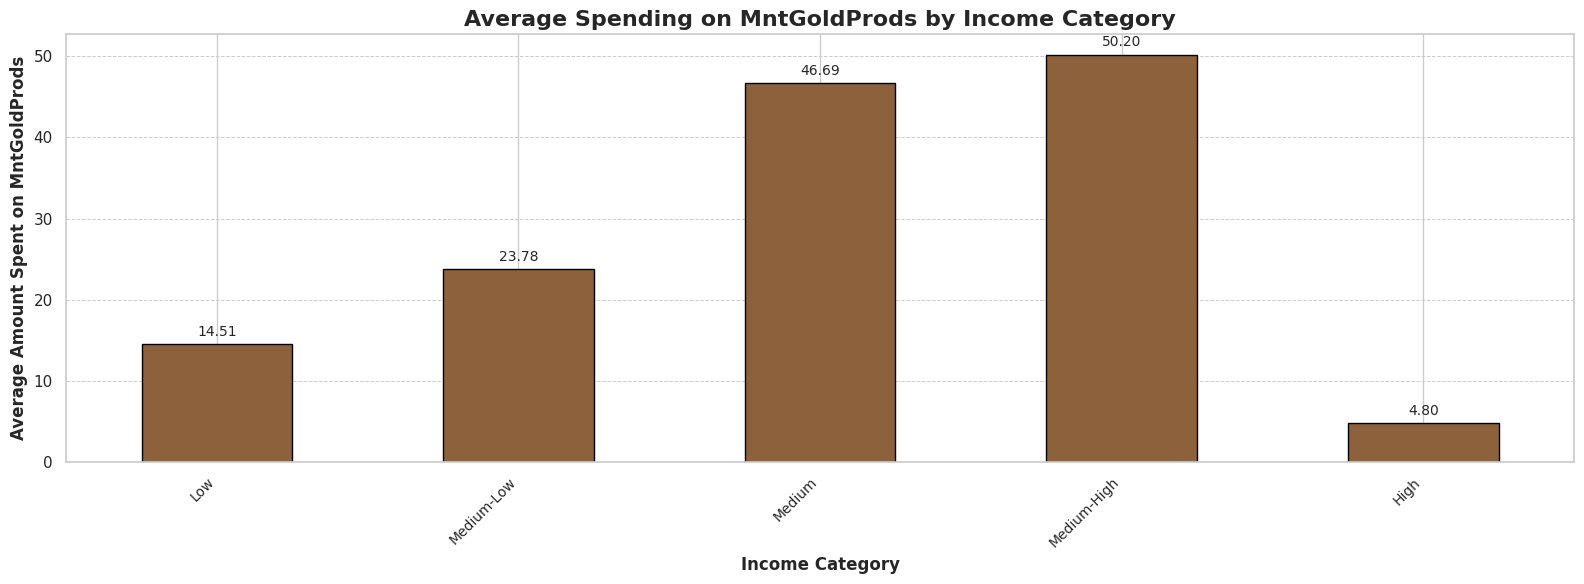

In [106]:

sns.set(style="whitegrid")
palette = sns.color_palette("muted", 6)


for idx, column in enumerate(['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']):
    ax = grouped_by_income[column].plot(kind='bar', color=palette[idx], figsize=(16, 6), edgecolor='black')
    plt.title(f'Average Spending on {column} by Income Category', fontsize=16, fontweight='bold')
    plt.ylabel(f'Average Amount Spent on {column}', fontsize=12,weight='bold')
    plt.xlabel('Income Category', fontsize=12,weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9),
                    textcoords='offset points', fontsize=10)

    plt.tight_layout()
    plt.show()


In [30]:
# Selecting relevant columns for clustering
clustering_data = dataframe[['Year_Birth', 'Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


In [31]:
clustering_data_cleaned = clustering_data.dropna()


# Create an imputer that fills NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data to fill in missing values
clustering_data_imputed = imputer.fit_transform(clustering_data)

# Convert back to DataFrame for easier handling
clustering_data_imputed = pd.DataFrame(clustering_data_imputed, columns=clustering_data.columns)


In [32]:
# Create a pipeline with imputer and scaler
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the data
scaled_data = pipeline.fit_transform(clustering_data)


In [33]:

# Now you can use the cleaned or imputed data for K-Means
k = 3  # Set the optimal number of clusters you determined earlier
kmeans = KMeans(n_clusters=k, random_state=42)
dataframe['Cluster'] = kmeans.fit_predict(scaled_data)

# Check the distribution of clusters
cluster_distribution = dataframe['Cluster'].value_counts()
print(cluster_distribution)


Cluster
0    1117
2     447
1     313
Name: count, dtype: int64


          Year_Birth        Income    MntWines  MntMeatProducts  \
Cluster                                                           
0        1970.832587  36170.222121   61.582811        26.704566   
1        1968.805112  76605.135484  547.348243       469.837061   
2        1965.185682  65455.166667  543.827740       210.214765   

         MntFishProducts  MntFruits  MntSweetProducts  MntGoldProds  \
Cluster                                                               
0               7.340197   5.220233          5.332140     14.597135   
1             112.616613  82.920128         85.182109     57.581470   
2              38.845638  23.646532         27.131991     46.742729   

          Education Marital_Status  
Cluster                             
0        Graduation        Married  
1        Graduation        Married  
2        Graduation        Married  


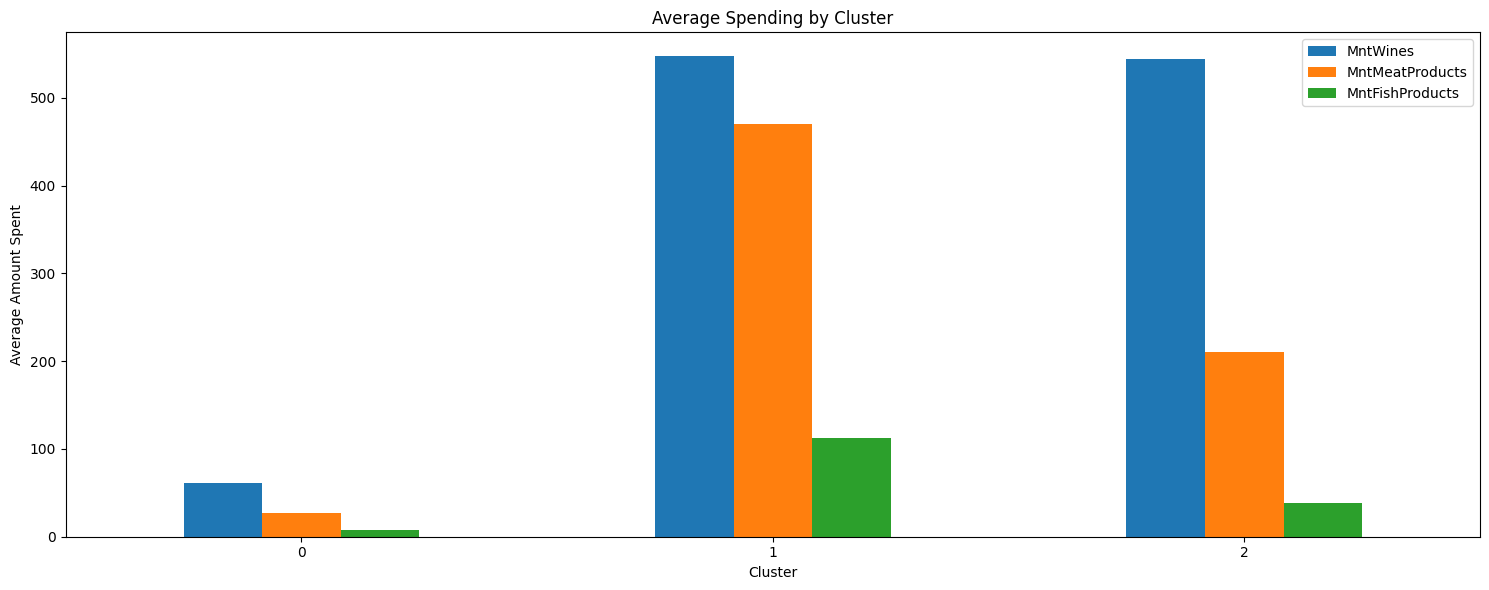

In [34]:


numeric_columns = ['Year_Birth', 'Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']
# Grouping by Cluster and calculating the mean for numeric columns
cluster_profile = dataframe[numeric_columns].groupby(dataframe['Cluster']).mean()

# Get the mode for categorical columns
categorical_columns = ['Education', 'Marital_Status']
mode_values = dataframe[categorical_columns].groupby(dataframe['Cluster']).agg(lambda x: x.mode()[0])

# Combine numeric and categorical profiles
final_profile = pd.concat([cluster_profile, mode_values], axis=1)
print(final_profile)

final_profile[['MntWines', 'MntMeatProducts', 'MntFishProducts']].plot(kind='bar', figsize=(15, 6))
plt.title('Average Spending by Cluster')
plt.ylabel('Average Amount Spent')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
